In [1]:
# import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import feature_engine

from sklearn.model_selection import train_test_split

### Step 1: Load Data into Jupyter Notebook

In [2]:
song_data = pd.read_csv("song_popularity.csv")

In [3]:
song_data.head(10)

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   
5   EI7            Bring Me To Life            235893      0.008771   
6   HI7                 Last Resort            199893      0.000494   
7   EI7    Are You Gonna Be My Girl            213800      0.001450   
8   EI7              Mr. Brightside            222586      0.001058   
9   EI9                 Sex on Fire            203346      0.001686   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3    122.7664           0   
2       0.72963    46.3          0.447000    0    157.5025           1   
3       0.44649    97.0          0.003550    0    121.4404           1   
4       0.44253    76.6          0.000000   10    123.8769           1   
5       0.31284    94.5          0.000002    4    194.8816           0   
6       0.57519    88.7          0.001110    4    160.7824           0   
7       0.60687    95.3          0.000582    2           ?           1   
8       0.32670    93.6          0.000000    1  119.377476           1   
9       0.53658    90.5          0.010400    9    129.0496           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   
5          NaN  189.931          0.320    Extra   -3.169        ?   
6        93.60   90.578          0.724     High   -3.659     Boom   
7          NaN  105.046          0.537    Extra   -3.435     Boom   
8          NaN  148.112          0.234      NaN   -3.660     Boom   
9        81.00  153.398          0.374    Extra   -5.653    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90  
5            63.98     141.75  
6            67.74     133.05  
7            62.55     142.95  
8            61.11     140.40  
9            54.76     135.75

In [4]:
song_data.replace('?', np.nan, inplace=True)
song_data.head(10)

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   
5   EI7            Bring Me To Life            235893      0.008771   
6   HI7                 Last Resort            199893      0.000494   
7   EI7    Are You Gonna Be My Girl            213800      0.001450   
8   EI7              Mr. Brightside            222586      0.001058   
9   EI9                 Sex on Fire            203346      0.001686   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3    122.7664           0   
2       0.72963    46.3          0.447000    0    157.5025           1   
3       0.44649    97.0          0.003550    0    121.4404           1   
4       0.44253    76.6          0.000000   10    123.8769           1   
5       0.31284    94.5          0.000002    4    194.8816           0   
6       0.57519    88.7          0.001110    4    160.7824           0   
7       0.60687    95.3          0.000582    2         NaN           1   
8       0.32670    93.6          0.000000    1  119.377476           1   
9       0.53658    90.5          0.010400    9    129.0496           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   
5          NaN  189.931          0.320    Extra   -3.169      NaN   
6        93.60   90.578          0.724     High   -3.659     Boom   
7          NaN  105.046          0.537    Extra   -3.435     Boom   
8          NaN  148.112          0.234      NaN   -3.660     Boom   
9        81.00  153.398          0.374    Extra   -5.653    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90  
5            63.98     141.75  
6            67.74     133.05  
7            62.55     142.95  
8            61.11     140.40  
9            54.76     135.75

In [5]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18834 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          16933 non-null  object 
 16  Song_Popularity   18835 non-null  float6

In [6]:
song_data.describe()

Song_Duration_ms  Acousticness  Danceability        Energy  \
count      1.883500e+04  18835.000000  15938.000000  18835.000000   
mean       2.182116e+05      0.253368      0.626669     64.499476   
std        5.988754e+04      0.282945      0.155086     21.410076   
min        1.200000e+04      0.000001      0.000000      0.107000   
25%        1.843395e+05      0.023618      0.526680     51.000000   
50%        2.113060e+05      0.129360      0.636570     67.400000   
75%        2.428440e+05      0.415520      0.740520     81.500000   
max        1.799346e+06      0.976080      0.977130     99.900000   

       Instrumentalness           Key    Audio_mode   Speechiness  \
count      18835.000000  18835.000000  18835.000000  13184.000000   
mean           0.078008      5.289196      0.628139    152.173475   
std            0.221591      3.614595      0.483314    155.018531   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      2.000000      0.000000     56.700000   
50%            0.000011      5.000000      1.000000     83.250000   
75%            0.002570      8.000000      1.000000    177.000000   
max            0.997000     11.000000      1.000000   1410.000000   

              Tempo  Audio_valence       Decibel  Song_Popularity  \
count  18835.000000   18835.000000  18835.000000     18835.000000   
mean     121.073154       0.527967     -7.447435        42.357670   
std       28.714456       0.244632      3.827831        13.949829   
min        0.000000       0.000000    -38.768000         0.000000   
25%       98.368000       0.335000     -9.044000        32.790000   
50%      120.013000       0.527000     -6.555000        42.730000   
75%      139.931000       0.725000     -4.908000        52.290000   
max      242.318000       0.984000      1.585000        99.320000   

          Indicator  
count  18835.000000  
mean      96.749215  
std       32.115110  
min        0.160000  
25%       76.500000  
50%      101.100000  
75%      122.250000  
max      149.850000

In [7]:
# Data Size
song_data.shape

(18835, 18)

### Step 2: Exploratory Data Analysis

In [8]:
new_song_data = song_data.drop('Code', axis=1)
new_song_data = new_song_data.drop('Song_Name', axis=1)
#song_data = song_data.drop('Indicator', axis=1)
new_song_data

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
0                262333      0.005410       0.49104    68.2          0.000029   
1                216933      0.010094       0.53658    85.3          0.000000   
2                231733      0.008007       0.72963    46.3          0.447000   
3                216933      0.025872       0.44649    97.0          0.003550   
4                223826      0.000935       0.44253    76.6          0.000000   
...                 ...           ...           ...     ...               ...   
18830            159645      0.875140       0.49500    15.1          0.000065   
18831            205666      0.749700       0.49005    16.1          0.000001   
18832            182211      0.830060       0.71181    32.5          0.000000   
18833            352280      0.926100       0.48312    32.6          0.015700   
18834            193533      0.892780       0.63360    38.1          0.000254   

       Key    Liveness  Audio_mode  Speechiness    Tempo  Audio_valence  \
0        8  112.126921           1        44.10  167.060          0.474   
1        3    122.7664           0          NaN  105.256          0.370   
2        0    157.5025           1       118.80  123.881          0.324   
3        0    121.4404           1       160.50  122.444          0.198   
4       10    123.8769           1        46.95  172.011          0.574   
...    ...         ...         ...          ...      ...            ...   
18830   11    123.4321           1        52.20  113.969          0.300   
18831   11    122.1025           0        45.15   94.286          0.265   
18832    0    126.5625           1        53.25  130.534          0.286   
18833    3    125.2161           1        49.20  106.063          0.323   
18834    4    121.8816           1        45.30   91.490          0.581   

      Dynamism  Decibel Loudness  Song_Popularity  Indicator  
0         High   -4.095    Blare            57.72     102.30  
1         high   -6.407     Roar            45.37     127.95  
2          Med   -7.828     Roar            47.28      69.45  
3        Extra   -4.938    Blare            52.89     145.50  
4           Hi   -5.065    Blare            46.68     114.90  
...        ...      ...      ...              ...        ...  
18830       Lo  -16.107  Chatter            31.80      22.65  
18831      Low  -14.078   Babble            32.91      24.15  
18832      NaN  -12.222   Babble            15.18      48.75  
18833   Medium  -12.020   Babble            33.01      48.90  
18834      Med  -11.790   Rumble            37.11      57.15  

[18835 rows x 16 columns]

In [9]:
new_song_data.isnull().sum()

Song_Duration_ms       0
Acousticness           0
Danceability        2897
Energy                 0
Instrumentalness       0
Key                    0
Liveness               1
Audio_mode             0
Speechiness         5651
Tempo                  0
Audio_valence          0
Dynamism            3698
Decibel                0
Loudness            1902
Song_Popularity        0
Indicator              0
dtype: int64

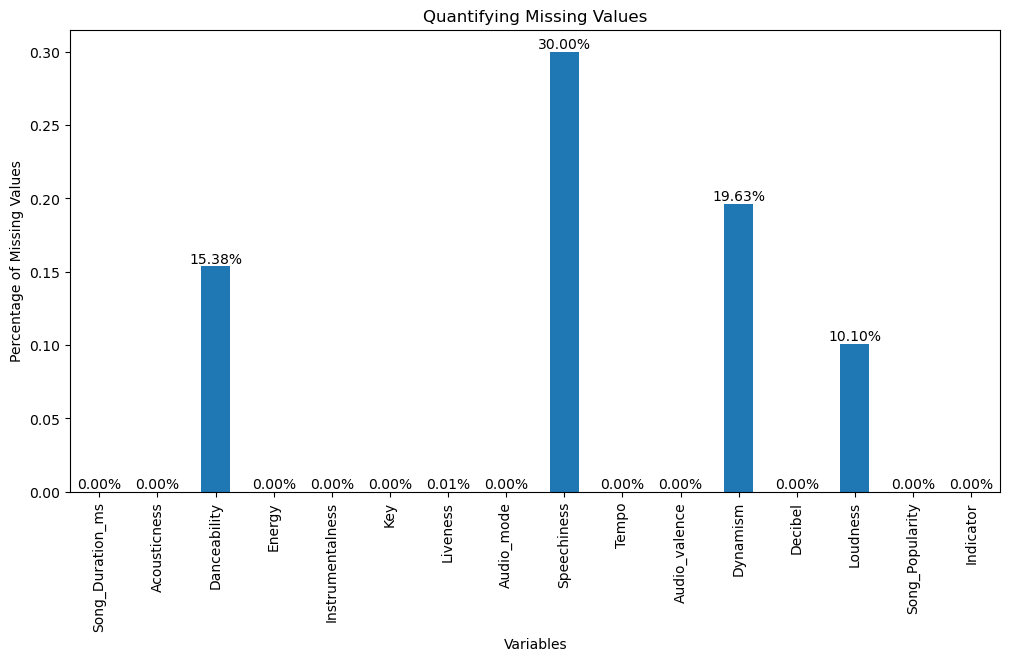

In [10]:
missing_values = new_song_data.isnull().mean()
missing_values.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(missing_values):
    plt.annotate(f'{value:.2%}', xy=(i, value), ha='center', va='bottom')

In [11]:
print(new_song_data.nunique())

Song_Duration_ms    11771
Acousticness         3207
Danceability          834
Energy               1132
Instrumentalness     3925
Key                    12
Liveness             1425
Audio_mode              2
Speechiness          1193
Tempo               12112
Audio_valence        1246
Dynamism               11
Decibel              8416
Loudness               18
Song_Popularity      5149
Indicator            1127
dtype: int64


Text(0.5, 1.0, 'Cardinality')

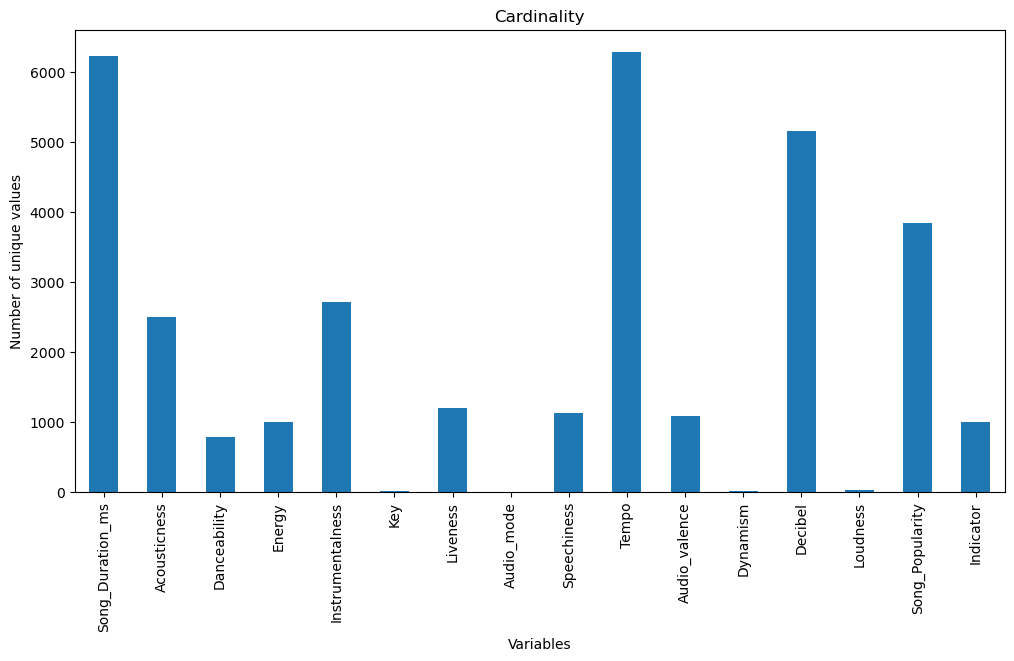

In [12]:
seperate_data = new_song_data.dropna()
seperate_data.nunique().plot.bar(figsize=(12,6))
plt.ylabel("Number of unique values")
plt.xlabel("Variables")
plt.title("Cardinality")

In [13]:
# Converting column: "Liveness" from catergorical to numeric
new_song_data['Liveness'] = pd.to_numeric(new_song_data['Liveness'], errors='coerce')

# Converting column: "Key" from numeric to catergorical
#song_data['Key'] = song_data['Key'].astype(str)

# Converting column: "Audio_mode" from numeric to catergorical
new_song_data['Audio_mode'] = new_song_data['Audio_mode'].astype(str)

In [14]:
new_song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song_Duration_ms  18835 non-null  int64  
 1   Acousticness      18835 non-null  float64
 2   Danceability      15938 non-null  float64
 3   Energy            18835 non-null  float64
 4   Instrumentalness  18835 non-null  float64
 5   Key               18835 non-null  int64  
 6   Liveness          18834 non-null  float64
 7   Audio_mode        18835 non-null  object 
 8   Speechiness       13184 non-null  float64
 9   Tempo             18835 non-null  float64
 10  Audio_valence     18835 non-null  float64
 11  Dynamism          15137 non-null  object 
 12  Decibel           18835 non-null  float64
 13  Loudness          16933 non-null  object 
 14  Song_Popularity   18835 non-null  float64
 15  Indicator         18835 non-null  float64
dtypes: float64(11), int64(2), object(3)
memo

In [15]:
# Identifying catergorical variables
cat_cols = [c for c in new_song_data.columns if new_song_data[c].dtypes=='O']
cat_cols

['Audio_mode', 'Dynamism', 'Loudness']

In [16]:
#Identifying numeric variables
num_cols = [num for num in new_song_data.columns if new_song_data[num].dtypes!='O']
num_cols

['Song_Duration_ms',
 'Acousticness',
 'Danceability',
 'Energy',
 'Instrumentalness',
 'Key',
 'Liveness',
 'Speechiness',
 'Tempo',
 'Audio_valence',
 'Decibel',
 'Song_Popularity',
 'Indicator']

In [17]:
new_song_data[num_cols].head()

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
0            262333      0.005410       0.49104    68.2          0.000029   
1            216933      0.010094       0.53658    85.3          0.000000   
2            231733      0.008007       0.72963    46.3          0.447000   
3            216933      0.025872       0.44649    97.0          0.003550   
4            223826      0.000935       0.44253    76.6          0.000000   

   Key    Liveness  Speechiness    Tempo  Audio_valence  Decibel  \
0    8  112.126921        44.10  167.060          0.474   -4.095   
1    3  122.766400          NaN  105.256          0.370   -6.407   
2    0  157.502500       118.80  123.881          0.324   -7.828   
3    0  121.440400       160.50  122.444          0.198   -4.938   
4   10  123.876900        46.95  172.011          0.574   -5.065   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

array([[<Axes: title={'center': 'Song_Duration_ms'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>],
       [<Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Liveness'}>,
        <Axes: title={'center': 'Speechiness'}>],
       [<Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Audio_valence'}>,
        <Axes: title={'center': 'Decibel'}>,
        <Axes: title={'center': 'Song_Popularity'}>],
       [<Axes: title={'center': 'Indicator'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

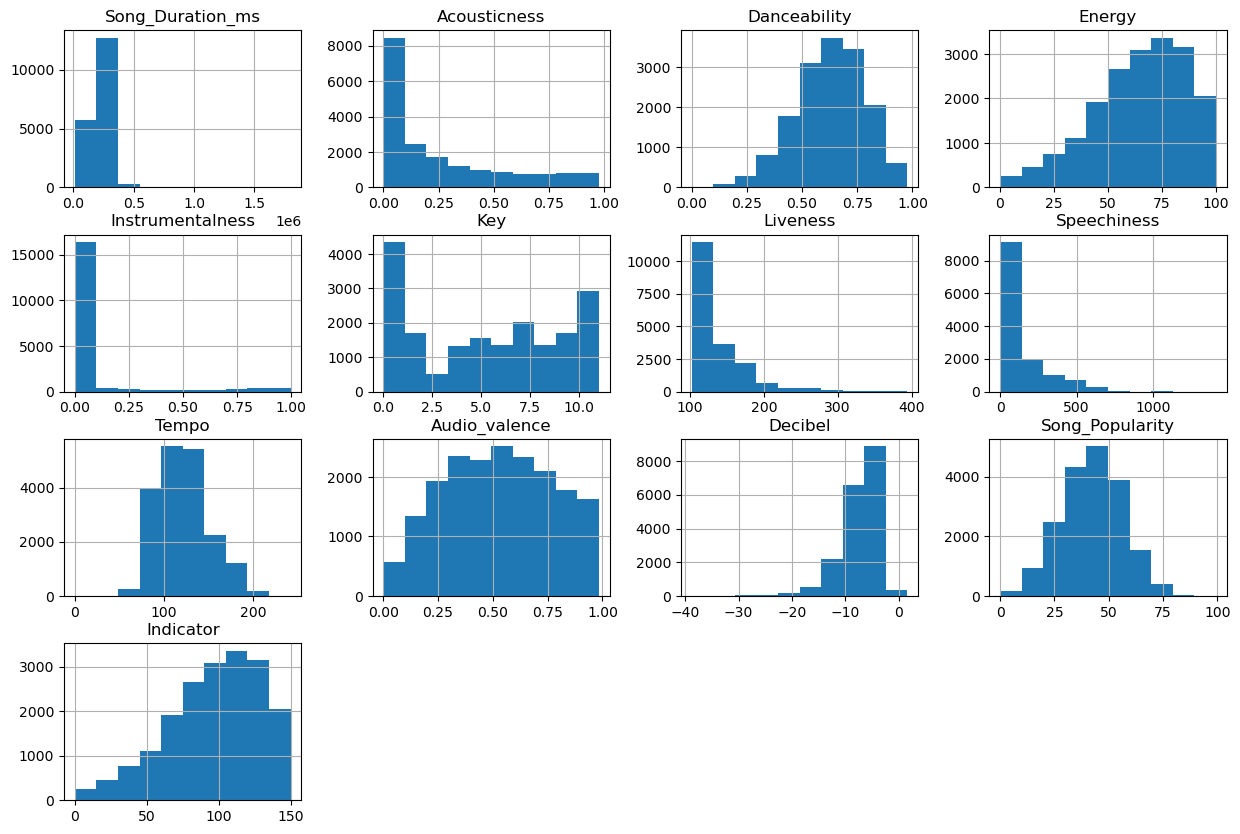

In [18]:
new_song_data[num_cols].hist(figsize=(15, 10))

In [19]:
dynamism_map = {
    "high": "High",
    "Hi": "High",
    "h": "High",
    "Extra": "High",
    "Med": "Medium",
    "m": "Medium",
    "Lo": "Low",
    "l": "Low"
}
new_song_data['Dynamism'] = new_song_data['Dynamism'].map(dynamism_map)

<Axes: xlabel='Loudness', ylabel='count'>

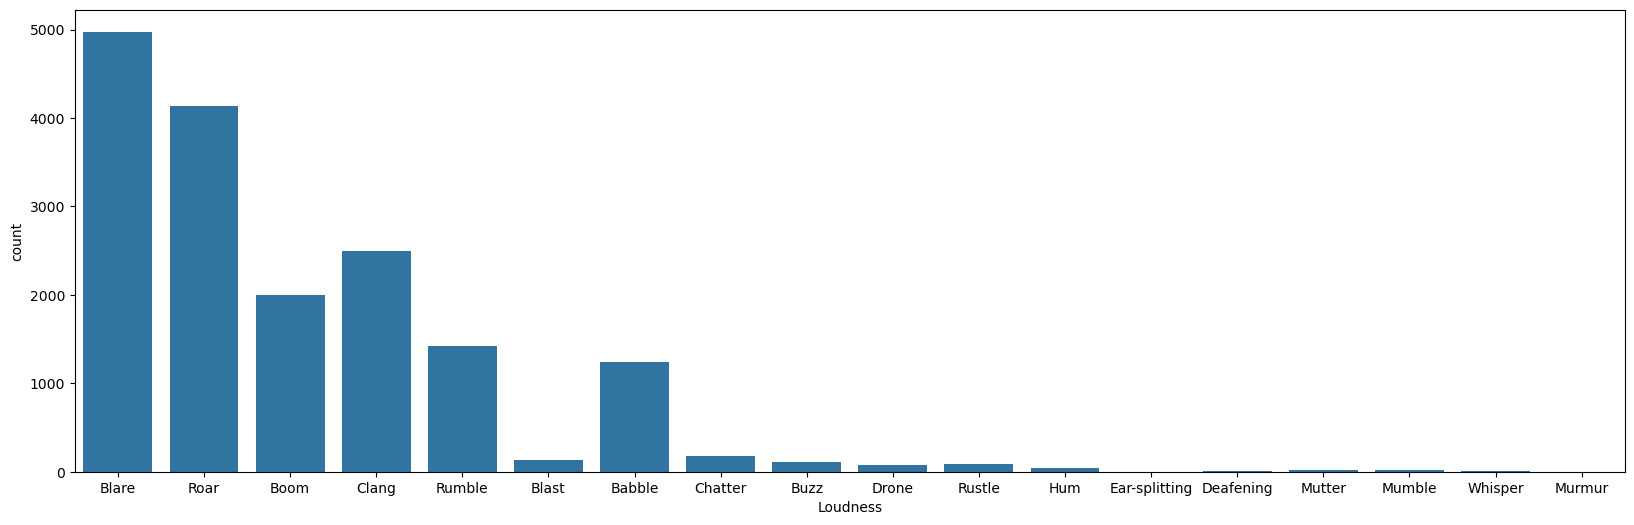

In [20]:
plt.figure(figsize=(20, 6)) 
sns.countplot(data=new_song_data, x=new_song_data['Loudness'])

<Axes: xlabel='Dynamism', ylabel='count'>

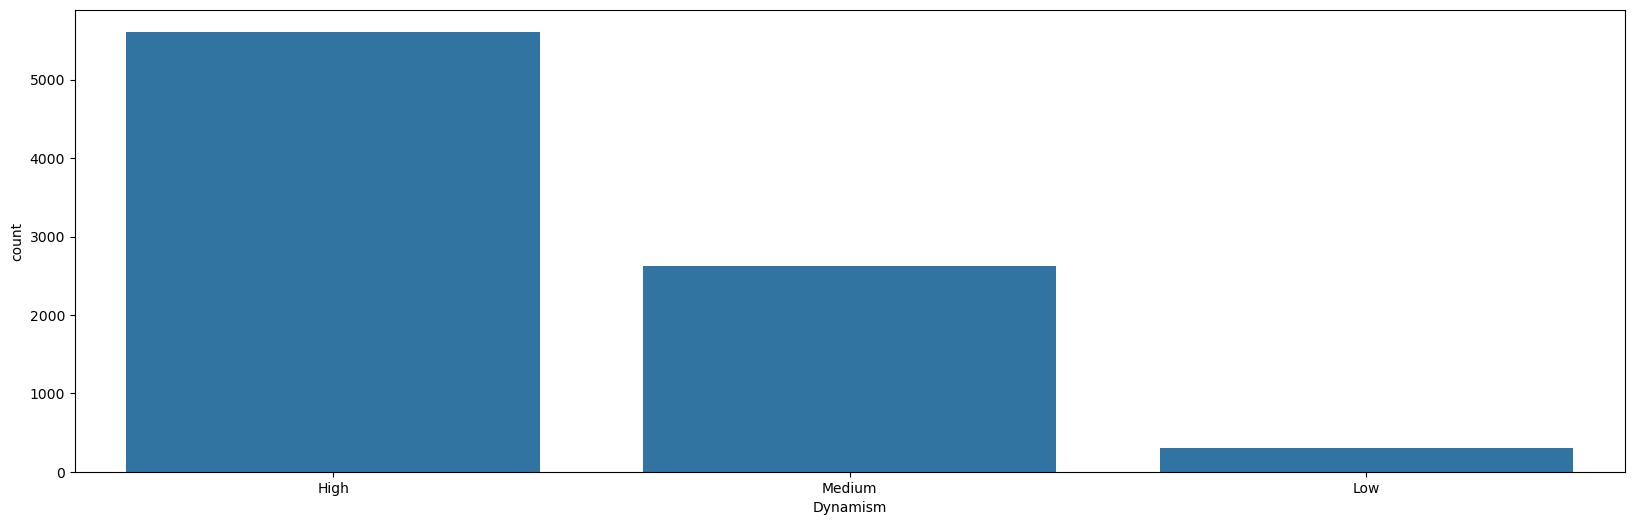

In [21]:
plt.figure(figsize=(20, 6)) 
sns.countplot(data=new_song_data, x=new_song_data['Dynamism'])

### Step 3: Data Preprocessing

In [22]:
# Histograms and Q-Q plots to check for Normal Distribution
def diagnostic_plots(data, variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)

    plt.show()

In [23]:
new_song_data = new_song_data.dropna(subset=['Liveness'])

In [24]:
# Transformation
to_transform = ['song_duration','acousticness','energy','instrumentalness',
                  'liveness','speechiness','tempo','audio_valence','decibel']


In [25]:
# Importing necessary transformers
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import BoxCoxTransformer

In [26]:
song_data_transform1 = new_song_data

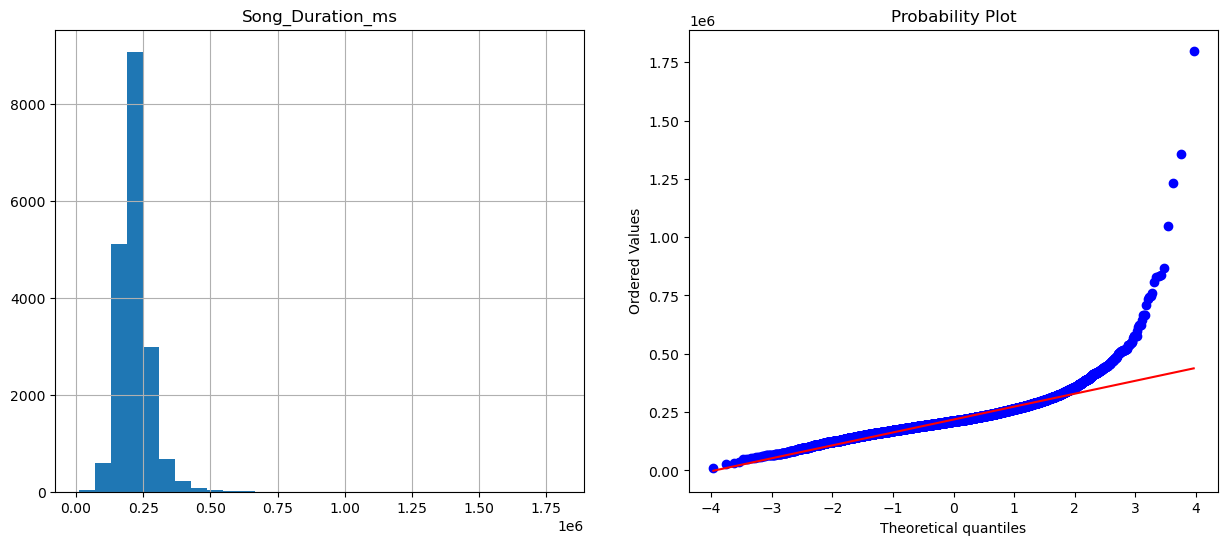

c:\Users\louis\anaconda3\Lib\site-packages\feature_engine\transformation\log.py:167: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12.47736997 12.28734383 12.35334113 ... 12.11292064 12.77218159
 12.17320332]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, self.variables_] = np.log(X.loc[:, self.variables_])


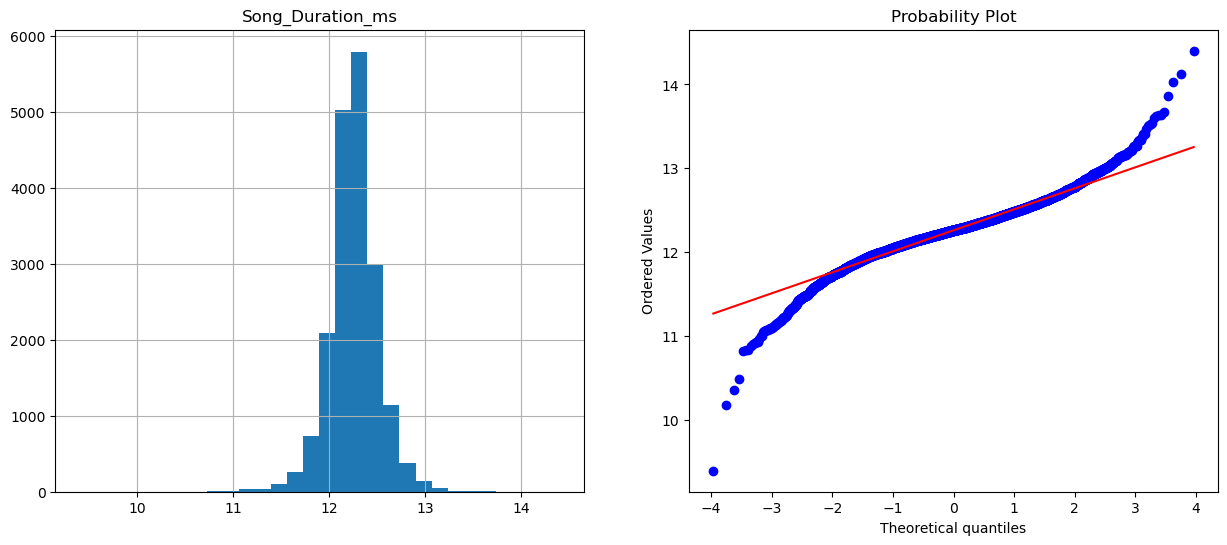

In [27]:
diagnostic_plots(song_data_transform1, 'Song_Duration_ms')
lt = LogTransformer(variables = ['Song_Duration_ms'])
lt.fit(song_data_transform1)
song_data_transform1 = lt.transform(song_data_transform1)
diagnostic_plots(song_data_transform1, 'Song_Duration_ms')

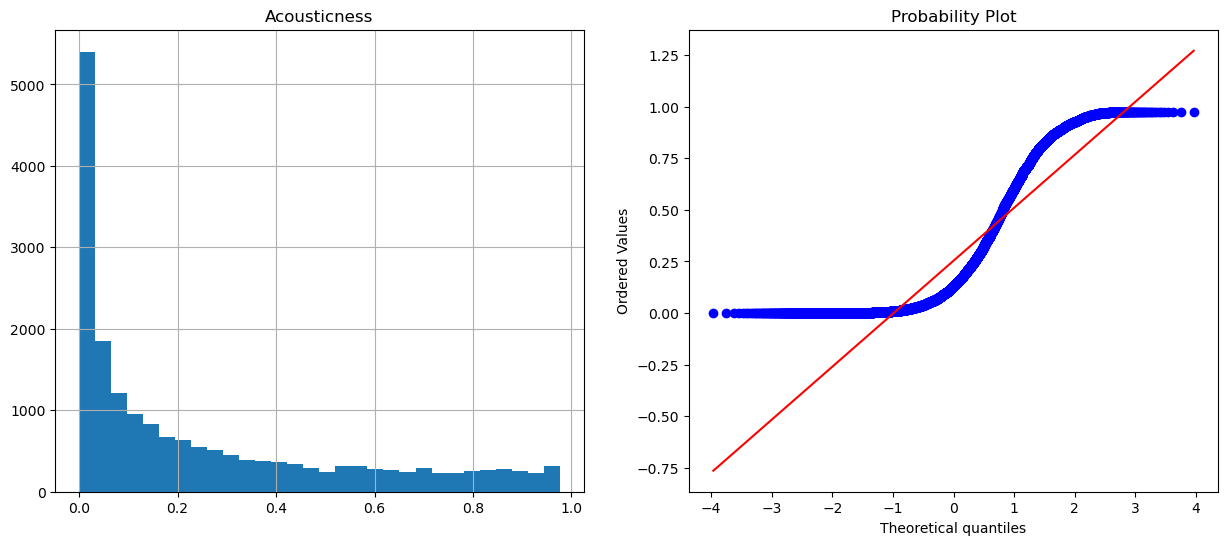

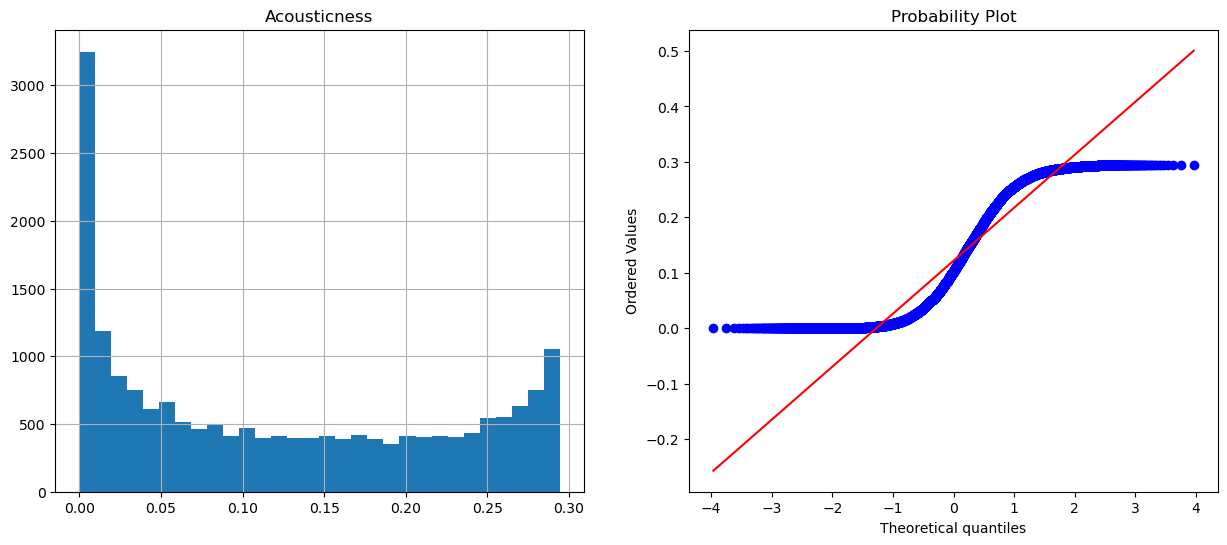

In [28]:
diagnostic_plots(song_data_transform1, 'Acousticness')
lt = YeoJohnsonTransformer(variables = ['Acousticness'])
lt.fit(song_data_transform1)
song_data_transform1 = lt.transform(song_data_transform1)
diagnostic_plots(song_data_transform1, 'Acousticness')

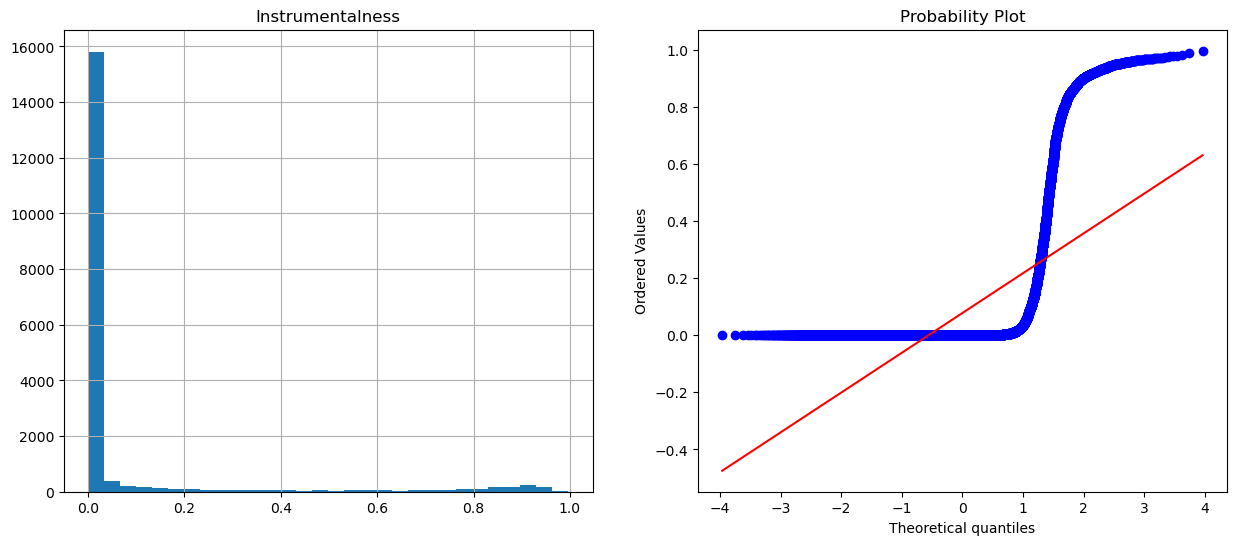

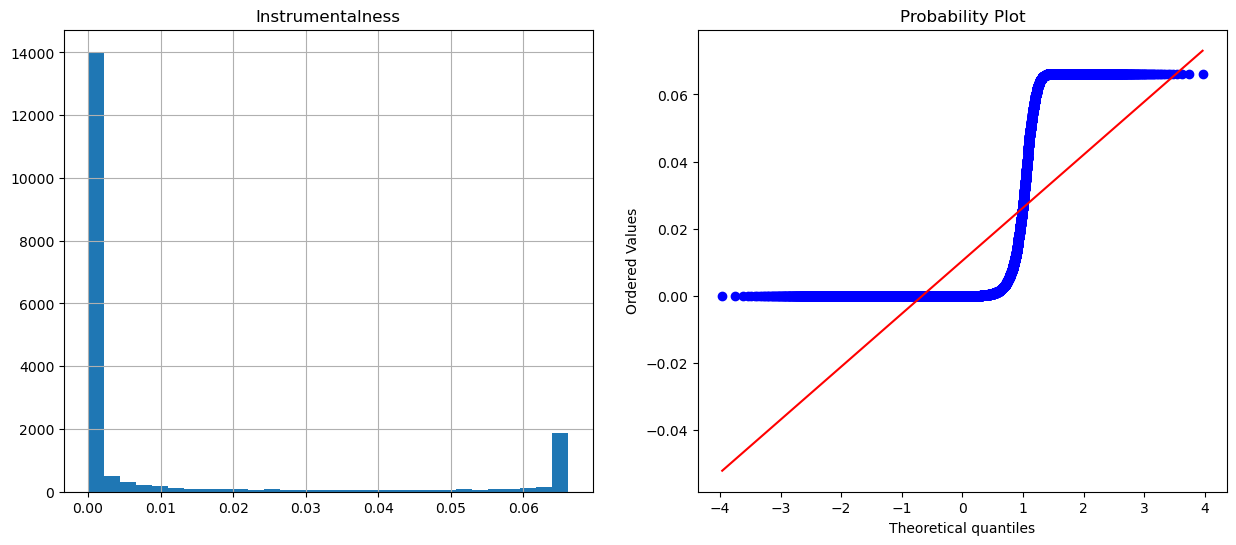

In [29]:
diagnostic_plots(song_data_transform1, 'Instrumentalness')
yjt = YeoJohnsonTransformer(variables = ['Instrumentalness'])
yjt.fit(song_data_transform1)
song_data_transform1 = yjt.transform(song_data_transform1)
diagnostic_plots(song_data_transform1, 'Instrumentalness')

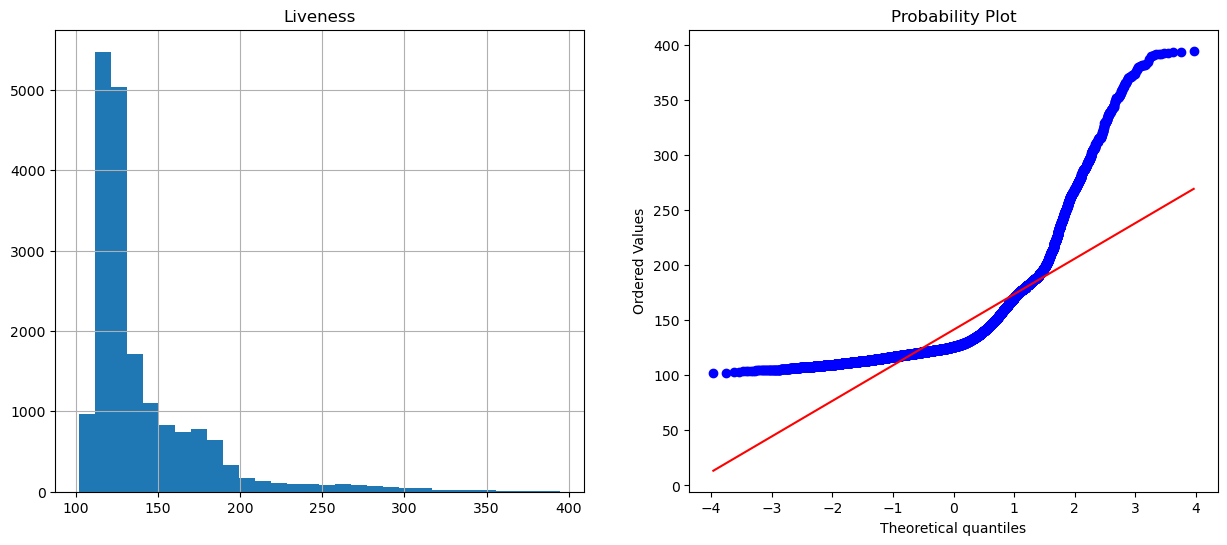

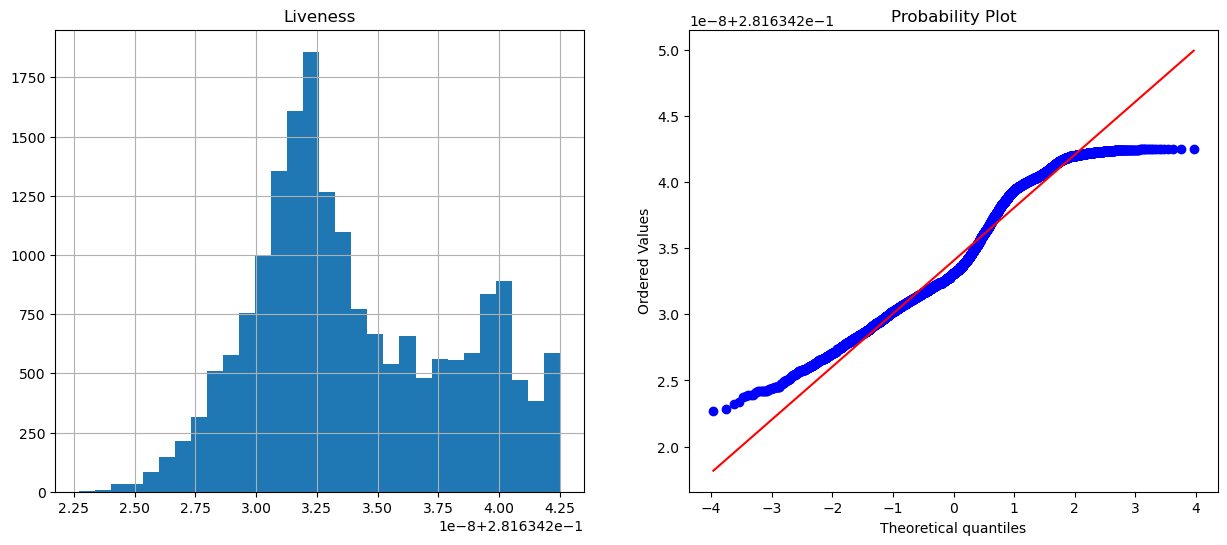

In [30]:
diagnostic_plots(song_data_transform1, 'Liveness')
yjt = YeoJohnsonTransformer(variables = ['Liveness'])
yjt.fit(song_data_transform1)
song_data_transform1 = yjt.transform(song_data_transform1)
diagnostic_plots(song_data_transform1, 'Liveness')

In [31]:
# Function for boxplot
def BoxPlot(data, variable):
    plt.figure(figsize=(2, 4))
    sns.boxplot(data[variable])
    plt.title(f'Boxplot for {variable}')
    plt.xlabel(variable)
    plt.ylabel('Values')
    plt.show()

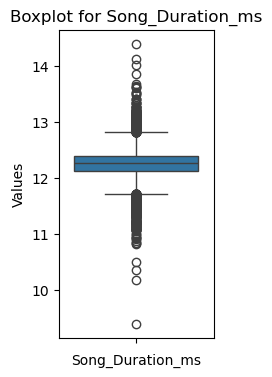

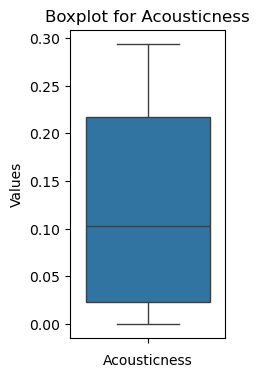

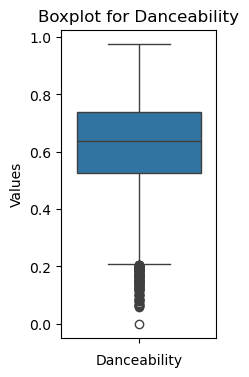

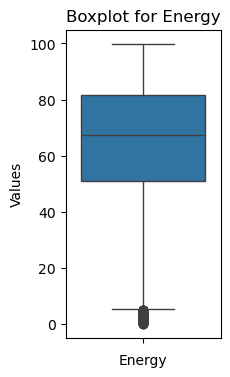

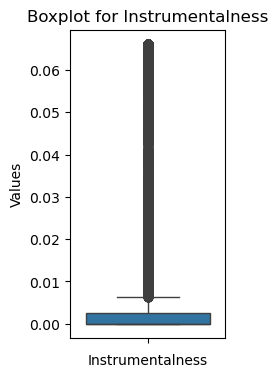

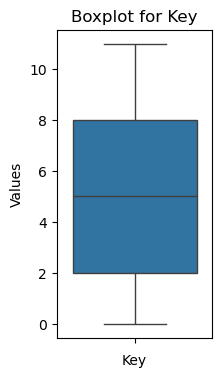

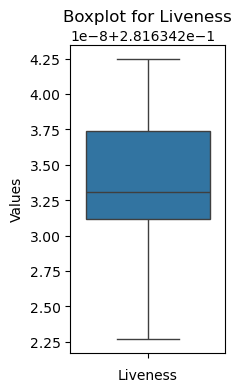

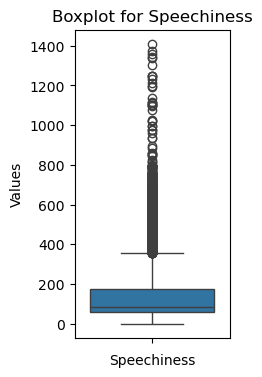

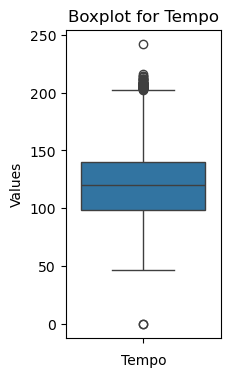

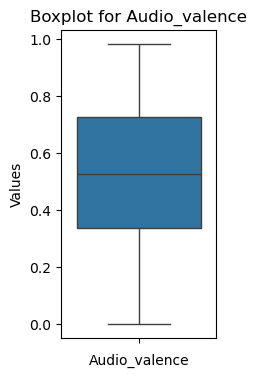

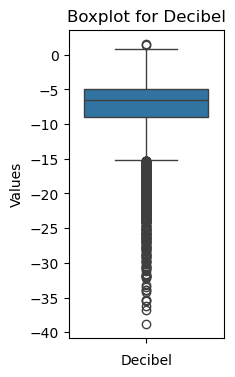

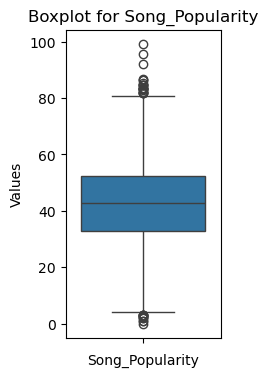

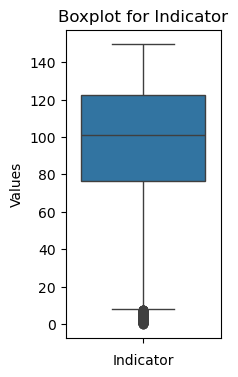

In [32]:
# Box Plot for outlier detection
for num in num_cols:
    BoxPlot(song_data_transform1, num)

In [33]:
trimming = ['tempo']
winsorisation = ['energy','indicator','danceability']
capping = ['instrumentalness','liveness','speechiness','decibel','song_duration_ms','acousticness']

In [34]:
# Outlier Trimming
def find_boundaries(data, variable, distance):

    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

# Winsorisation, Capping
from feature_engine.outliers import Winsorizer

# Zero Coding
from feature_engine.outliers import ArbitraryOutlierCapper

In [35]:
# Outlier Limits for Tempo
tempo_upper_limit, tempo_lower_limit = find_boundaries(song_data_transform1, 'Tempo', 1.5)
tempo_upper_limit, tempo_lower_limit

(202.27850000000004, 36.01849999999998)

In [36]:
# Finding Outliers in Tempo
outliers_tempo = np.where(song_data_transform1['Tempo'] > tempo_upper_limit, True,
                       np.where(song_data_transform1['Tempo'] < tempo_lower_limit, True, False))

In [37]:
# Trimming Outliers
song_data_transform2 = song_data_transform1.loc[~outliers_tempo]

In [38]:
# Winsorising Energy and Indicator
windsorizer_win = Winsorizer(capping_method='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold=0.05,
                        variables=['Energy','Indicator'])
windsorizer_win.fit(song_data_transform2)
song_data_transform2 = windsorizer_win.transform(song_data_transform2)

In [39]:
# Capping for normal
windsorizer_cap_norm = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['Song_Duration_ms','Liveness']) 

windsorizer_cap_norm.fit(song_data_transform2)
song_data_transform2 = windsorizer_cap_norm.transform(song_data_transform2)

# Capping for skewed
windsorizer_cap_skew = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['Instrumentalness','Decibel','Acousticness'])

windsorizer_cap_skew.fit(song_data_transform2)
song_data_transform2 = windsorizer_cap_skew.transform(song_data_transform2)

### Step 4: Train and Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    song_data_transform2.drop('Song_Popularity', axis=1), song_data_transform2['Song_Popularity'], test_size=0.3, random_state=0)

In [41]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(13127, 15) (5626, 15)
(13127,) (5626,)


### Step 5: Missing Value Imputation

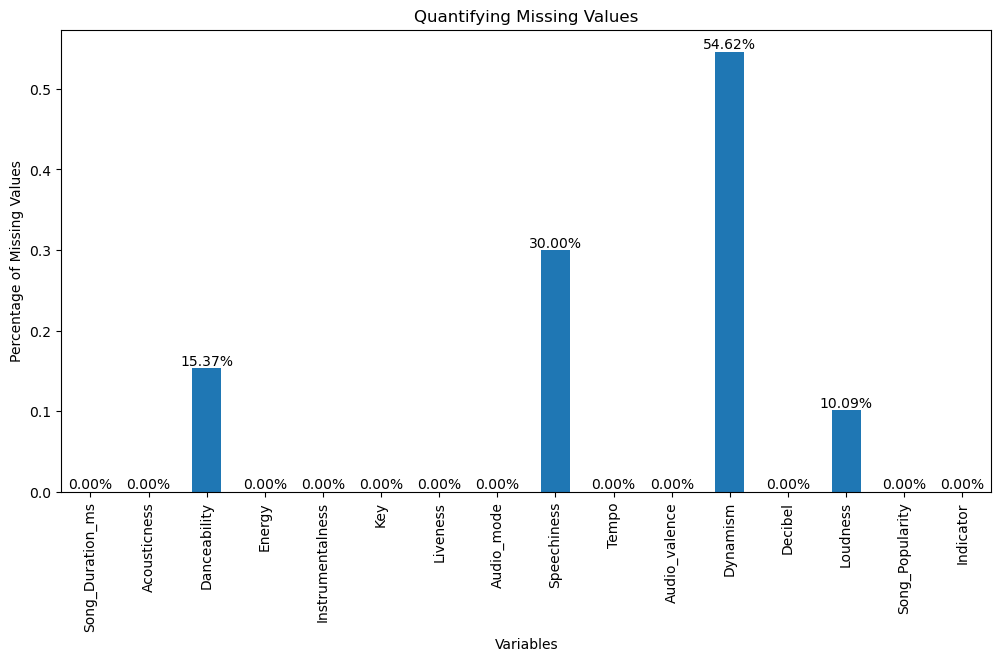

In [42]:
missing_values = song_data_transform2.isnull().mean()
missing_values.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(missing_values):
    plt.annotate(f'{value:.2%}', xy=(i, value), ha='center', va='bottom')

array([[<Axes: title={'center': 'Song_Duration_ms'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>],
       [<Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Liveness'}>,
        <Axes: title={'center': 'Speechiness'}>],
       [<Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Audio_valence'}>,
        <Axes: title={'center': 'Decibel'}>,
        <Axes: title={'center': 'Song_Popularity'}>],
       [<Axes: title={'center': 'Indicator'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

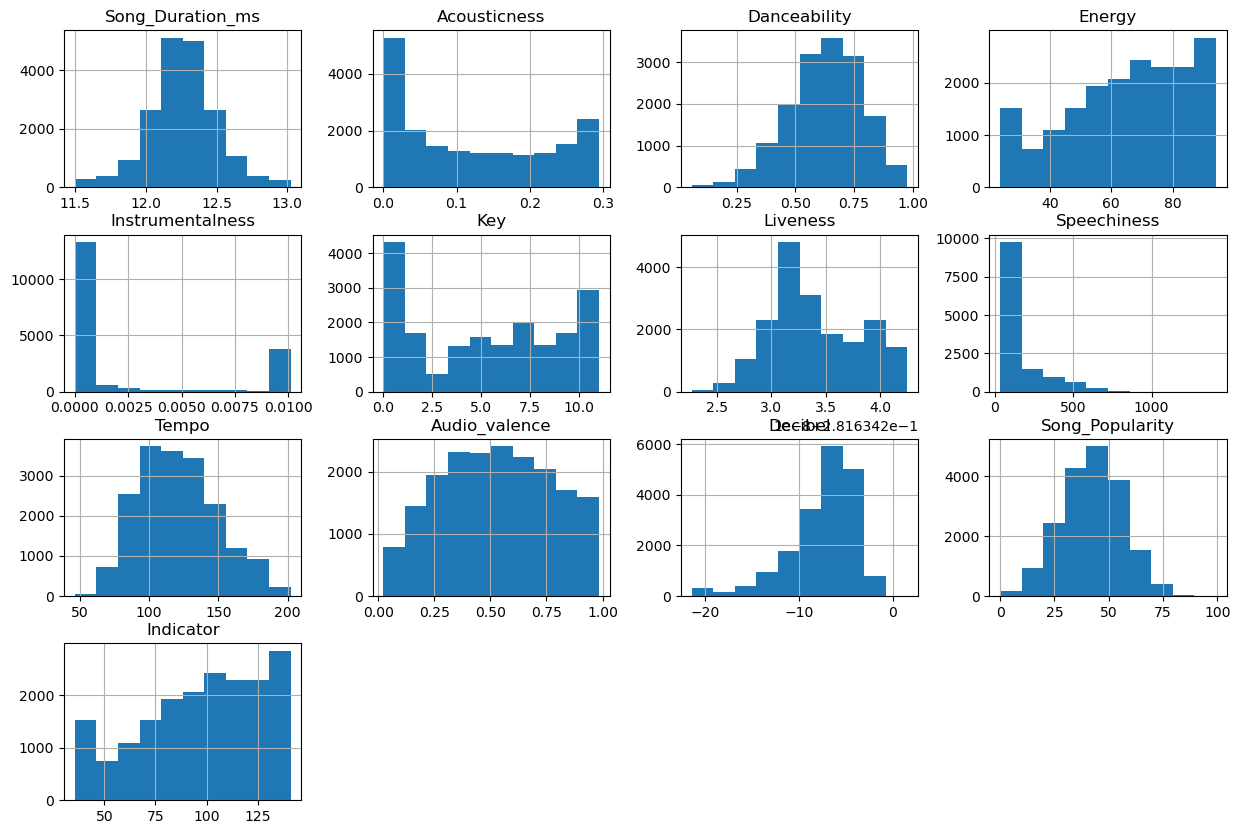

In [43]:
song_data_transform2[num_cols].hist(figsize=(15, 10))

In [44]:
catergorical = 'dynamism, loudness'
mean = 'danceability'
median = 'speechiness'

In [45]:
# Importing necessary imputers
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import EndTailImputer
from feature_engine.imputation import RandomSampleImputer
from feature_engine.imputation import AddMissingIndicator

In [46]:
# Frequent Catergory Imputation for Dynamism and Loudness

mode_imputer = CategoricalImputer(variables=['Dynamism'], imputation_method = 'frequent')

mode_imputer.fit(X_train)

X_train_transform1 = mode_imputer.transform(X_train)
X_test_transform1 = mode_imputer.transform(X_test)

random_imputer = RandomSampleImputer(variables=['Loudness'])

random_imputer.fit(X_train_transform1)

X_train_transform1 = random_imputer.transform(X_train_transform1)
X_test_transform1 = random_imputer.transform(X_test_transform1)

In [47]:
# Median Imputation for Speechiness
median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=['Speechiness'])

median_imputer.fit(X_train_transform1)

X_train_transform1 = median_imputer.transform(X_train_transform1)
X_test_transform1 = median_imputer.transform(X_test_transform1)

# Mean Imputation for Speechiness
median_imputer = MeanMedianImputer(imputation_method='mean',
                                   variables=['Danceability'])

median_imputer.fit(X_train_transform1)

X_train_transform1 = median_imputer.transform(X_train_transform1)
X_test_transform1 = median_imputer.transform(X_test_transform1)

In [48]:
X_train_transform1.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

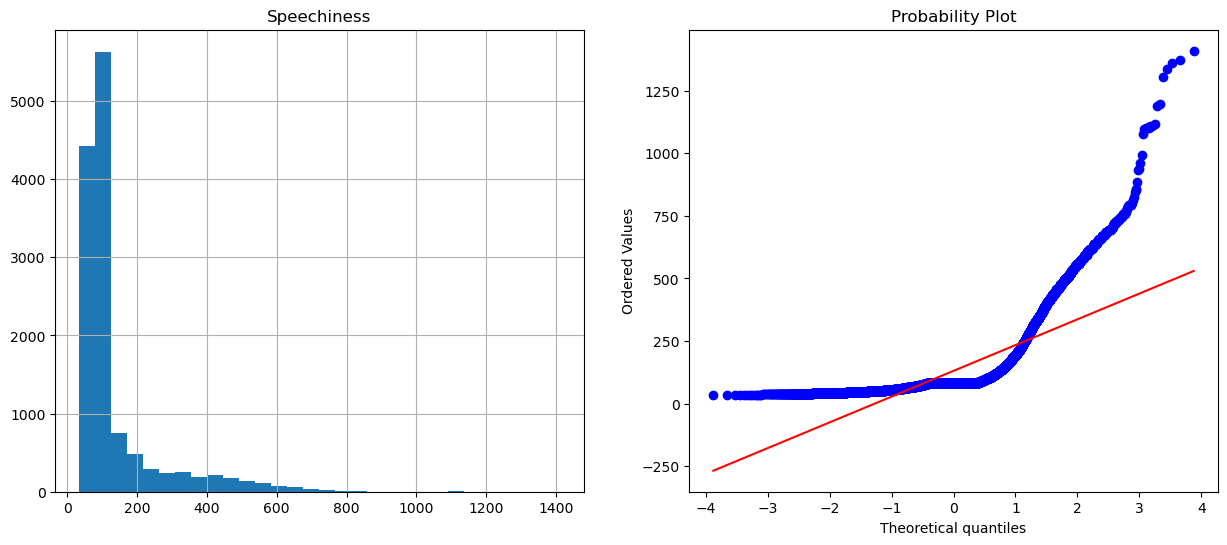

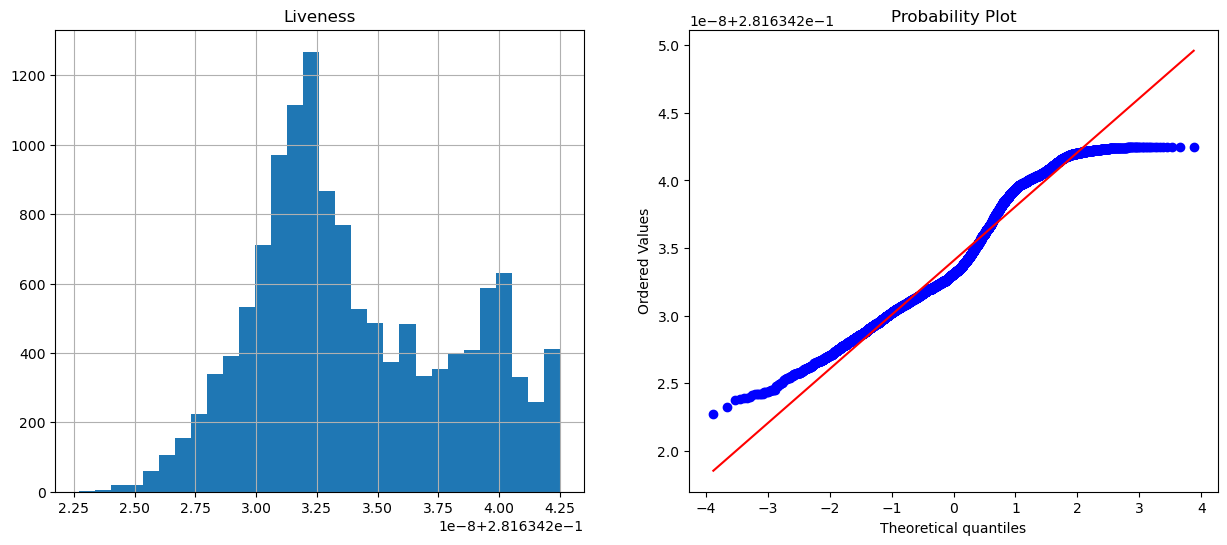

In [49]:
diagnostic_plots(X_train_transform1, 'Speechiness')
yjt = YeoJohnsonTransformer(variables = ['Speechiness'])
yjt.fit(X_train_transform1)
X_train_transform1 = yjt.transform(X_train_transform1)
X_test_transform1 = yjt.transform(X_test_transform1)
diagnostic_plots(X_train_transform1, 'Liveness')

In [50]:
## Will Vary! Please come back to it

windsorizer_na1 = Winsorizer(capping_method='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold=0.05,
                        variables=['Danceability'])
windsorizer_na1.fit(X_train_transform1)
X_train_transform1 = windsorizer_na1.transform(X_train_transform1)
X_test_transform1 = windsorizer_na1.transform(X_test_transform1)

In [51]:
windsorizer_na2 = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['Speechiness'])

windsorizer_na2.fit(X_train_transform1)
X_train_transform1 = windsorizer_na2.transform(X_train_transform1)
X_test_transform1 = windsorizer_na2.transform(X_test_transform1)

### Step 6: Categorical Data Encoding

In [52]:
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder

In [53]:
cat_cols

['Audio_mode', 'Dynamism', 'Loudness']

In [54]:
ohe_encoder = OneHotEncoder(
    top_categories=None,
    drop_last=False,
    variables=['Dynamism'])

ohe_encoder.fit(X_train_transform1)

X_train_transform2 = ohe_encoder.transform(X_train_transform1)
X_test_transform2 = ohe_encoder.transform(X_test_transform1)

In [55]:
# Rare Label Encoding for Loudness
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=6, variables=['Loudness'])  

rare_encoder.fit(X_train_transform2)

X_train_transform2 = rare_encoder.transform(X_train_transform2)
X_test_transform2 = rare_encoder.transform(X_test_transform2)

# Follow-up encoding after Rare Label Encoding
ohe_encoder = OneHotEncoder(
    top_categories=None,
    drop_last=True,
    variables=['Loudness'])

ohe_encoder.fit(X_train_transform2)

X_train_transform2 = ohe_encoder.transform(X_train_transform2)
X_test_transform2 = ohe_encoder.transform(X_test_transform2)

In [56]:
X_train_transform2.head(10)

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
14638         12.465868      0.125506       0.66726    50.6         -0.000000   
18223         12.646995      0.001631       0.78408    74.4          0.010109   
2945          12.382711      0.009802       0.50985    43.0          0.000141   
18355         12.106435      0.003764       0.76131    71.9          0.001784   
824           12.580941      0.006950       0.40491    92.0          0.001041   
17619         12.187567      0.001475       0.74547    61.6          0.000007   
14159         12.040177      0.000163       0.36927    94.1         -0.000000   
12940         12.272796      0.001446       0.60687    94.1          0.000579   
5022          12.059502      0.292912       0.60291    23.7          0.002967   
9684          12.322254      0.000294       0.41382    94.1         -0.000000   

       Key  Liveness Audio_mode  Speechiness    Tempo  ...  Indicator  \
14638    6  0.281634          1     1.167859  145.965  ...      75.90   
18223   10  0.281634          0     1.178870  124.002  ...     111.60   
2945     7  0.281634          1     1.174461   91.841  ...      64.50   
18355    4  0.281634          1     1.174461   99.869  ...     107.85   
824     11  0.281634          0     1.188933  145.085  ...     138.00   
17619    2  0.281634          1     1.174461  156.830  ...      92.40   
14159    1  0.281634          1     1.186316  197.993  ...     141.15   
12940    2  0.281634          1     1.183734  105.046  ...     141.15   
5022     0  0.281634          1     1.174461  144.128  ...      35.55   
9684     7  0.281634          1     1.179407  165.041  ...     141.15   

       Dynamism_Medium  Dynamism_High  Dynamism_Low  Loudness_Rumble  \
14638                1              0             0                1   
18223                0              1             0                0   
2945                 0              1             0                0   
18355                0              1             0                0   
824                  0              1             0                0   
17619                0              1             0                0   
14159                0              1             0                0   
12940                0              1             0                0   
5022                 0              1             0                0   
9684                 0              1             0                0   

       Loudness_Blare  Loudness_Clang  Loudness_Roar  Loudness_Boom  \
14638               0               0              0              0   
18223               1               0              0              0   
2945                0               1              0              0   
18355               0               0              1              0   
824                 1               0              0              0   
17619               0               0              1              0   
14159               0               0              0              1   
12940               0               0              0              1   
5022                0               0              0              0   
9684                0               0              0              1   

       Loudness_Babble  
14638                0  
18223                0  
2945                 0  
18355                0  
824                  0  
17619                0  
14159                0  
12940                0  
5022                 1  
9684                 0  

[10 rows x 22 columns]

### Step 7: Variable Discretization /Binning

In [57]:
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [58]:
arbitrary = ['tempo', 'audio_valence']
equal_freq = ['song_duration_ms']

<Axes: >

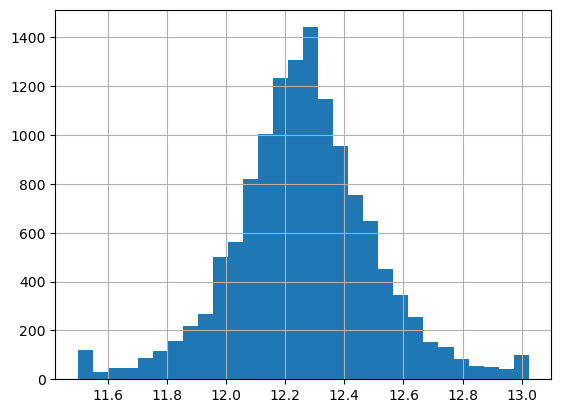

In [59]:
X_train_transform2['Song_Duration_ms'].hist(bins=30)

In [60]:
disc_dur = EqualFrequencyDiscretiser(q=3, variables = ['Song_Duration_ms'])

disc_dur.fit(X_train_transform2)

X_train_transform2 = disc_dur.transform(X_train_transform2)
X_test_transform2 = disc_dur.transform(X_test_transform2)

Text(0, 0.5, 'Number of observations per bin')

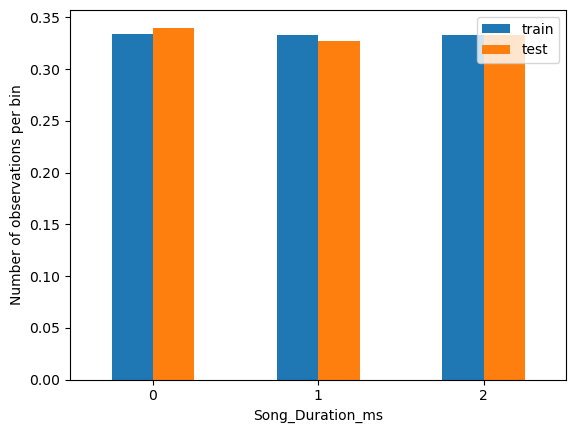

In [61]:
t1 = X_train_transform2.groupby(['Song_Duration_ms'])['Song_Duration_ms'].count() / len(X_train_transform2)
t2 = X_test_transform2.groupby(['Song_Duration_ms'])['Song_Duration_ms'].count() / len(X_test_transform2)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

<Axes: >

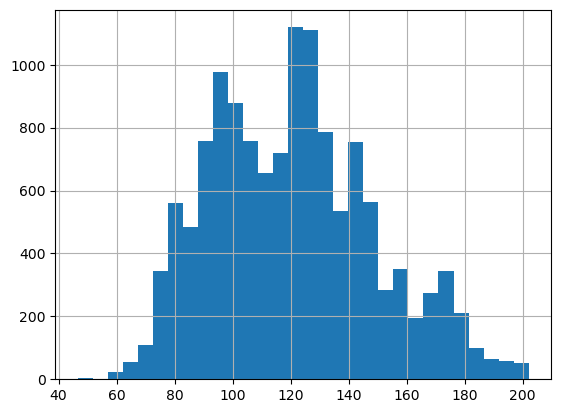

In [62]:
X_train_transform2['Tempo'].hist(bins=30)

In [63]:
X_train_transform2['Tempo_Category'] = pd.cut(
    X_train_transform2['Tempo'], 
    bins=[0, 90, 150, float('inf')], 
    labels=['Slow', 'Medium', 'Fast']
)

X_train_transform2['Tempo_Category'] = pd.cut(
    X_train_transform2['Tempo'], 
    bins=[0, 90, 150, float('inf')], 
    labels=None
)

X_test_transform2['Tempo_Category'] = pd.cut(
    X_test_transform2['Tempo'], 
    bins=[0, 90, 150, float('inf')], 
    labels=['Slow', 'Medium', 'Fast']
)

In [64]:
X_train_transform2['Tempo_Category'].value_counts()

Tempo_Category
(90.0, 150.0]    9269
(150.0, inf]     2046
(0.0, 90.0]      1812
Name: count, dtype: int64

In [65]:
ohe_encoder = OneHotEncoder(
    top_categories=None,
    drop_last=True,
    variables=['Tempo_Category'])

ohe_encoder.fit(X_train_transform2)

X_train_transform2 = ohe_encoder.transform(X_train_transform2)
X_test_transform2 = ohe_encoder.transform(X_test_transform2)

<Axes: >

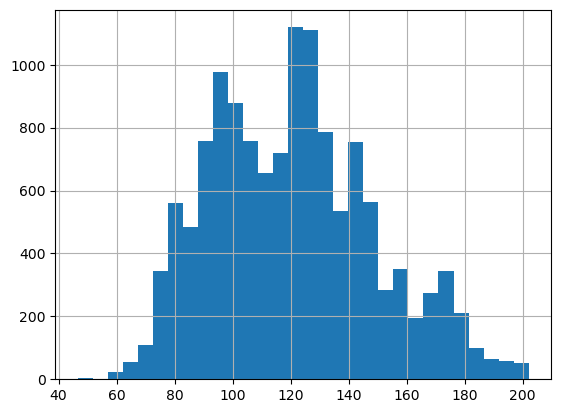

In [66]:
X_train_transform2['Tempo'].hist(bins=30)

In [67]:
X_train_transform2['Audio_Valence_Category'] = pd.cut(
    X_train_transform2['Audio_valence'], 
    bins=[0, 0.3, 0.7, 1], 
    labels=['Low', 'Medium', 'High']
)

X_test_transform2['Audio_Valence_Category'] = pd.cut(
    X_test_transform2['Audio_valence'], 
    bins=[0, 0.3, 0.7, 1], 
    labels=['Low', 'Medium', 'High']
)

In [68]:
ohe_encoder = OneHotEncoder(
    top_categories=None,
    drop_last=True,
    variables=['Audio_Valence_Category'])

ohe_encoder.fit(X_train_transform2)

X_train_transform2 = ohe_encoder.transform(X_train_transform2)
X_test_transform2 = ohe_encoder.transform(X_test_transform2)

In [69]:
X_train_transform2.head(10)

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
14638                 2      0.125506       0.66726    50.6         -0.000000   
18223                 2      0.001631       0.78408    74.4          0.010109   
2945                  2      0.009802       0.50985    43.0          0.000141   
18355                 0      0.003764       0.76131    71.9          0.001784   
824                   2      0.006950       0.40491    92.0          0.001041   
17619                 1      0.001475       0.74547    61.6          0.000007   
14159                 0      0.000163       0.36927    94.1         -0.000000   
12940                 1      0.001446       0.60687    94.1          0.000579   
5022                  0      0.292912       0.60291    23.7          0.002967   
9684                  1      0.000294       0.41382    94.1         -0.000000   

       Key  Liveness Audio_mode  Speechiness    Tempo  ...  Loudness_Rumble  \
14638    6  0.281634          1     1.167859  145.965  ...                1   
18223   10  0.281634          0     1.178870  124.002  ...                0   
2945     7  0.281634          1     1.174461   91.841  ...                0   
18355    4  0.281634          1     1.174461   99.869  ...                0   
824     11  0.281634          0     1.188933  145.085  ...                0   
17619    2  0.281634          1     1.174461  156.830  ...                0   
14159    1  0.281634          1     1.186316  197.993  ...                0   
12940    2  0.281634          1     1.183734  105.046  ...                0   
5022     0  0.281634          1     1.174461  144.128  ...                0   
9684     7  0.281634          1     1.179407  165.041  ...                0   

       Loudness_Blare  Loudness_Clang  Loudness_Roar  Loudness_Boom  \
14638               0               0              0              0   
18223               1               0              0              0   
2945                0               1              0              0   
18355               0               0              1              0   
824                 1               0              0              0   
17619               0               0              1              0   
14159               0               0              0              1   
12940               0               0              0              1   
5022                0               0              0              0   
9684                0               0              0              1   

       Loudness_Babble  Tempo_Category_(90.0, 150.0]  \
14638                0                             1   
18223                0                             1   
2945                 0                             1   
18355                0                             1   
824                  0                             1   
17619                0                             0   
14159                0                             0   
12940                0                             1   
5022                 1                             1   
9684                 0                             0   

       Tempo_Category_(150.0, inf]  Audio_Valence_Category_Low  \
14638                            0                           1   
18223                            0                           0   
2945                             0                           1   
18355                            0                           0   
824                              0                           0   
17619                            1                           1   
14159                            1                           0   
12940                            0                           0   
5022                             0                           0   
9684                             1                           0   

       Audio_Valence_Category_Medium  
14638                              0  
18223                              1  
29

### Step 8: Feature Engineer

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA

In [71]:
# fit the scaler to the train set, it will learn the parameters and transform
scaler = MinMaxScaler()

scaler.fit(X_train_transform2)

scaled_X_train = scaler.transform(X_train_transform2)
scaled_X_test = scaler.transform(X_test_transform2)

In [72]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train_transform2.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test_transform2.columns)

In [73]:
scaled_X_train.dtypes

Song_Duration_ms                 float64
Acousticness                     float64
Danceability                     float64
Energy                           float64
Instrumentalness                 float64
Key                              float64
Liveness                         float64
Audio_mode                       float64
Speechiness                      float64
Tempo                            float64
Audio_valence                    float64
Decibel                          float64
Indicator                        float64
Dynamism_Medium                  float64
Dynamism_High                    float64
Dynamism_Low                     float64
Loudness_Rumble                  float64
Loudness_Blare                   float64
Loudness_Clang                   float64
Loudness_Roar                    float64
Loudness_Boom                    float64
Loudness_Babble                  float64
Tempo_Category_(90.0, 150.0]     float64
Tempo_Category_(150.0, inf]      float64
Audio_Valence_Ca

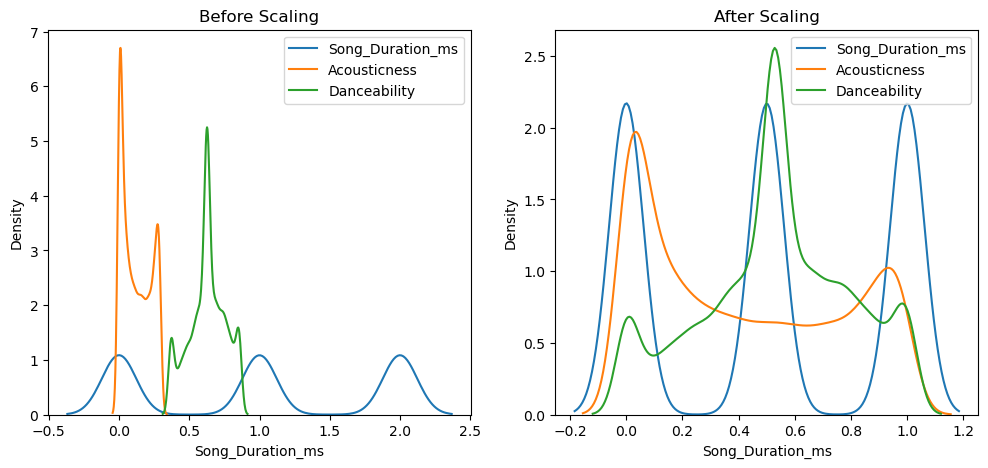

In [74]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(X_train_transform2['Song_Duration_ms'], ax=axes[0], label='Song_Duration_ms')
sns.kdeplot(X_train_transform2['Acousticness'], ax=axes[0], label='Acousticness')
sns.kdeplot(X_train_transform2['Danceability'], ax=axes[0], label='Danceability')
axes[0].legend()

# After scaling
axes[1].set_title('After Scaling')
sns.kdeplot(scaled_X_train['Song_Duration_ms'], ax=axes[1], label='Song_Duration_ms')
sns.kdeplot(scaled_X_train['Acousticness'], ax=axes[1], label='Acousticness')
sns.kdeplot(scaled_X_train['Danceability'], ax=axes[1], label='Danceability')
axes[1].legend()

plt.show()

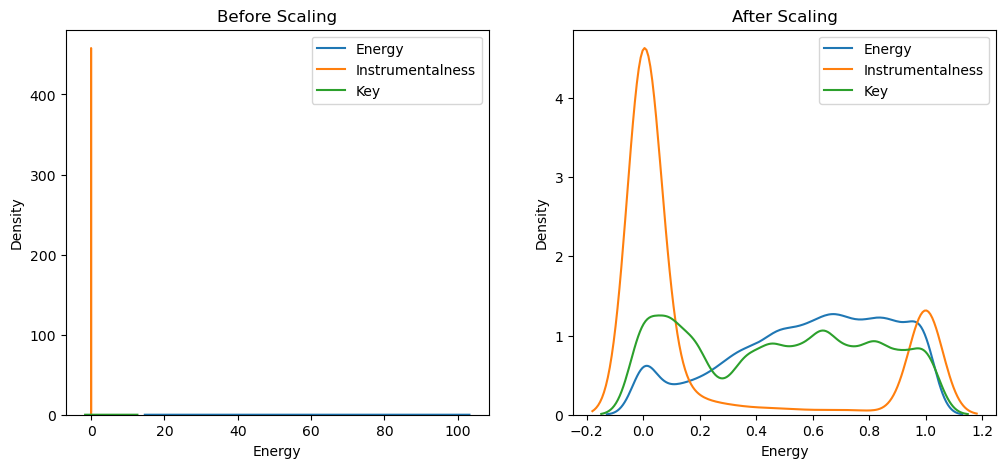

In [75]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(X_train_transform2['Energy'], ax=axes[0], label='Energy')
sns.kdeplot(X_train_transform2['Instrumentalness'], ax=axes[0], label='Instrumentalness')
sns.kdeplot(X_train_transform2['Key'], ax=axes[0], label='Key')
axes[0].legend()

# After scaling
axes[1].set_title('After Scaling')
sns.kdeplot(scaled_X_train['Energy'], ax=axes[1], label='Energy')
sns.kdeplot(scaled_X_train['Instrumentalness'], ax=axes[1], label='Instrumentalness')
sns.kdeplot(scaled_X_train['Key'], ax=axes[1], label='Key')
axes[1].legend()

plt.show()

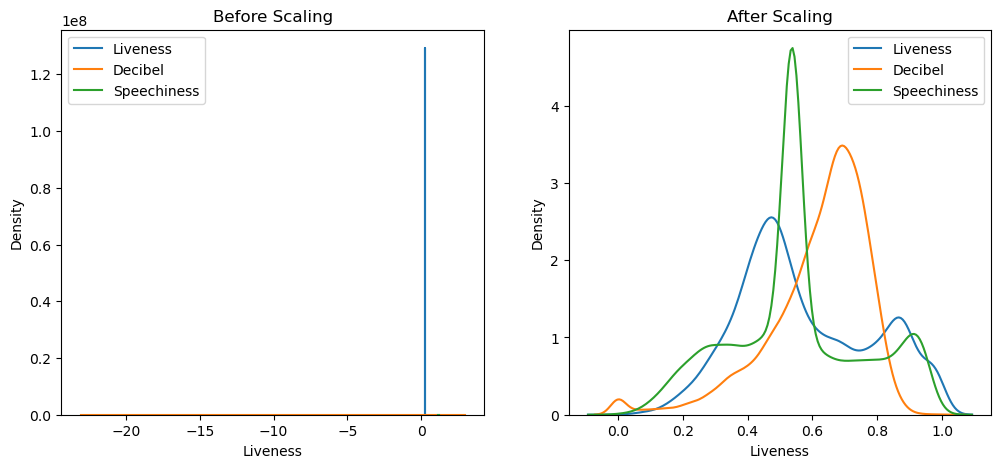

In [76]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(X_train_transform2['Liveness'], ax=axes[0], label='Liveness')
sns.kdeplot(X_train_transform2['Decibel'], ax=axes[0], label='Decibel')
sns.kdeplot(X_train_transform2['Speechiness'], ax=axes[0], label='Speechiness')
axes[0].legend()

# After scaling
axes[1].set_title('After Scaling')
sns.kdeplot(scaled_X_train['Liveness'], ax=axes[1], label='Liveness')
sns.kdeplot(scaled_X_train['Decibel'], ax=axes[1], label='Decibel')
sns.kdeplot(scaled_X_train['Speechiness'], ax=axes[1], label='Speechiness')
axes[1].legend()

plt.show()

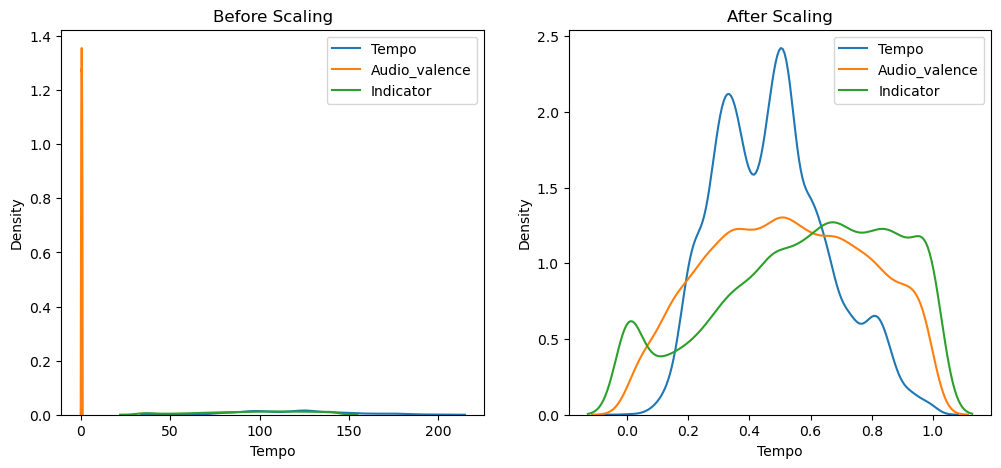

In [77]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(X_train_transform2['Tempo'], ax=axes[0], label='Tempo')
sns.kdeplot(X_train_transform2['Audio_valence'], ax=axes[0], label='Audio_valence')
sns.kdeplot(X_train_transform2['Indicator'], ax=axes[0], label='Indicator')
axes[0].legend()

# After scaling
axes[1].set_title('After Scaling')
sns.kdeplot(scaled_X_train['Tempo'], ax=axes[1], label='Tempo')
sns.kdeplot(scaled_X_train['Audio_valence'], ax=axes[1], label='Audio_valence')
sns.kdeplot(scaled_X_train['Indicator'], ax=axes[1], label='Indicator')
axes[1].legend()

plt.show()

### Step 9: Linear Regression Modelling

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [78]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [79]:
X_train_student_final_premodel_version = scaled_X_train
X_test_student_final_premodel_version = scaled_X_test

y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

In [80]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 117.71207186467126 
 test_mse: 117.21457149790183
train_r-sq: 0.3978803072692081 
 test_r-sq: 0.3916881213922151


In [83]:
# Fit the model 
model = LinearRegression() 
model.fit(X_train_final, y_train) 
 
# Get the coefficients 
coefficients = pd.Series(model.coef_, index=X_train_transform2.columns) 
coefficients.sort_values(ascending=False, inplace=True) 
print(coefficients)

Decibel                          46.071245
Audio_valence                    13.499544
Danceability                      3.783185
Dynamism_Low                      2.275079
Tempo_Category_(150.0, inf]       1.936228
Song_Duration_ms                  1.798084
Audio_Valence_Category_Low        1.711991
Tempo_Category_(90.0, 150.0]      0.581651
Audio_mode                        0.067267
Key                              -0.295534
Acousticness                     -0.325291
Speechiness                      -0.586280
Dynamism_High                    -0.862878
Audio_Valence_Category_Medium    -1.072843
Dynamism_Medium                  -1.412202
Indicator                        -1.482557
Energy                           -1.482557
Liveness                         -1.714370
Tempo                            -2.794616
Instrumentalness                 -3.343807
Loudness_Boom                    -6.201063
Loudness_Babble                  -9.973770
Loudness_Blare                  -10.117223
Loudness_Ru

# Data Wrangling Assignment 1 Report

## Table Of Contents <a id = "top">

### [Objectives](#start)

### 1. [Introduction](#intro)
   - [1.1 Background](#background)
   - [1.2 Problem Statement](#problem)
   - [1.3 Objectives](#objective)
            
### 2. [Exploratory Data Analysis](#variabletypes)
   - [2.1 Data Overview](#overview)
   - [2.2 State of Data](#datastate)
   - [2.3 Types of Variables](#datainfo)
       - [2.3.1 Numeric Variables](#numeric)
       - [2.3.2 Categorical Variables](#categorical)
   - [2.4 Numeric Variables against Target Variable](#target)
 
### 3. [Cleansing Data](#cleansing)
   - [3.1 Missing Values](#missing)
   - [3.2 Outliers](#outliers)

### 4. [Data Transformation](#datatransformation)
   - [4.1 Numerical Data](#numericaltransformation)
   - [4.2 Categorical Data](#categoricaltransformation)
    
### 5. [Feature Engineering](#featureengineering)
    
### 6. [Linear Regression Model](#model)
   - [6.1 Building and Evaluating the Model](#modelbuilding)
   - [6.2 Model Coeffifficients and Correlation Analysis](#coefficient)

### 7. [Summary and Further Improvements](#end)
   - [7.1 Summary](#summary)
   - [7.2 Further Improvements](#furtherimprovements)
   
### 8. [References](#references)

## Objectives <a id = "start">
[Back to top](#top)

In this assignment we will wrangle the data from a real-life dataset to understand different 
data wrangling techniques. 
-  To conduct data exploration, preparation and transformation through different 
methods 
- To prepare the data ready for modeling, build and evaluate a simple linear regression 
model. 
- To document the analysis, comparison and findings 

## 1. Introduction <a id = "intro">
[Back to top](#top)

#### 1.1 Background <a id = "background"></a>
With the constant technological advancements and changes in the preferences of listeners, the music industry is on the rise. Predicting a song's popularity has become more complex and complicated to complete with the many different factors that can affect the popularity or the success of the song. Specific attributes of a song can provide valuable insights for stakeholders. These stakeholders include artists, producers and record labels.

#### 1.2 Problem Statement <a id = "problem"></a>
We are to analysis the dataset, 'song_popularity.csv', to investigate the influence of various song characteristics on the song's popularity. This is such that XYZ Music Records Company can enhance their marketing strategies and optimise resource allocation while increasing the popularity and profitability of their songs. In the highly competitive music industry, XYZ Music Records Company can use the insights gathered from the analysis to make informed decisions on which songs to promote more aggressively, which characteristic to emphasise during music production and how to ensure that marketing effors are maximising profits and revenue. A prediction model can be created to estimate and predict the popularity of the songs based on the difference characteristics of the songs. The data must first be preprocessed and transformed before conducting intepretation and insights that can benefit the company.

#### 1.2 Objectives <a id = "objective"></a>
We are tasked to investigate the influence of various song characteristics on a song's popularity. Based on the dataset used in this assignment, the goal of this project is to create a prediction model to find the popularity of the song based off its various attributes with some objectives. This is to explore the best or suggested song characteristics on song popularity, to determine the influence on listener preferences and performance of the songs. Our primary objective is to conduct analysis on the dataset and offer valuable insights to the management team by aiding them in optimizing their allocation of marketing resources as this can prove beneficial for the company and have the potential to save costs and expenses.

## 2. Exploratory Data Analysis <a id = "datanalysis">
[Back to top](#top)

#### 2.1 Data Overview <a id = "overview"></a>
The data file, song_popularity.csv, shows overall data on data on the different features of songs. Each row is a record of the song the values of its features. As shown in the second cell, a general overview of the first 10 records are displayed to show what we are working with. The data file or dataset contains 18,835 rows and 18 columns. The dataset contains the following data types: float64, int64 and object, where 11 of the columns are floats, 2 are integers and 5 are objects. The columns in the dataset are each feature or characteristic of the song, they are represented in the data dictionary below.

| Column Index | Column              | Description                                                                      |
| ------------ | ------------------- | -------------------------------------------------------------------------------- |
| 1            | Code                | Unique Identifier for each song                                                  |
| 2            | Song_Name           | Name of song                                                                     |
| 3            | Song_Duration_ms    | Duration of the song in milliseconds                                             |
| 4            | Acousticness        | Measure of the acoustic quality of the song, ranging from 0 to 1                 |
| 5            | Danceability        | Measure of how suitable a track is for dancing, ranging from 0 to 1              |
| 6            | Energy              | Measure of the intensity and activity of the song, ranging from 0 to 100         |
| 7            | Instrumentalness    | Measure of the likelihood that the track contains no vocals, ranging from 0 to 1 |
| 8            | Key                 | Key in which the track is composed, represented as an integer                    |
| 9            | Liveness            | Measure of the presence of an audience in the recording, ranging from 0 to 1     |
| 10           | Audio_mode          | Modality of the track                                                            |
| 11           | Speechiness         | Measure of the presence of spoken words in a track, ranging from 0 to 1          |
| 12           | Tempo               | Speed or pace of the song, measured in beats per minute (BPM)                    |
| 13           | Audio_valence       | Measure of the musical positiveness conveyed by a track, ranging from 0 to 1     |
| 14           | Dynamism            | Variation in loudness within the track                                           |
| 15           | Decibel             | Loudness of the track, measured in decibels                                      |
| 16           | Loudness            | Another measure of the track's loudness                                          |
| 17           | Song Popularity     | Measure of the song's popularity, typically on a scale from 0 to 100             |
| 18           | Indicator           | Additional metric related to the song's features                                 |

The overview and shape of the data is as shown below:

In [84]:
song_data.head(10)

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   
5   EI7            Bring Me To Life            235893      0.008771   
6   HI7                 Last Resort            199893      0.000494   
7   EI7    Are You Gonna Be My Girl            213800      0.001450   
8   EI7              Mr. Brightside            222586      0.001058   
9   EI9                 Sex on Fire            203346      0.001686   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3    122.7664           0   
2       0.72963    46.3          0.447000    0    157.5025           1   
3       0.44649    97.0          0.003550    0    121.4404           1   
4       0.44253    76.6          0.000000   10    123.8769           1   
5       0.31284    94.5          0.000002    4    194.8816           0   
6       0.57519    88.7          0.001110    4    160.7824           0   
7       0.60687    95.3          0.000582    2         NaN           1   
8       0.32670    93.6          0.000000    1  119.377476           1   
9       0.53658    90.5          0.010400    9    129.0496           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   
5          NaN  189.931          0.320    Extra   -3.169      NaN   
6        93.60   90.578          0.724     High   -3.659     Boom   
7          NaN  105.046          0.537    Extra   -3.435     Boom   
8          NaN  148.112          0.234      NaN   -3.660     Boom   
9        81.00  153.398          0.374    Extra   -5.653    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90  
5            63.98     141.75  
6            67.74     133.05  
7            62.55     142.95  
8            61.11     140.40  
9            54.76     135.75

In [85]:
song_data.shape

(18835, 18)

#### 2.2 State of Data <a id = "datastate"></a>

The data is generally clean and only some cleaning is required to be done. Some of the data in the dataset contains null values. There are some parts of the data where the values are '?', so they are all converted to NaN or null values to ensure that codes created subsequently can run correctly, and without errors.

On the other hand, as 'Audio_mode' has only two unique values and no null values, it will be unnecessary to transform it or change the outlier since there are none. Therefore, we will convert all data in 'Audio_mode' into strings which makes the data type of the column an object.

Firstly, for the prediction model to work, we will be utilising a Linear Regression model to make accurate and reliable predictions on the song popularity of the songs. For the Linear Regression model to work, we need to remove any columns that do not exhibit numeric properties and have no common values(categorical properties) for all the records in the dataset. In this case, the columns, 'Code' and 'Song_Name', are objects and they do not common or repeat values like the object columns, 'Loudness' and 'Dynamism'. Therefore, 'Code' and 'Song_name' are removed from the data frame.

Secondly, the dataset provided is checked for null values. A bar chart is used to visualise the number of null values in each column and the percentage of null values in the column at the top of each bar.

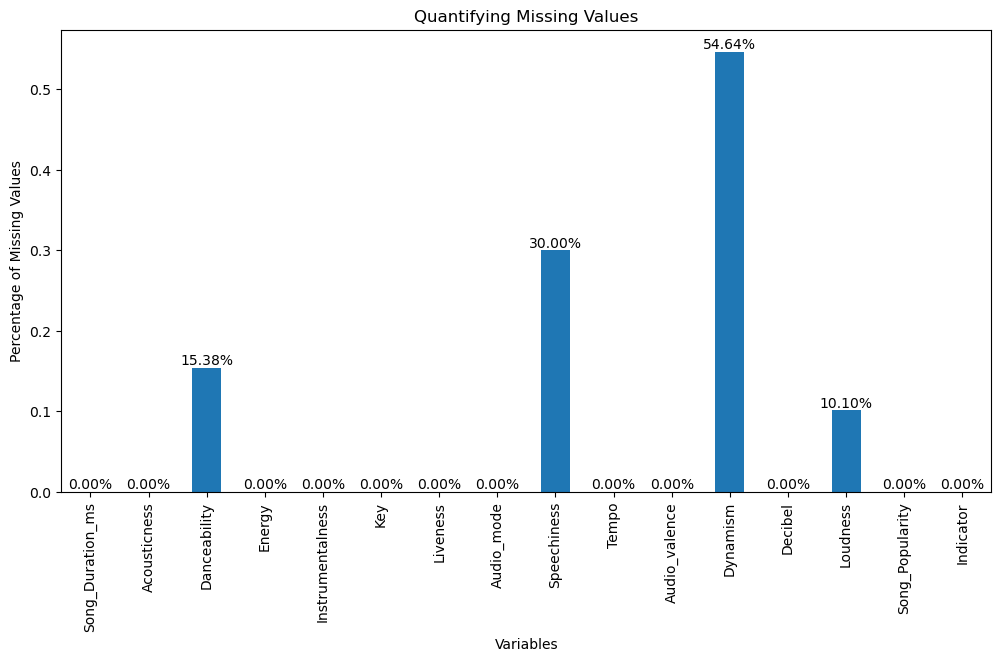

In [86]:
missing_values = new_song_data.isnull().mean()
missing_values.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(missing_values):
    plt.annotate(f'{value:.2%}', xy=(i, value), ha='center', va='bottom')

When checked for total number of null values for each column, the output showed that all columns except for the columns, 'Danceability', 'Liveness', 'Speechniess', 'Loudness' and 'Dynamism' had no null values. 'Danceability' had 2897 null values which is 15.38% of the data in the column. 'Liveness' had 1 null value which is about 0.01% of the data in the column. 'Speechiness' had 5651 null values which is 30% of the data in the column. 'Dynamism' had 3698 null values which is 19.63% of the data in the column. 'Loudness' had 1902 null values which is 10.1% of the data in the column. Overall, these are all the columns that have null values and the percentage composition of null values in the columns.

Thirdly, we are to check the number of unique values in each column of the dataset. A bar chart is used to show the cardinality of the values in the columns or in this case, the number of unique values in each column, excluding null values. It can be seen that 'Tempo' has the highest cardinality, which is then followed by 'Song_Duration_ms'. Majority of the columns have unique values with the smallest number being 2 in 'Audio_mode' since the values in audio mode are only 0 and 1.

Since the '?' in the dataset has been converted into null values, we can see that the 'Liveness' column is still an object since the '?' was regarded as a string. So to ensure that the 'Liveness' column has the correct data type, we will convert it to numeric. 

For the 'Audio_mode' column, since there are only 2 values, we will convert it into a categorical variable. Now the data columns can be divided into their respective categories: numeric or categorical.

Text(0.5, 1.0, 'Cardinality')

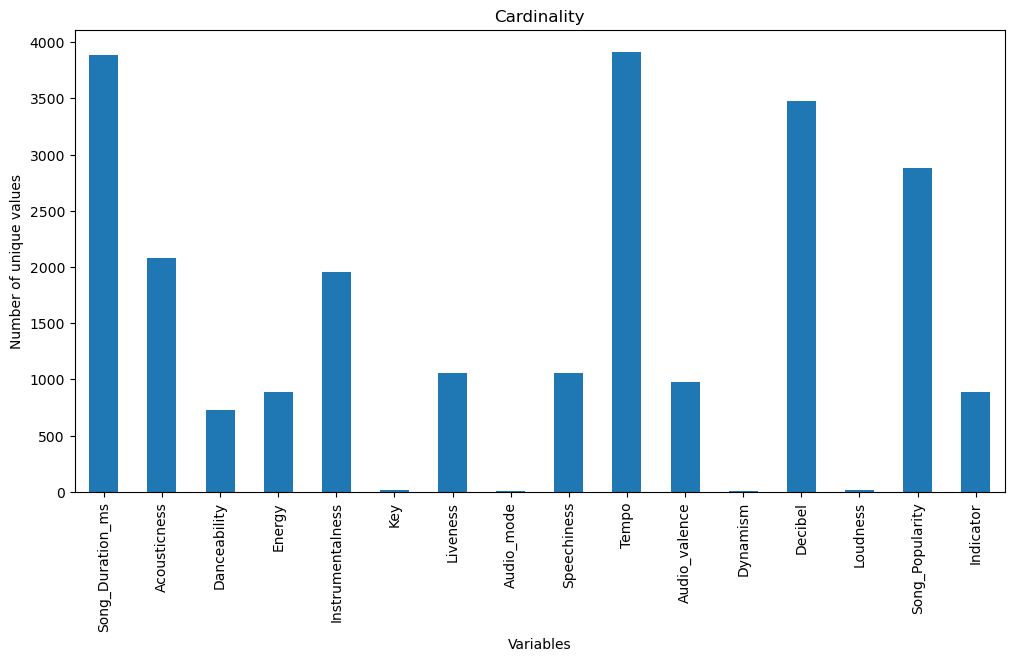

In [87]:
seperate_data = new_song_data.dropna()
unique = seperate_data.nunique().plot.bar(figsize=(12,6))
plt.ylabel("Number of unique values")
plt.xlabel("Variables")
plt.title("Cardinality")

##### 2.3 Types of Variables <a id = 'variabletypes'></a>

Next, we have to identify the different types of variables in the dataset. After determining the categorical and numerical variables, it can be seen that ['Audio_mode', 'Dynamism', 'Loudness'] are categorical variables and ['Song_Duration_ms', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Speechiness', 'Tempo', 'Audio_valence', 'Decibel','Song_Popularity', 'Indicator'] are numerical variables. This means that the categorical variables will need to be encoded and the numerical variables need to be transformed, scaled or capped to be suitable to be used in the model and ensure that the predictions are accurate.

##### 2.3.1 Numeric Variables <a id = "numeric"></a>

To determine the distribution of the numerical variables, histograms are used. It can be seen the majority of the columns are skewed with the exception of 'Danceability', 'Tempo', 'Song_Popularity' and 'Audio_valence'. This also means that the columns are not normal and might need to be transformed while taking into consideration whether the columns are suitable for transformation or changes. To elaborate, the right-skewed columns are 'Energy', 'Decibel' and 'indicator'. The left-skewed columns are 'Song_Duration_ms', 'Acousticness', 'Instrumentalness', 'Liveness' and 'Speechiness'.

<function matplotlib.pyplot.show(close=None, block=None)>

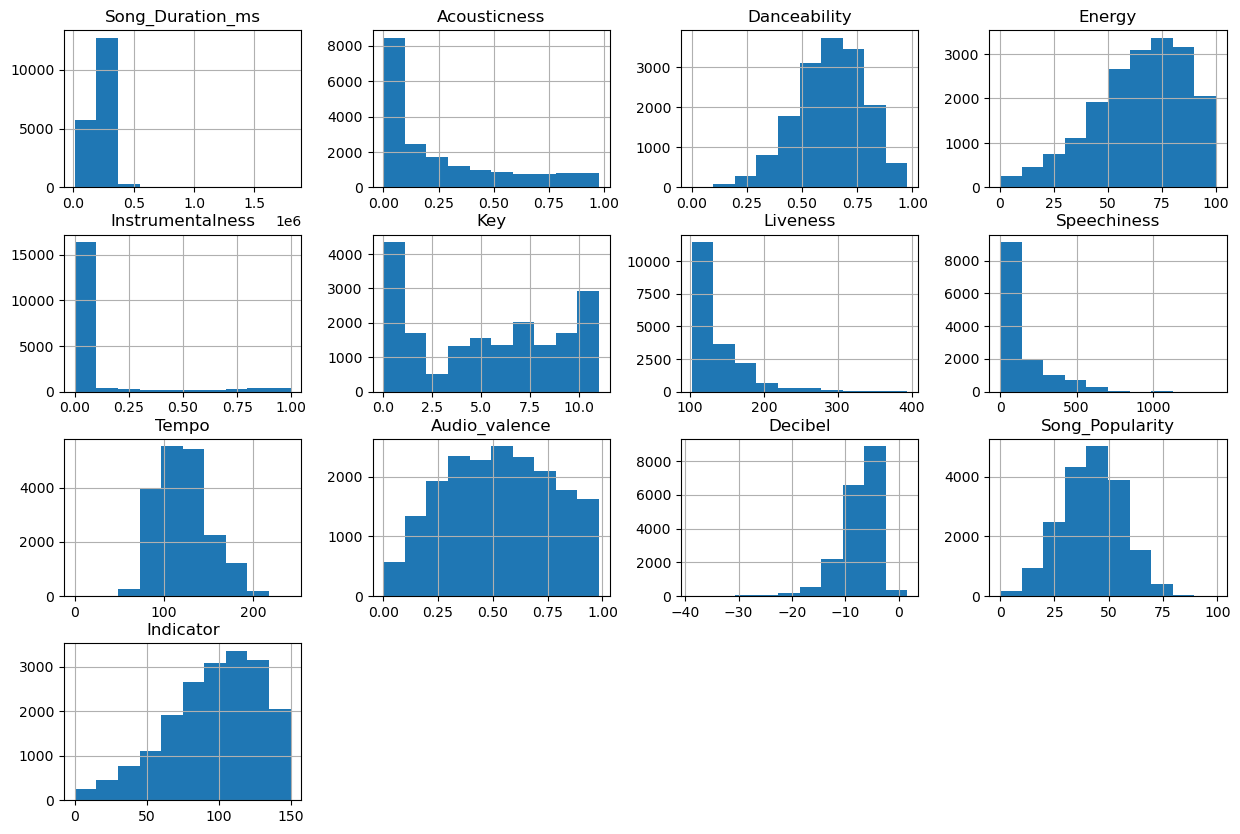

In [88]:
new_song_data[num_cols].hist(figsize=(15, 10))
plt.show

Outliers can sometimes be detrimental to the data as it might cause deviation of the result, and sometimes be useful to get a more reliable result. In this case, outliers are not required and can be transformered to improve the prediction result of the model. To understand more about the outliers in the data, box plots are used to determine where they lie and how many of them are there. Below are the box plots for all the numerical variables and their outliers.

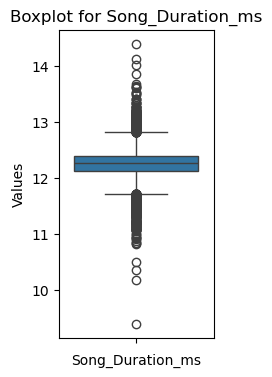

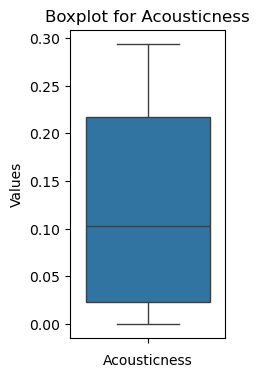

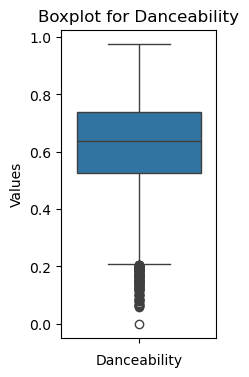

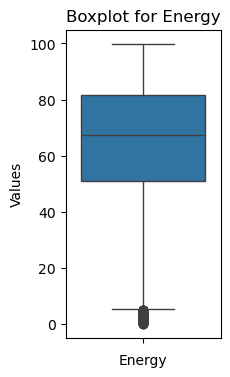

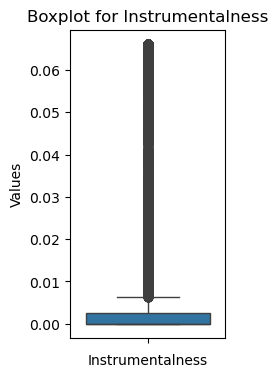

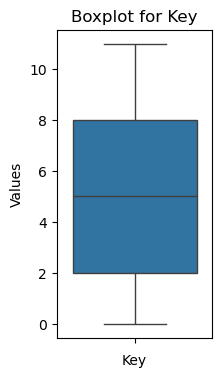

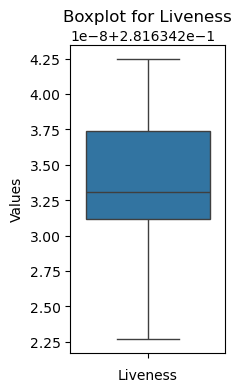

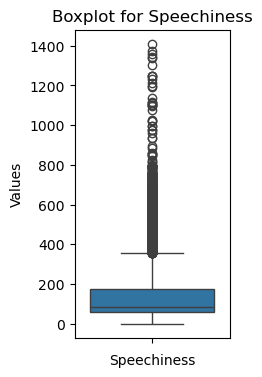

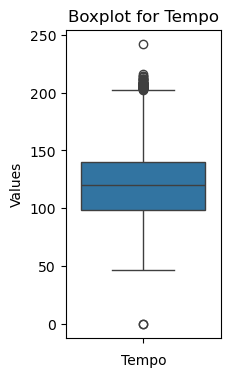

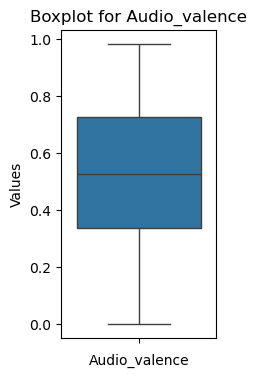

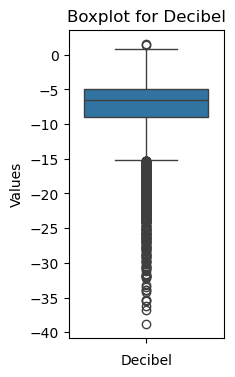

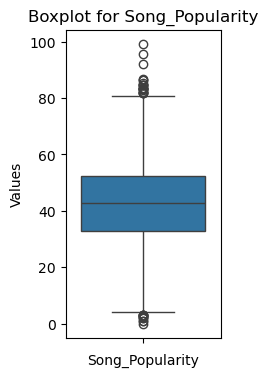

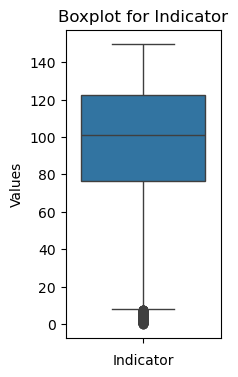

In [89]:
for num in num_cols:
    BoxPlot(song_data_transform1, num)

As shown above, majority of the columns have outliers, except for 'Acousticness', 'Key', 'Liveness' and 'Audio_valence'. Some of the columns have some outliers and they gather near the tails of the box plots while some have many outliers and they extend far away from the tails. The colums that have outliers far away from the tails are 'Tempo'. The columns that have outliers gathering near the tails are 'Energy', 'Indicator', 'Danceability'. The columns that have outliers extending far away from the tails are 'Instrumentalness', 'Liveness', 'Speechiness', 'Decibel', 'Song_Duration_ms' and 'Acousticness'.

##### 2.3.2 Categorical Variables <a id = "categorical">

The categorical column of 'Dynamism' has irregular values such as 'Hi' and 'h' for High, 'Med' and 'm' for Medium and 'Lo' and 'l' for Low. Therefore, we will map the values to three distinct categories, i.e. High, Medium and Low, so that the data in the column can be visualised clearly. As shown in the bar chart of the 'Dyamism' column, the column now shows only three values to keep the data simple and clean.

<Axes: xlabel='Dynamism', ylabel='count'>

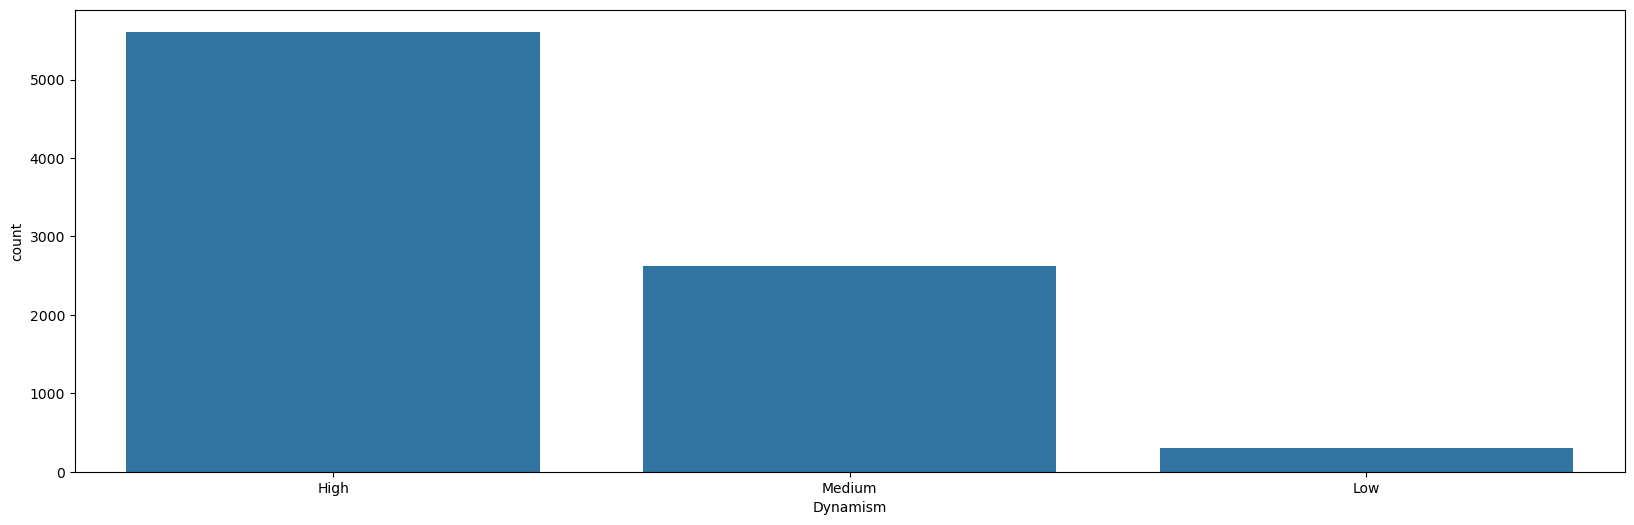

In [90]:
plt.figure(figsize=(20, 6)) 
sns.countplot(data=new_song_data, x=new_song_data['Dynamism'])

The composition of values of the 'Loudness' column can be seen using the bar chart. The bar chart shows that the value 'Blare' has the highest count as compared to the other values, while 'Ear-splitting' and 'Murmur' have the lowest counts. This column has many unique sounds that range from loud sounds to soft ones.

<Axes: xlabel='Loudness', ylabel='count'>

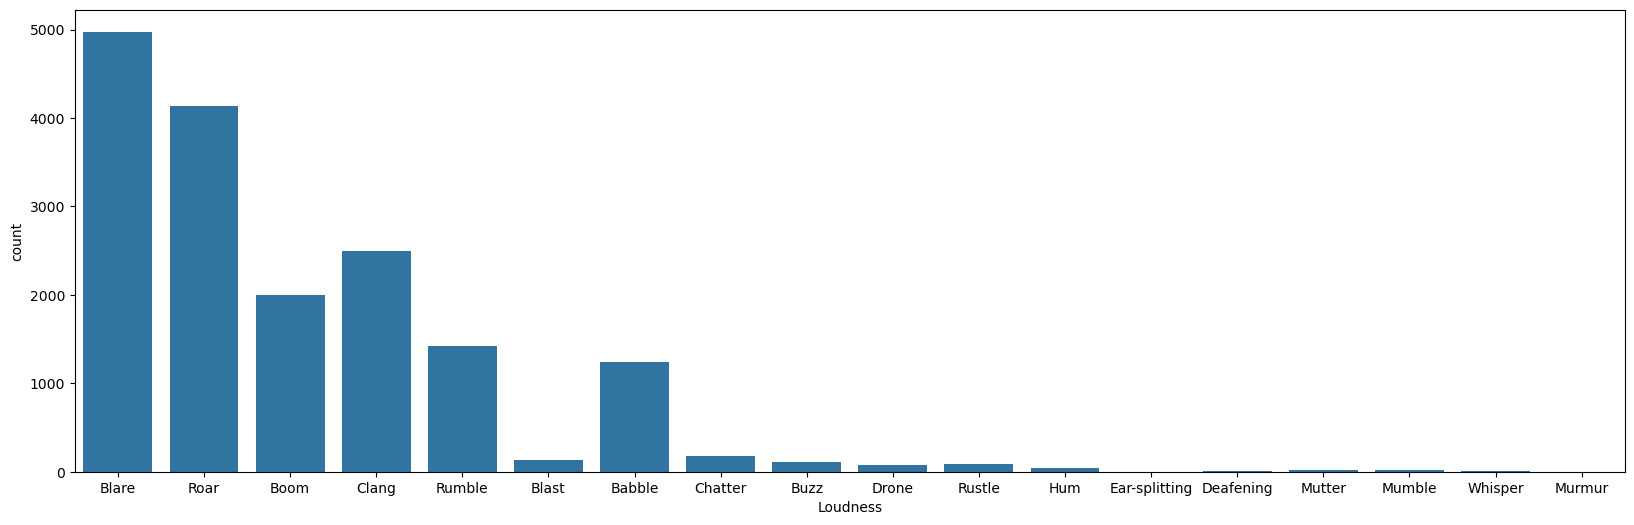

In [91]:
plt.figure(figsize=(20, 6)) 
sns.countplot(data=new_song_data, x=new_song_data['Loudness'])

This bar chart shows the count of values in the 'Audio_mode' column. The bar chart shows that the value '1' has the higher count between both values. This means that there are more songs that are in a major key which is represented by 1 as compared to songs that are in the minor key which is represented by 0.

<Axes: xlabel='Audio_mode', ylabel='count'>

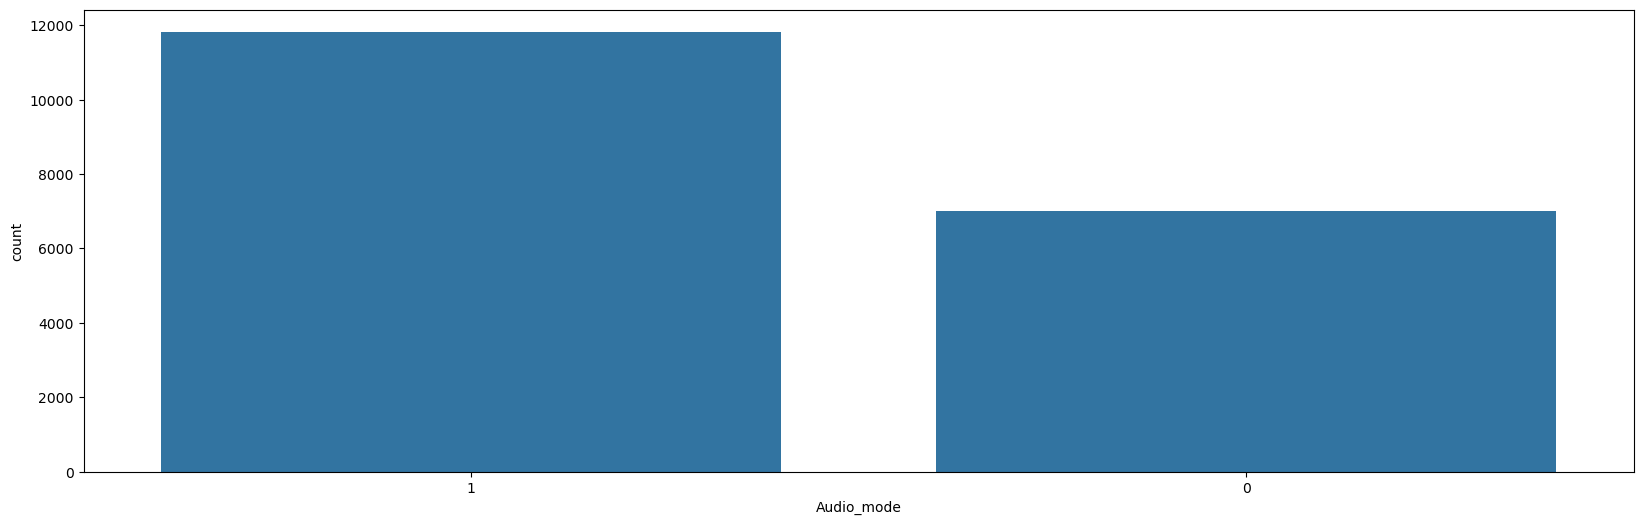

In [92]:
plt.figure(figsize=(20, 6)) 
sns.countplot(data=new_song_data, x=new_song_data['Audio_mode'])

#### 2.4 Numeric Variables against Target Variable <a id = "target"></a>

The default relationship between the numerical variables and target variable, 'Song_Popularity' can be defined using scatter plots. These scatter plots can show how the variables are change with the target variable. By determining the percentile of the values of the target variable to show high popularity, we can use a horizontal line to show the area of the scatter plot that has songs with high popularity. We can also conclude the preferences of the listeners and can modify our strategies along the different parameters of the variables that shows exhibit high popularity of the songs.

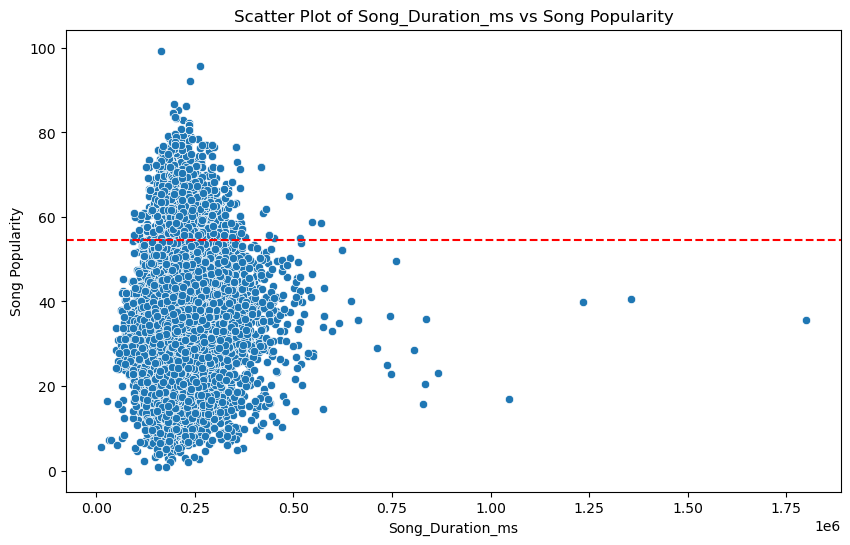

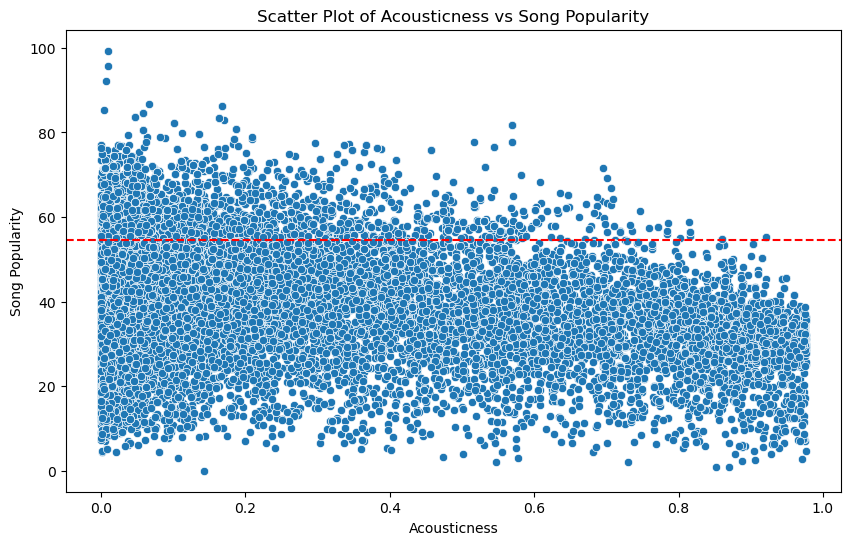

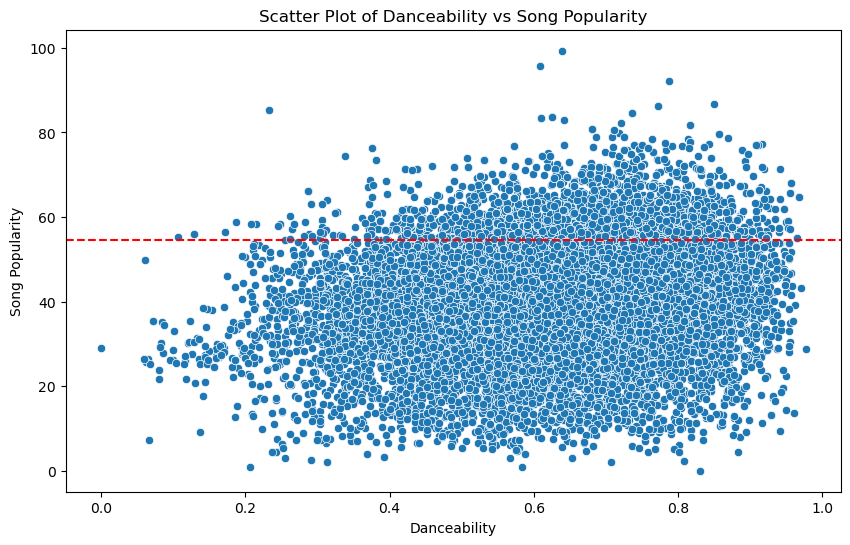

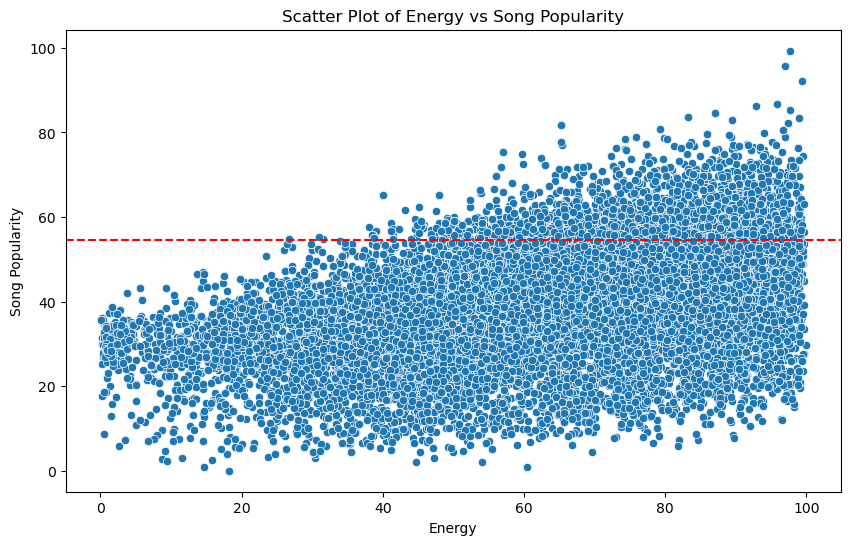

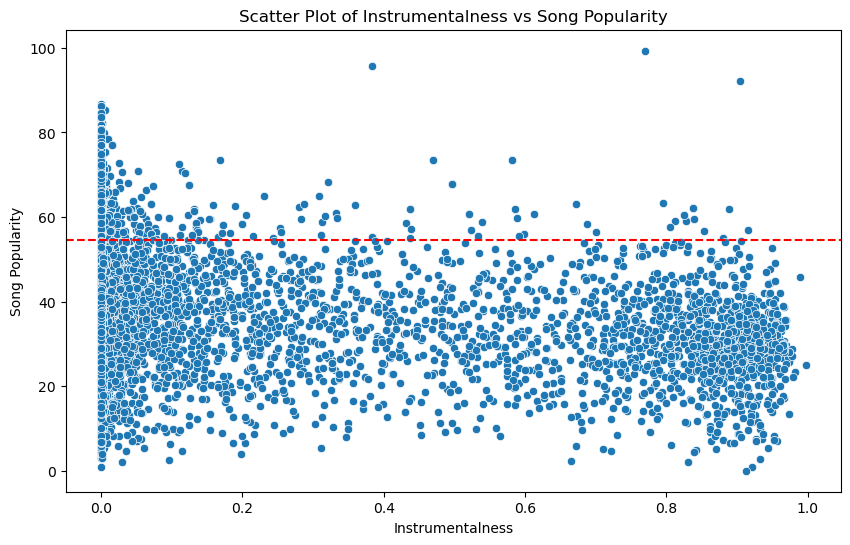

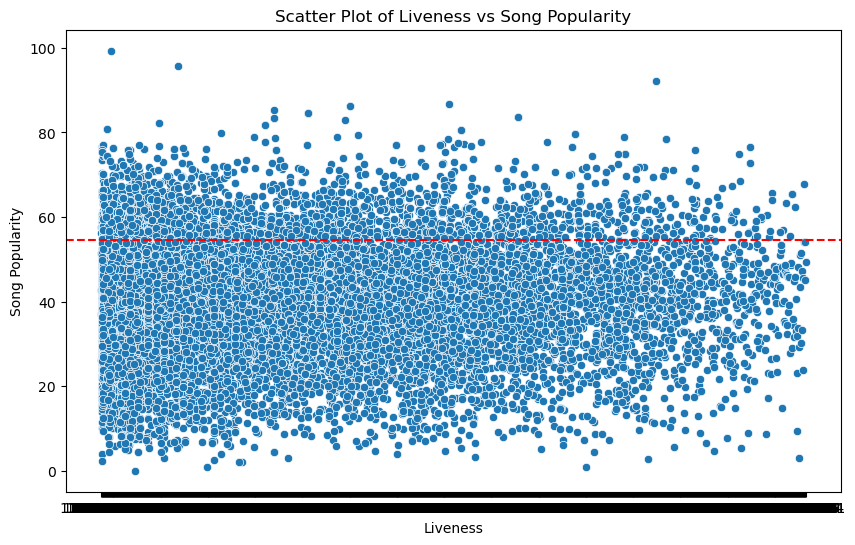

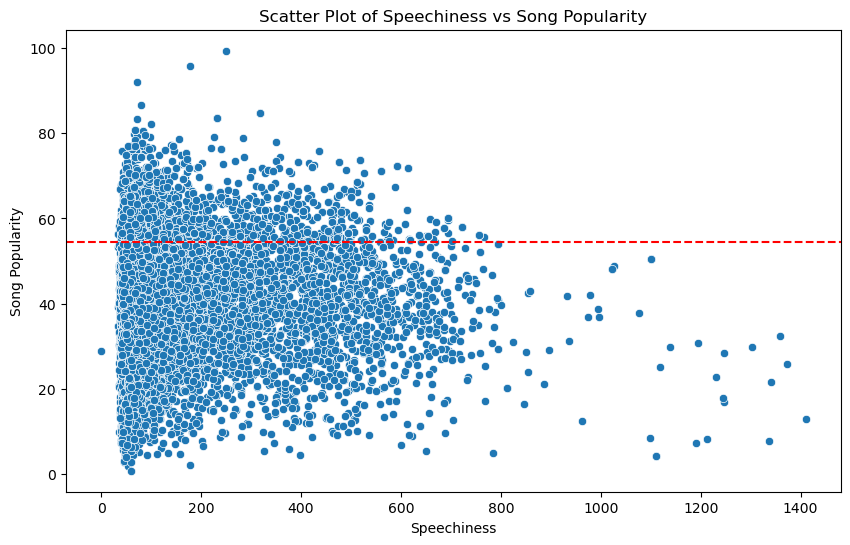

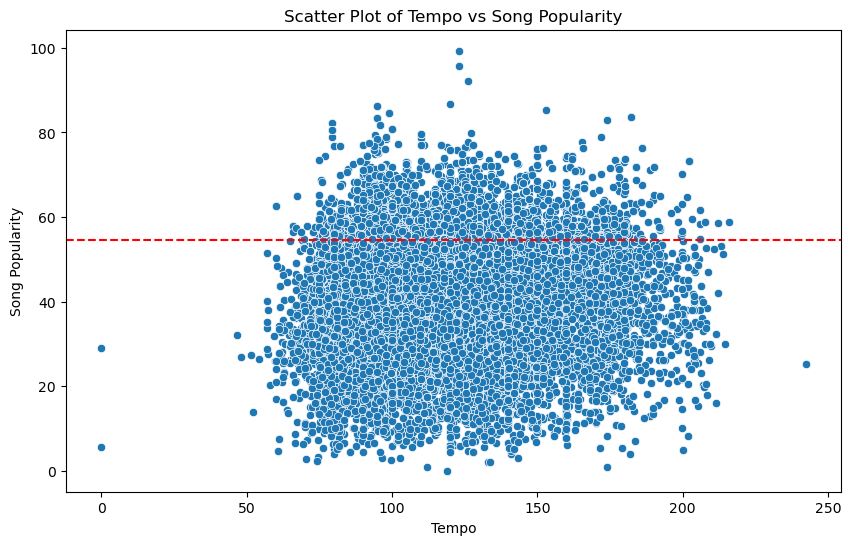

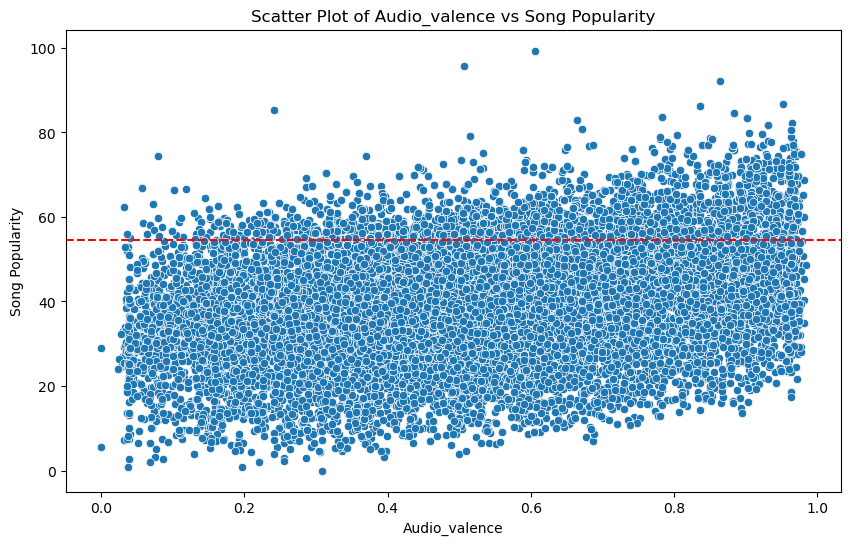

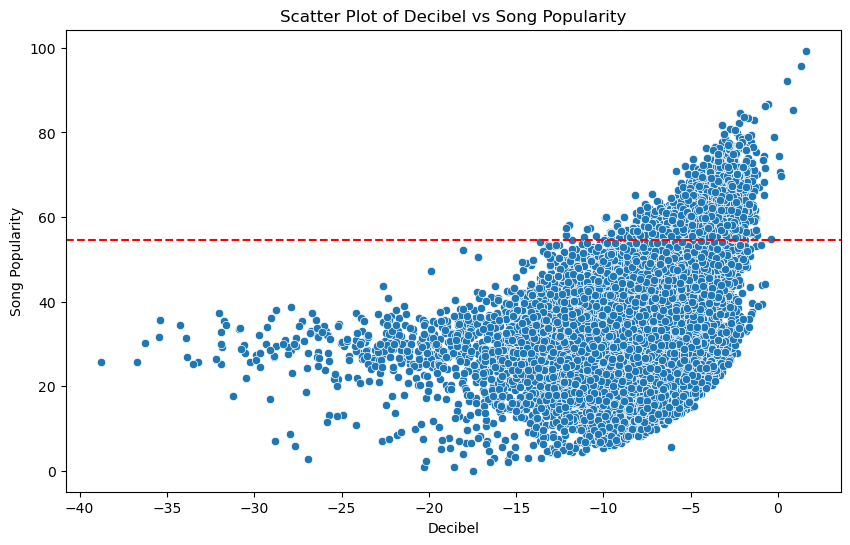

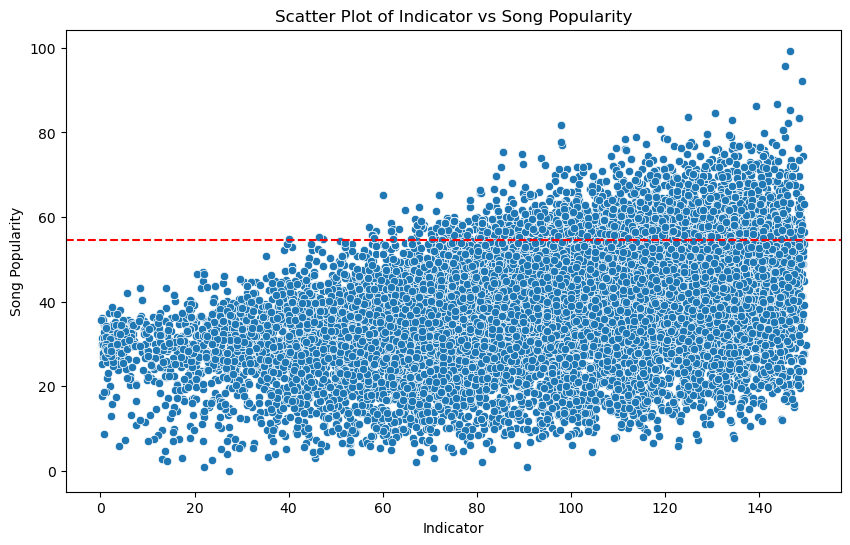

In [93]:
columns_to_plot = [
    "Song_Duration_ms", "Acousticness", "Danceability", "Energy", 
    "Instrumentalness", "Liveness", 
    "Speechiness", "Tempo", "Audio_valence", 
    "Decibel",  "Indicator"
]
percentile_80 = song_data['Song_Popularity'].quantile(0.80)

for i, column in enumerate(columns_to_plot, 1):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=song_data, x=column, y="Song_Popularity")
    plt.axhline(y=percentile_80, color='r', linestyle='--')
    plt.title(f'Scatter Plot of {column} vs Song Popularity')
    plt.xlabel(column)
    plt.ylabel("Song Popularity")
    plt.show()


## 3. Cleansing Data <a id = "cleansing">
[Back to top](#top)

#### 3.1 Missing Data <a id = "missing"></a>

There are many missing data present in the columns, 'Danceability', 'Speechniess', 'Loudness' and 'Dynamism'. The null values of the data in this columns are generally more than 5%, therefore, we will not conduct any data removal so as to not lose any required and necessary information from the dataset. For the four columns, we used different imputation techniques to fill in the data that was missing or null.

Null values in categorical variables, such as 'Dynamism' and 'Loudness', are imputed using the Categorical Imputer and Random Sample Imputer respectively. For the 'Dynamism' column, the Categorical Imputer is used to remove the null values and replace them with the value that has the highest count, which in this case is 'High' since it is the mode of the column. This is because the 'Dynamism' column has only three unique values and majority of data in the column is 'High', therefore, the null values are filled with 'High'. For the 'Loudness' column, the Random Sample Imputer is used to remove the null values and replace them with a random value that is present in the column. This is because the 'Loudness' column has many unique values and some values are generally dominant over some with these values not having much of a difference in margin, thus a Random Sample Imputer is used to fill in the null values and to ensure randomness instead of bias in the column that can affect the predictions made by the model. 

Null values in the numeric variables, such as 'Danceability' and 'Speechiness', are imputed using the Mean and Median Imputer. For the 'Danceability' column, since the distribution of the data is normal, the Mean method of the Imputer is used to fill in the null values. For the 'Speechiness' column, since the distribution of the data is skewed, the Median method of the Imputer is used to fill in the null values.

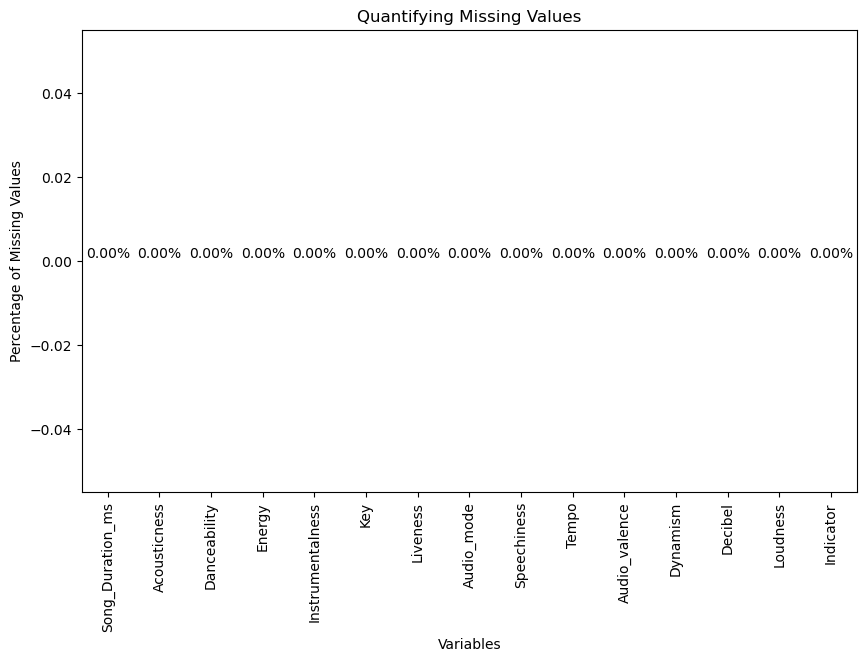

In [94]:
visual_missing_values = X_train_transform1.isnull().mean()
visual_missing_values.plot.bar(figsize=(10,6))
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Variables")
plt.title("Quantifying Missing Values")
for i, value in enumerate(visual_missing_values):
    plt.annotate(f'{value:.2%}', xy=(i, value), ha='center', va='bottom')

With this all the columns or variables with null values present have all been imputed. All null values can all remove from the columns and replaced with a value generated by the imputation methods used. Different types of variables have different imputation methods and numeric variables of different distributions also have different methods of imputation.

#### 3.2 Outliers <a id = "outliers"></a>

Different numeric variables have different outliers and different distribution of outliers at the tails of their respective box plots. For those columns with mild or moderate outliers that are closer to the tails, we will conduct winsorisation. For those columns with many outliers extending further away from the tails, we will conduct capping. On the other hand, for the columns with a minimal number of outliers far away from the tails, we will conduct trimming.

The only column that will be transformed using trimming will be 'Tempo'. Those columns that will be transformed using winsorisation are 'Energy' and 'Danceability'. Those columns that will be transformed using capping are 'Instrumentalness', 'Liveness', 'Speechiness', 'Decibel', 'Song_Duration_ms' and 'Acousticness'. 

Firstly, to trim the 'Tempo' column, we will be using a function to find the boundaries for the column where we will find the boundaries using the upper and lower quantile of the box plot and the inter quartile range. We can use the function to determine the upper limit and the lower limit of the column, where the outliers can be found. The parts with the outliers are trimmed off. With this, the outliers are removed from the column. We used trimming for the 'Tempo' column as the 'Tempo' column has a minimal number of outliers that are far away from the tails. So they can be removed from the column without leaving such a big impact that will affect the data for the prediction model.

<Axes: title={'center': 'After Imputation'}, ylabel='Tempo'>

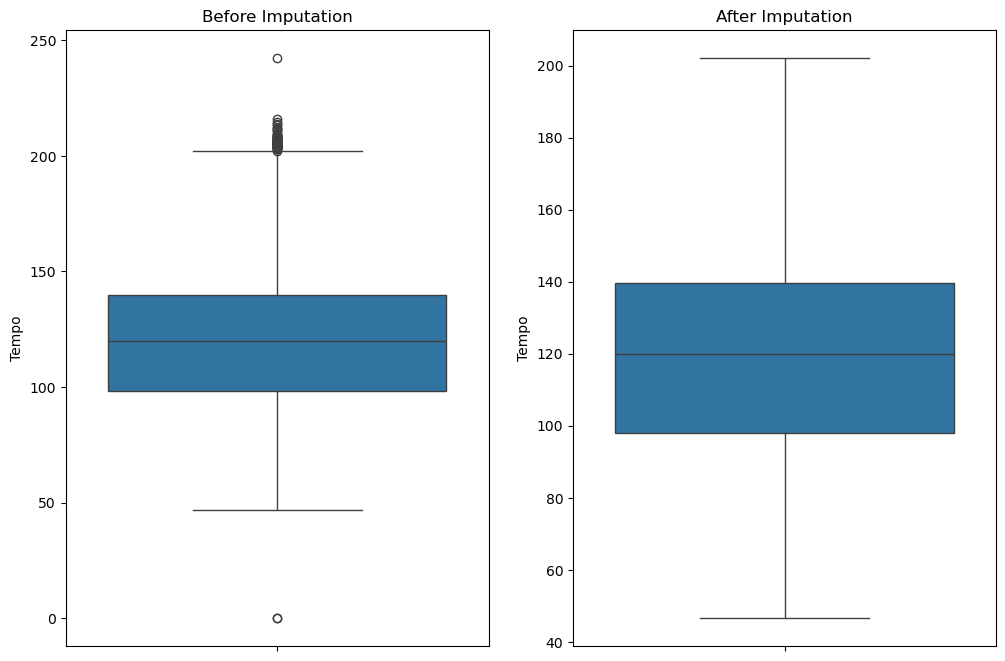

In [95]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Tempo'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Tempo'], ax=axes[1])

Secondly, to remove the outliers present in the 'Energy', 'Indicator' and 'Danceability', we will conduct winsorisation. Winsorisation is suitable for columns that have mild or moderate outliers and will not influence the data disproportionately while retaining all the data points. Using the Winsorizer from feature engine with the quantile capping method, majority of the outliers are removed from the column and replaced with a more appropriate data value. Although there are still outliers present, the number of outliers are minimal and will have close to neglible impact on the data for the prediction model.

<Axes: title={'center': 'After Imputation'}, ylabel='Energy'>

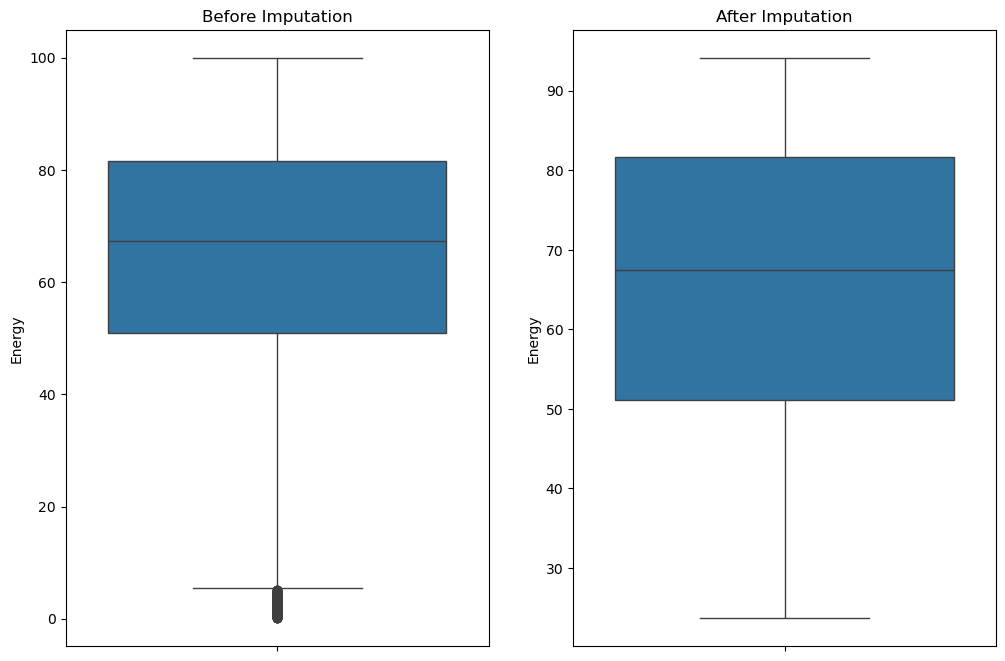

In [96]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Energy'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Energy'], ax=axes[1])

<Axes: title={'center': 'After Imputation'}, ylabel='Indicator'>

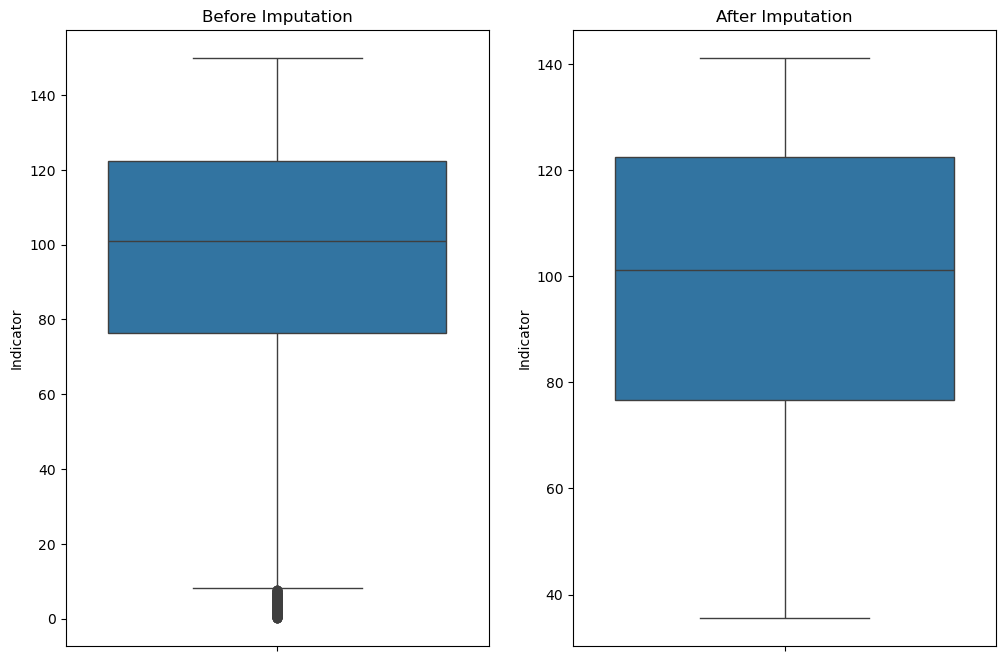

In [97]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Indicator'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Indicator'], ax=axes[1])

<Axes: title={'center': 'After Imputation'}, ylabel='Danceability'>

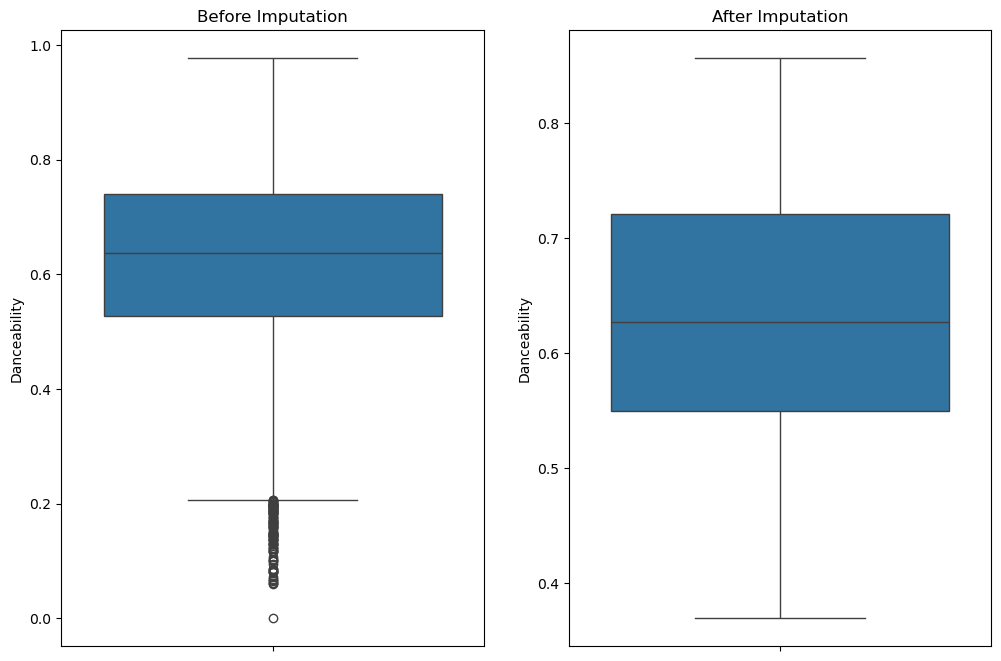

In [98]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Danceability'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Danceability'], ax=axes[1])

Thirdly, to remove the outliers present in 'Instrumentalness', 'Liveness', 'Speechiness', 'Decibel', 'Song_Duration_ms' and 'Acousticness', we will conduct capping. Capping is suitable for columns that severe outliers which have a high chance of being errors or anomalies and at the same time, it will effectively mitigate the influence of the outliers on the data. Using the Winsorizer from feature engine with the interquartile range as the capping method, majority of the outliers are removed from the column and replaced with a more appropriate data value that fits within the thresholds that were set. Although there are still outliers present, the number of outliers are minimal and will have close to neglible impact on the data for the prediction model.

<Axes: title={'center': 'After Imputation'}, ylabel='Instrumentalness'>

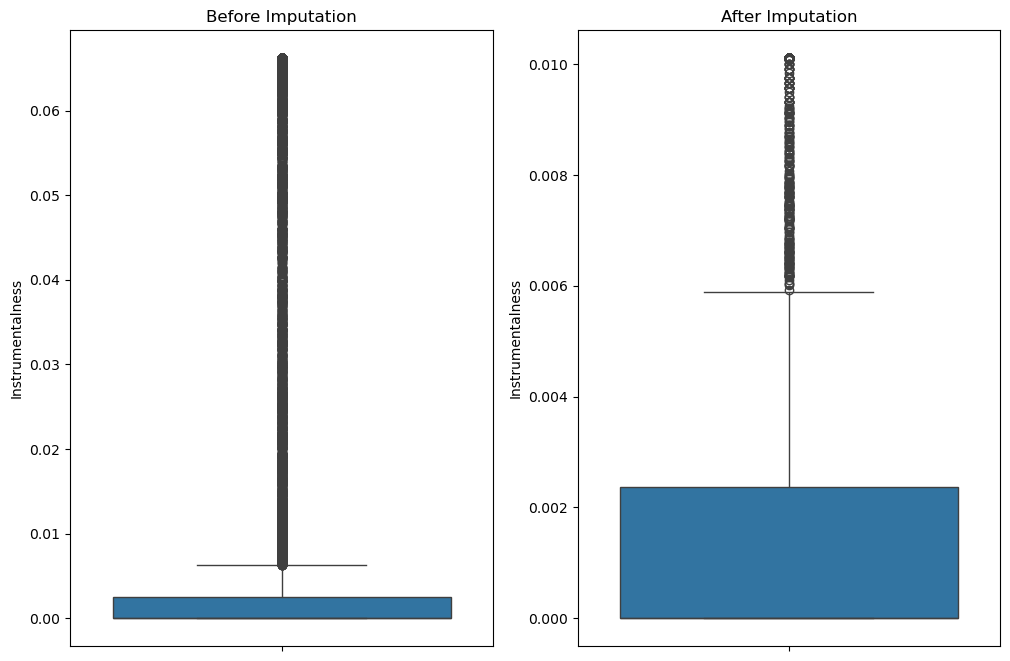

In [99]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Instrumentalness'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Instrumentalness'], ax=axes[1])

<Axes: title={'center': 'After Imputation'}, ylabel='Liveness'>

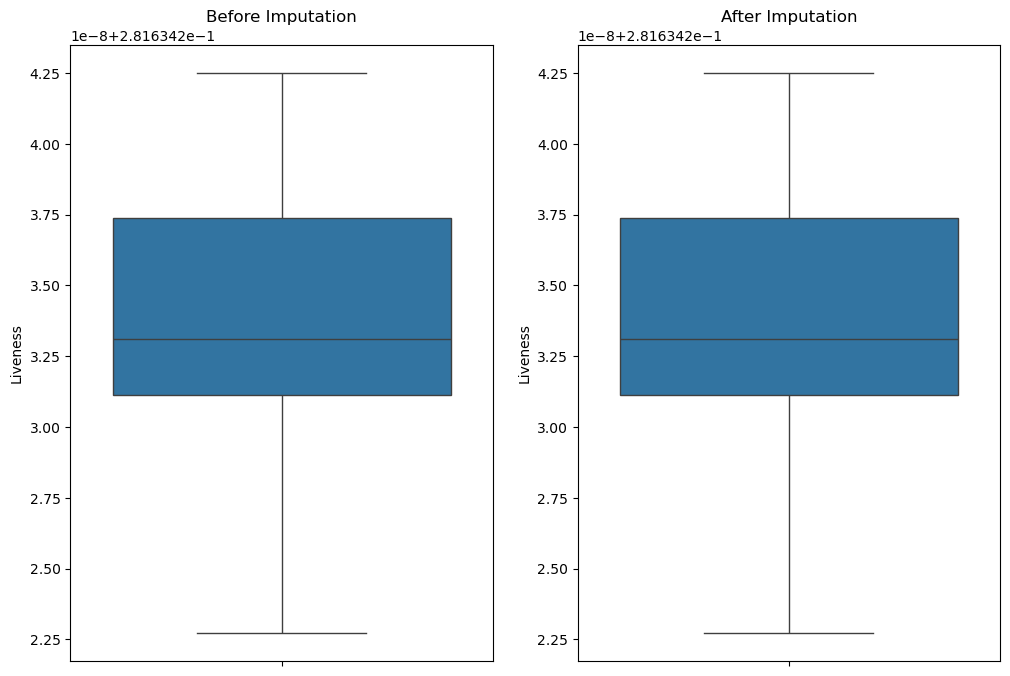

In [100]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Liveness'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Liveness'], ax=axes[1])

<Axes: title={'center': 'After Imputation'}, ylabel='Speechiness'>

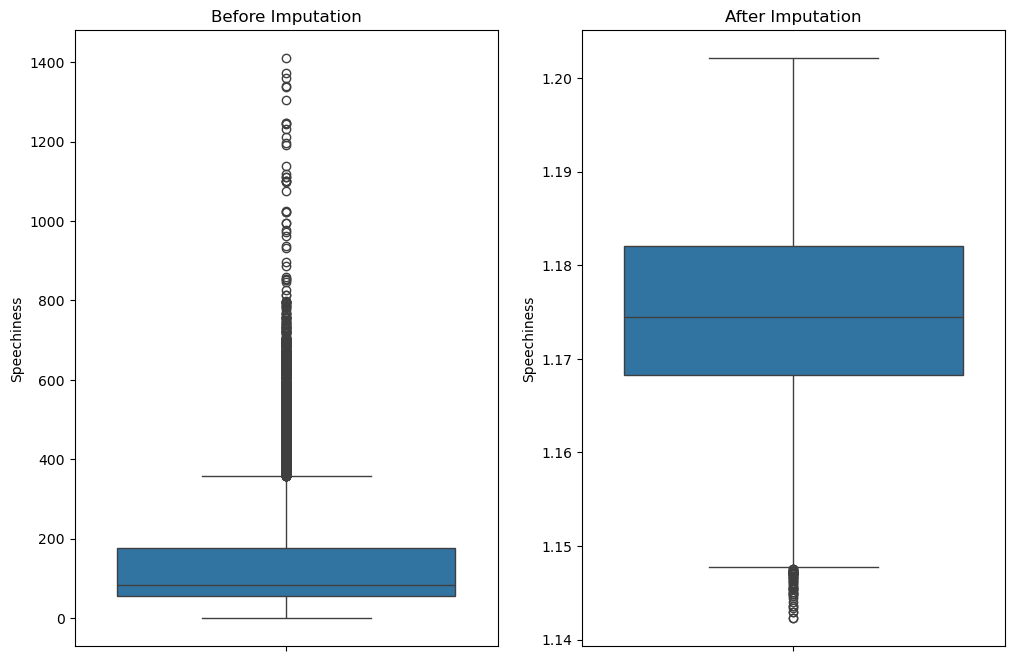

In [101]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Speechiness'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Speechiness'], ax=axes[1])

<Axes: title={'center': 'After Imputation'}, ylabel='Decibel'>

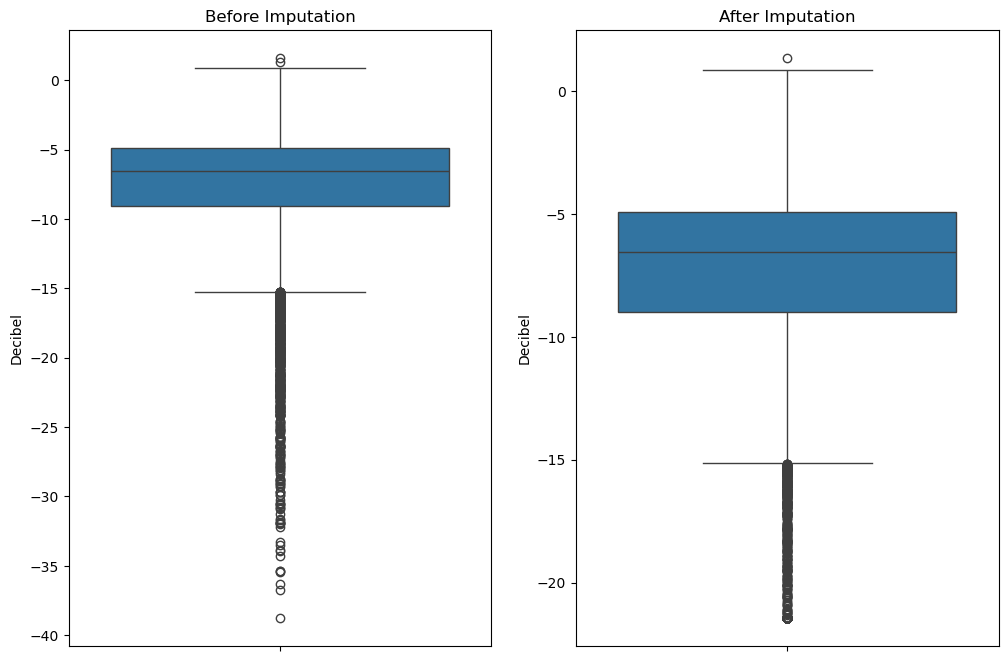

In [102]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Decibel'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Decibel'], ax=axes[1])

<Axes: title={'center': 'After Imputation'}, ylabel='Song_Duration_ms'>

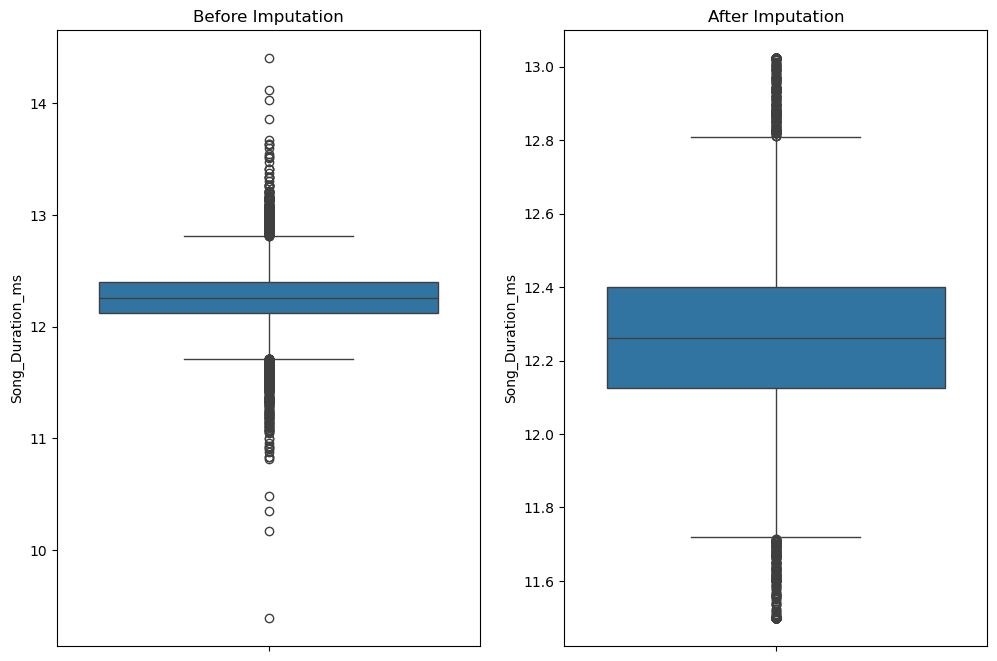

In [103]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
axes[0].set_title('Before Imputation')
sns.boxplot(y=song_data_transform1['Song_Duration_ms'], ax=axes[0])

axes[1].set_title('After Imputation')
sns.boxplot(y=X_train_transform1['Song_Duration_ms'], ax=axes[1])

With this most of the outliers in the numeric columns are removed and replaced. Even for the columns that still have outliers, the number of outliers have significantly decreased as compared to before outlier removal. This way, we will not suffer data loss in the columns with the outliers and achieve a more suitable dataset for the prediction model.

Now, we will conduct a comparison using other methods on the outliers of some of the columns:

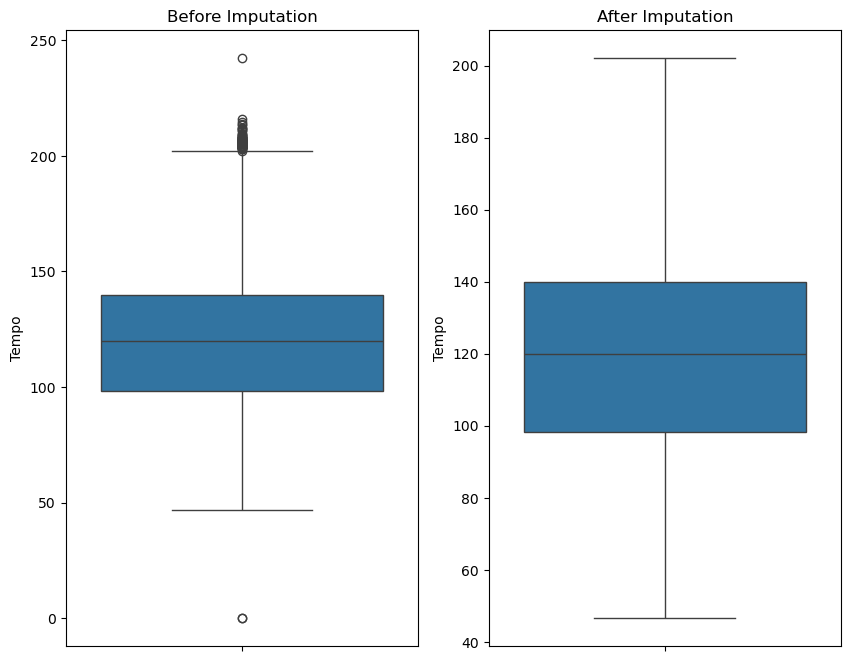

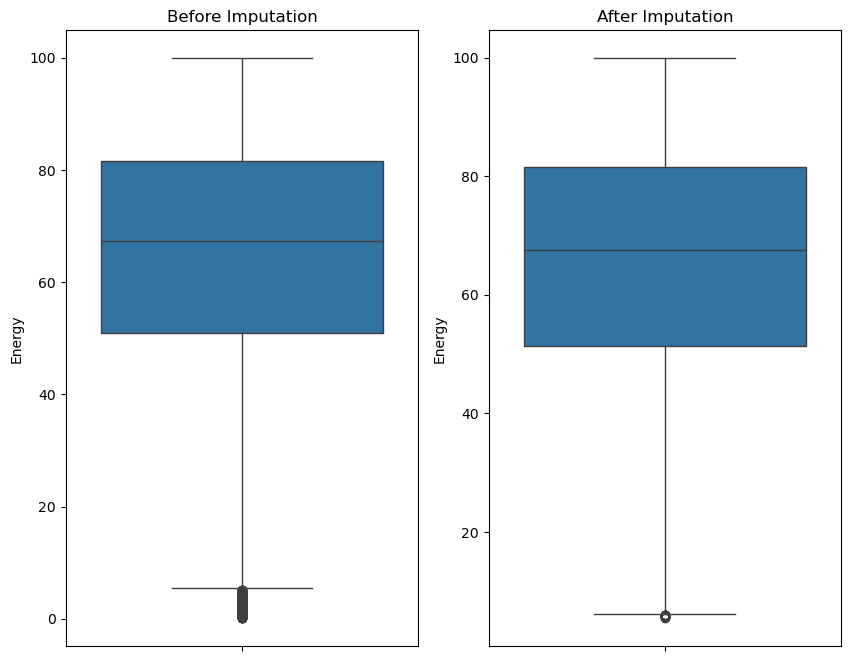

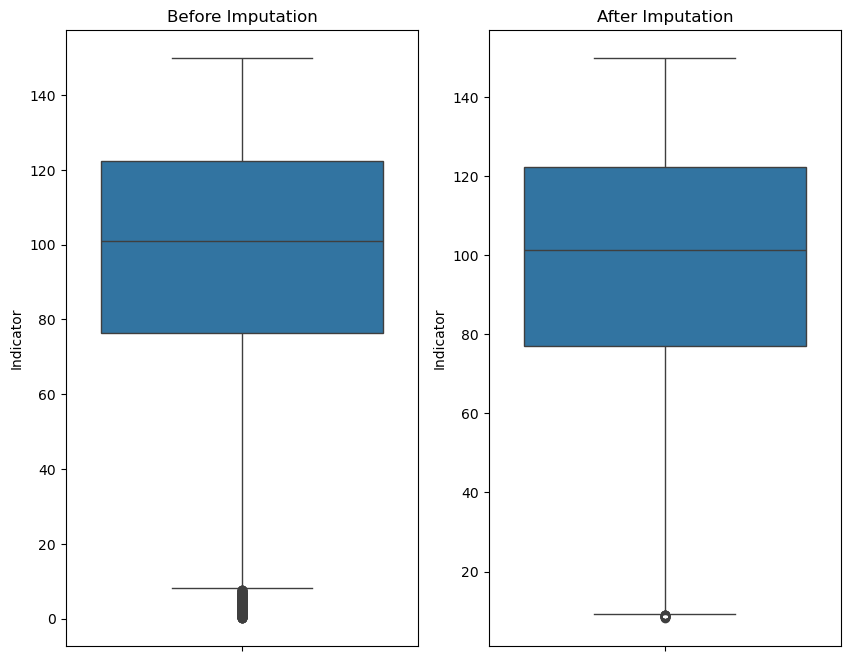

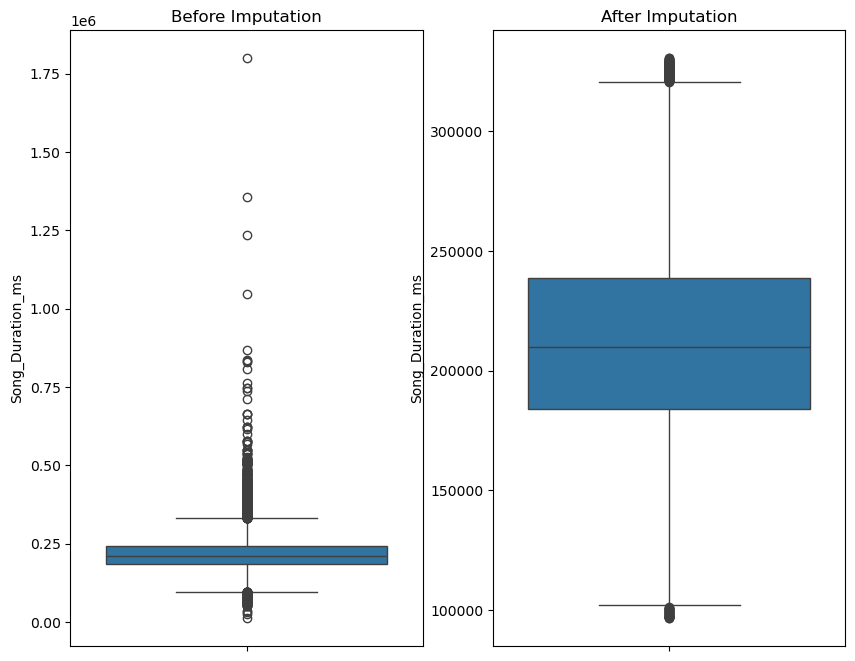

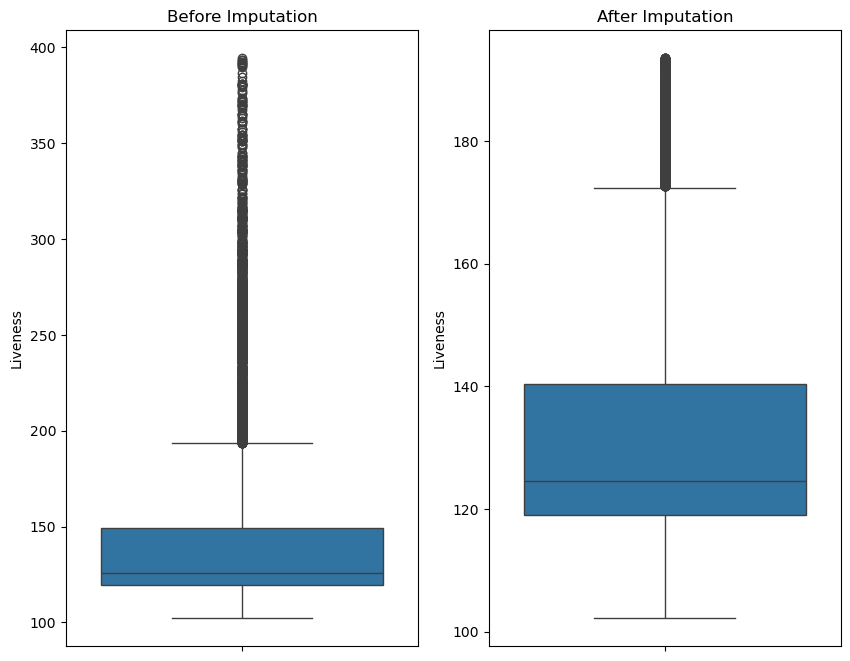

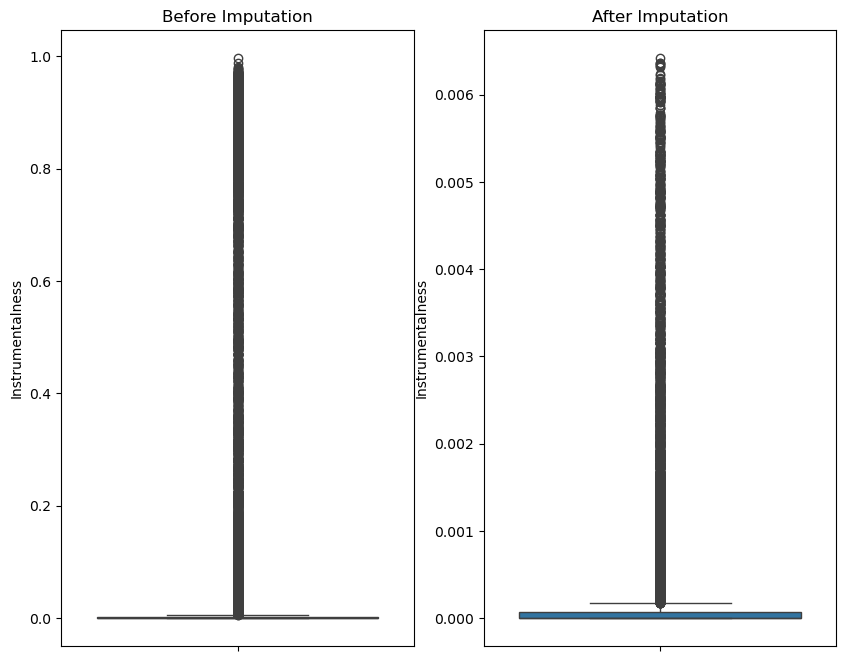

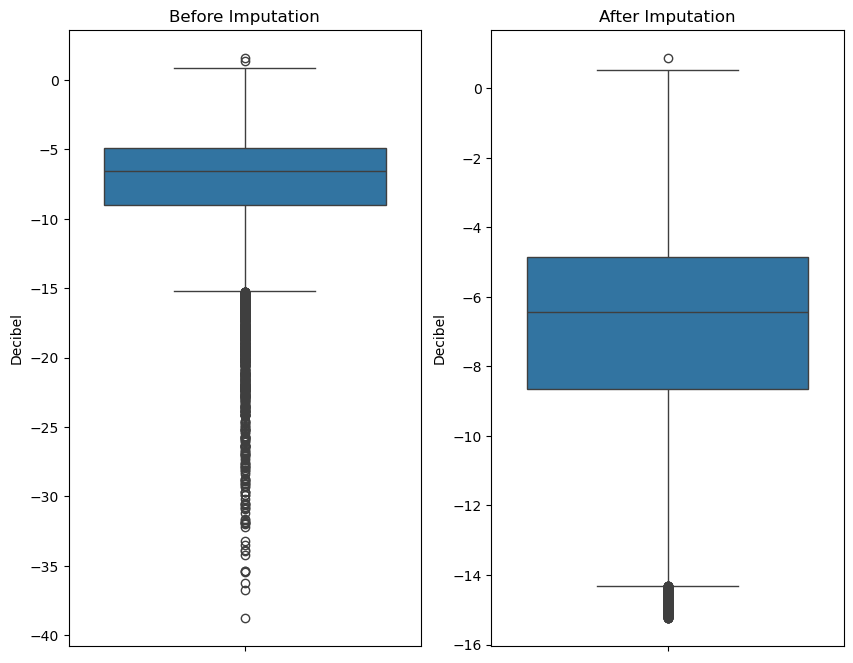

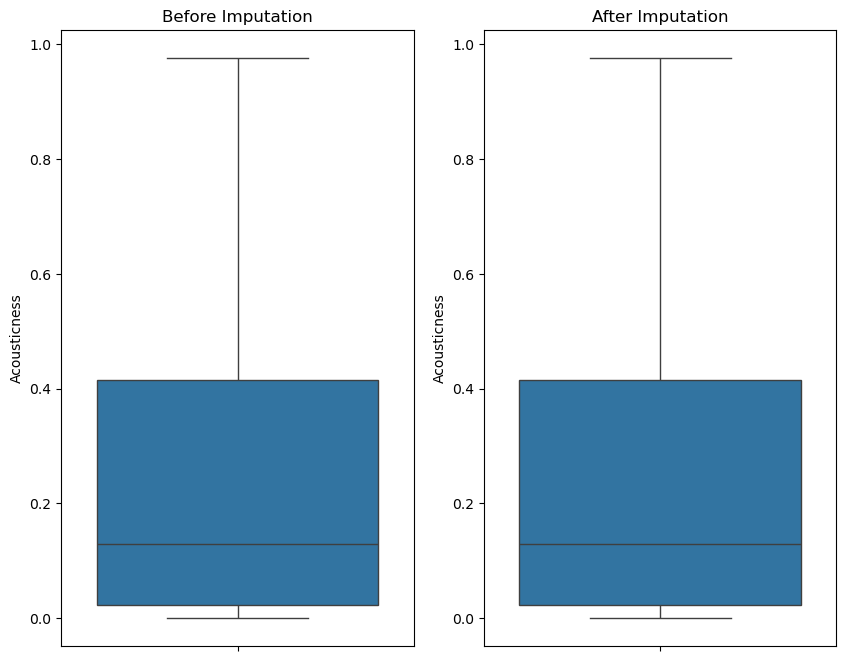

In [104]:
outlier_copy = new_song_data
compare_outlier = ['Tempo', 'Energy', 'Indicator', 'Song_Duration_ms', 'Liveness', 'Instrumentalness', 'Decibel', 'Acousticness']
for compare in compare_outlier:
    tempo_upper_limit, tempo_lower_limit = find_boundaries(outlier_copy, compare, 1.5)
    outliers = np.where(outlier_copy[compare] > tempo_upper_limit, True,
                       np.where(outlier_copy[compare] < tempo_lower_limit, True, False))
    outlier_copy1 = outlier_copy.loc[~outliers]
    fig, axes = plt.subplots(ncols=2, figsize=(10, 8))
    axes[0].set_title('Before Imputation')
    sns.boxplot(y=outlier_copy[compare], ax=axes[0])

    axes[1].set_title('After Imputation')
    sns.boxplot(y=outlier_copy1[compare], ax=axes[1])

Although most of the outliers in the column has been removed, it could also mean that there is a high possibility of the data from the column before loss. This results in inaccuracy and unreliability of the model if trimming is used to handle outliers. Therefore, we have to experiment using other methods to remove the outliers. However, for the 'Instrumentalness' column, the outliers were not remove, making the trimming method not suitable for that column.

## 4. Data Transformation <a id = 'datatransformation'></a>
[Back to top](#top)

Majority of the data in the columns are not ideal for the prediction model to utilise. Therefore, we will be transforming the data to make it suitable for the prediction model. We will conduct transformation using transforming methods, categorical encoding methods and discretization and binning methods to further improve the state of the data. Since the columns, 'Danceability', 'Tempo' and 'Audio_valence', are already normal, we will not need to transform them. Specifically, the column 'Song_Popularity' is the target variable, therefore, we will not be transforming it or conducting any changes to it. We want the target variable to remain unchanged so that predictions can be accurate and reliable. The columns 'Audio_mode', 'Dynamism', 'Loudness' are categorical so we also do not need to transform them, but we will encode them. Encoding is used to transform the categorical variables to be more consistent or more readable. Encoding also allows the categorical variables to be read by the prediction model since it can only read numbers, such as integers and floats, and not strings or objects unless the data can be converted to numbers.

#### 4.1 Numerical Data <a id = 'numericaltransform'></a>
To preprocess the data, we will be using diagnostic plots, which comprises of histograms and Q-Q plots, to check for changes in normal distribution. The columns to be transformed are 'Song_Duration_ms', 'Instrumentalness', 'Liveness', 'Speechiness', 'Decibel' and 'Acousticness'. However, for the 'Liveness' and the 'Speechniess' column, we will transform them later as they contain null values which will affect the transformation process. For now, I used transforming methods such as Logarithmic transformer and Yeo Johnson transformer to make my data more suitable to fit into the prediction model. Below shows the diagnostic plots for the numeric columns.

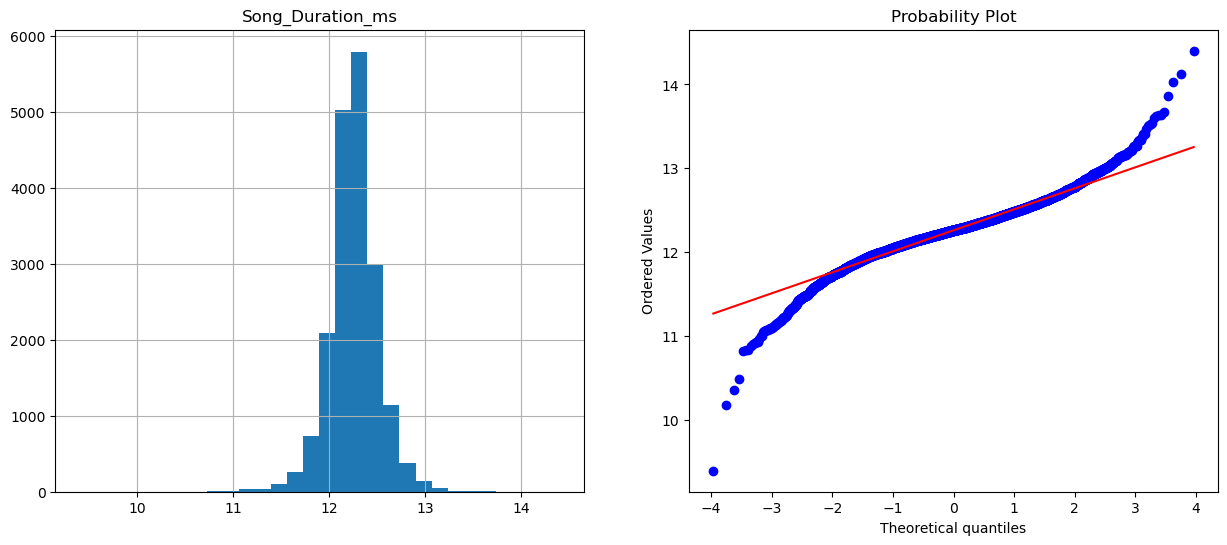

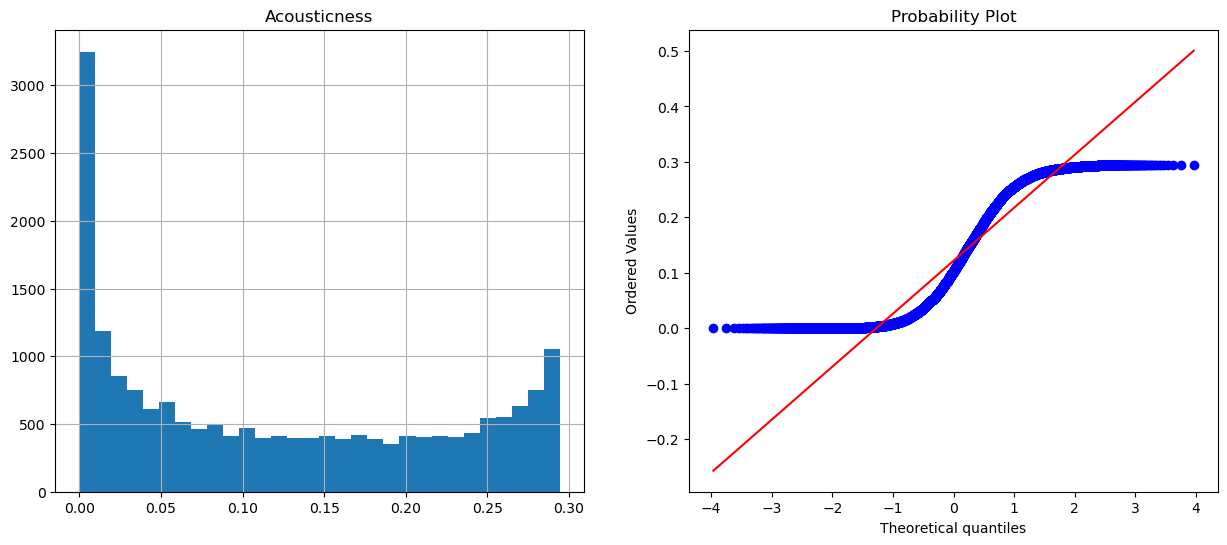

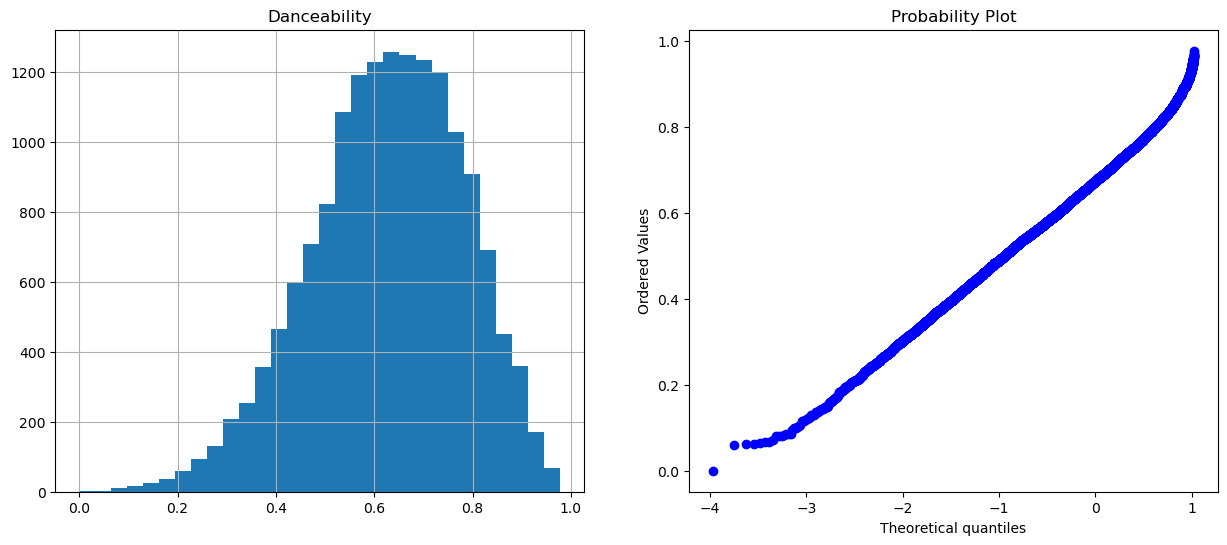

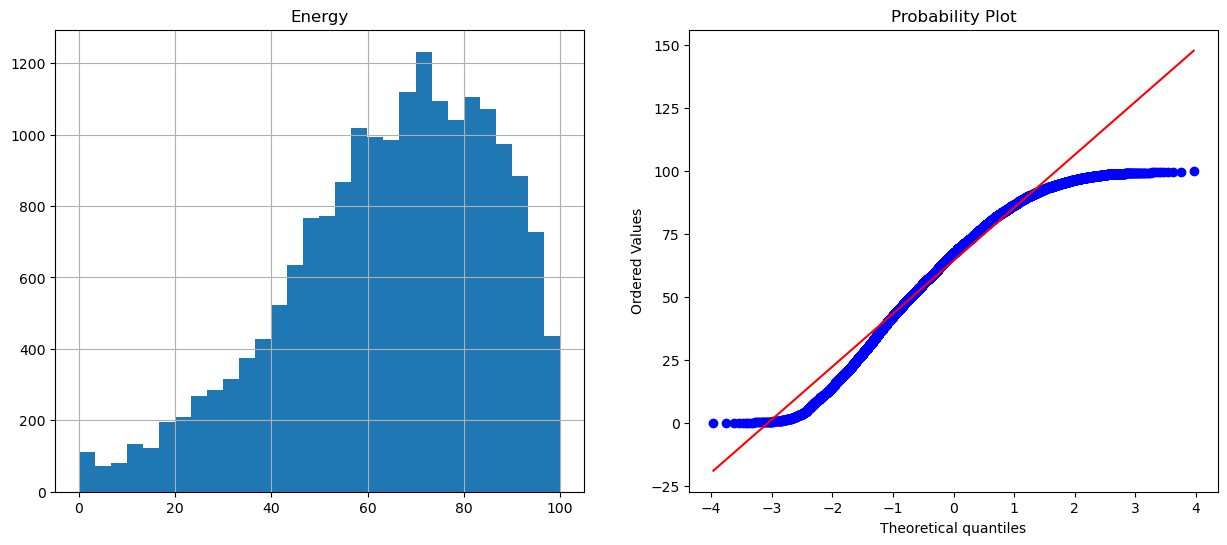

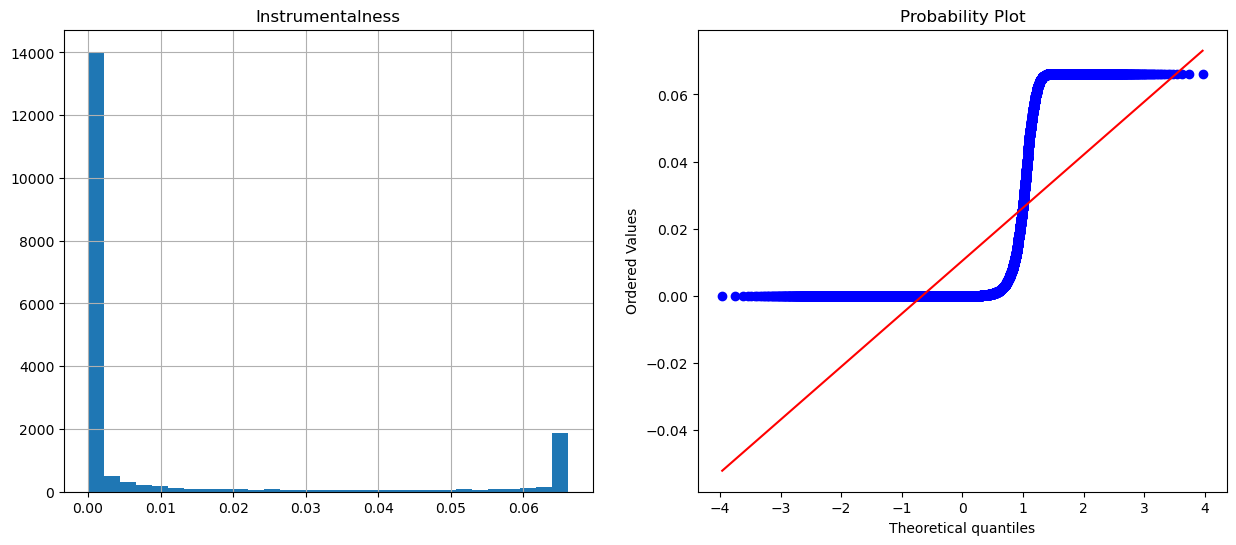

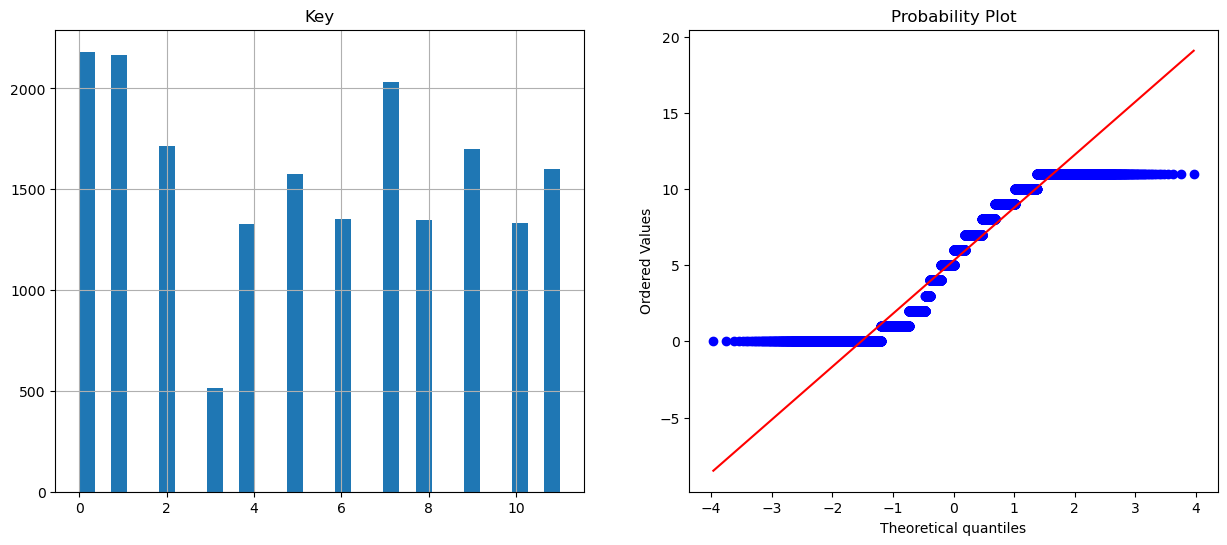

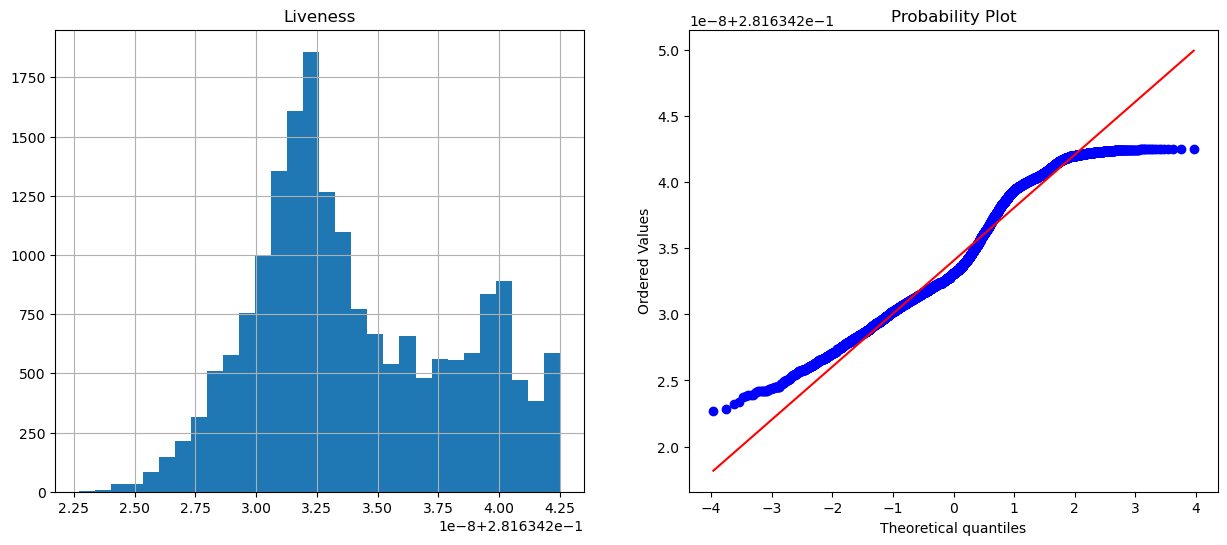

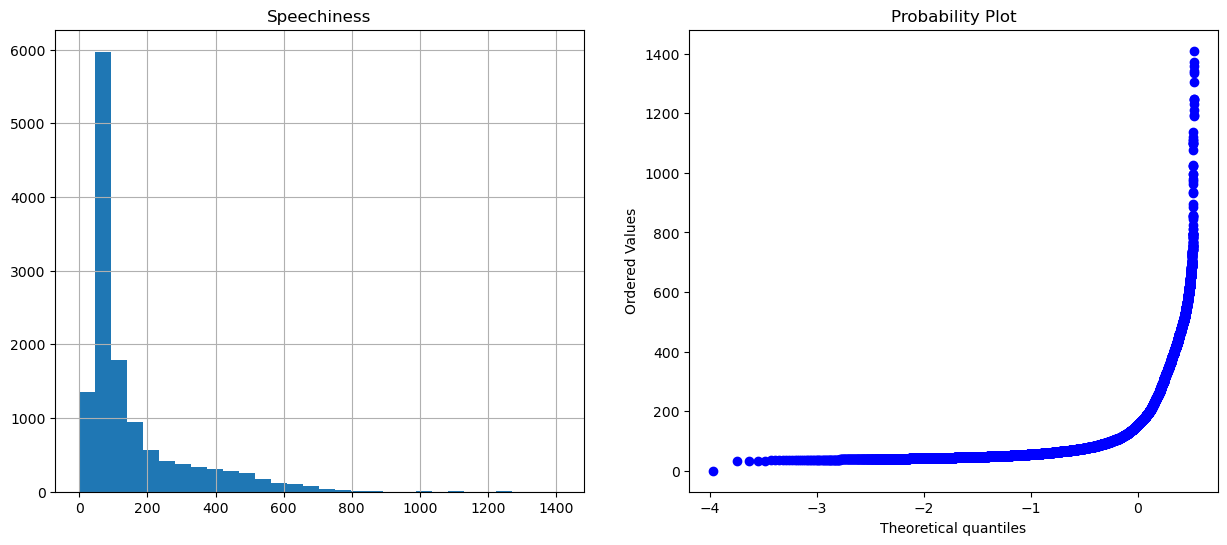

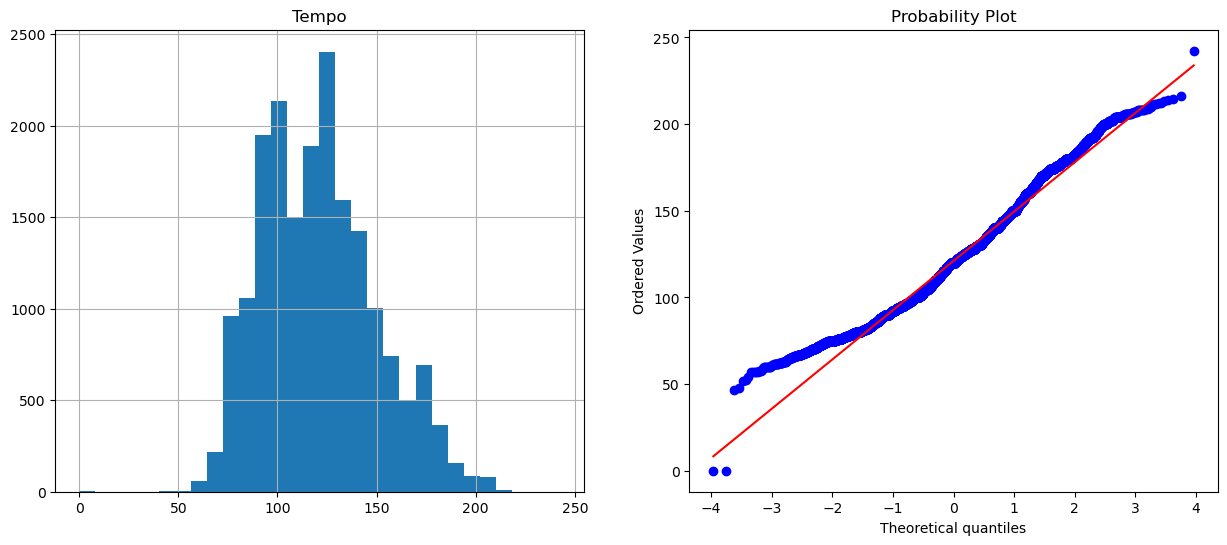

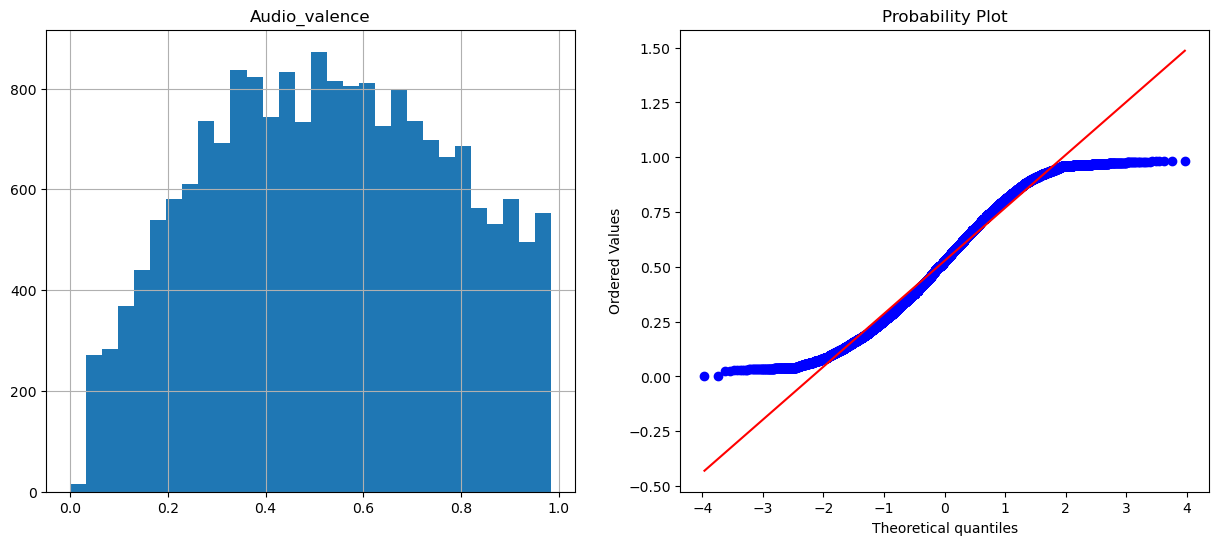

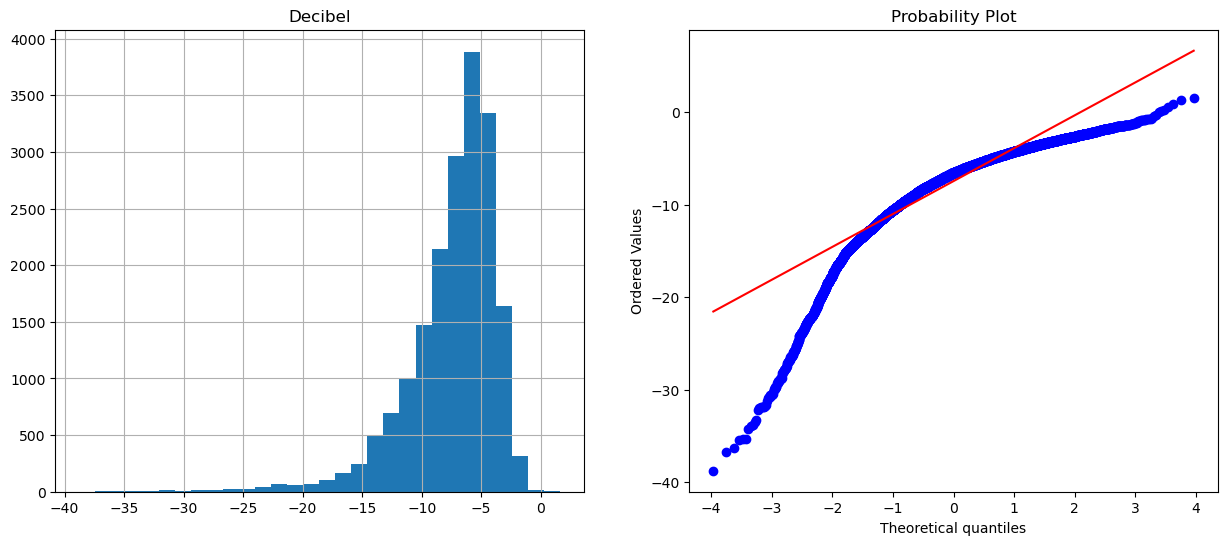

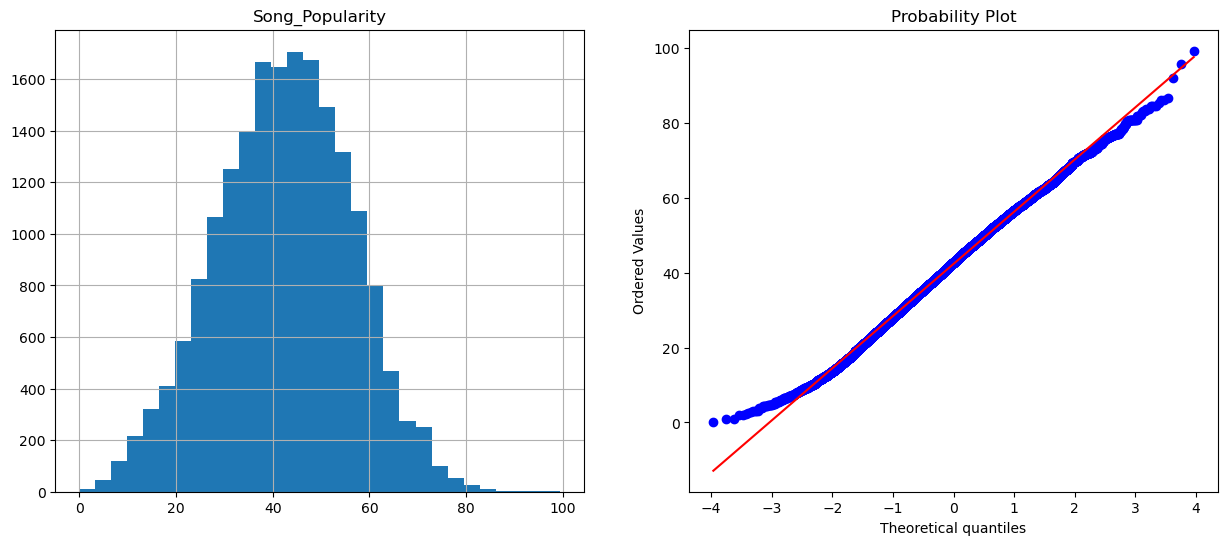

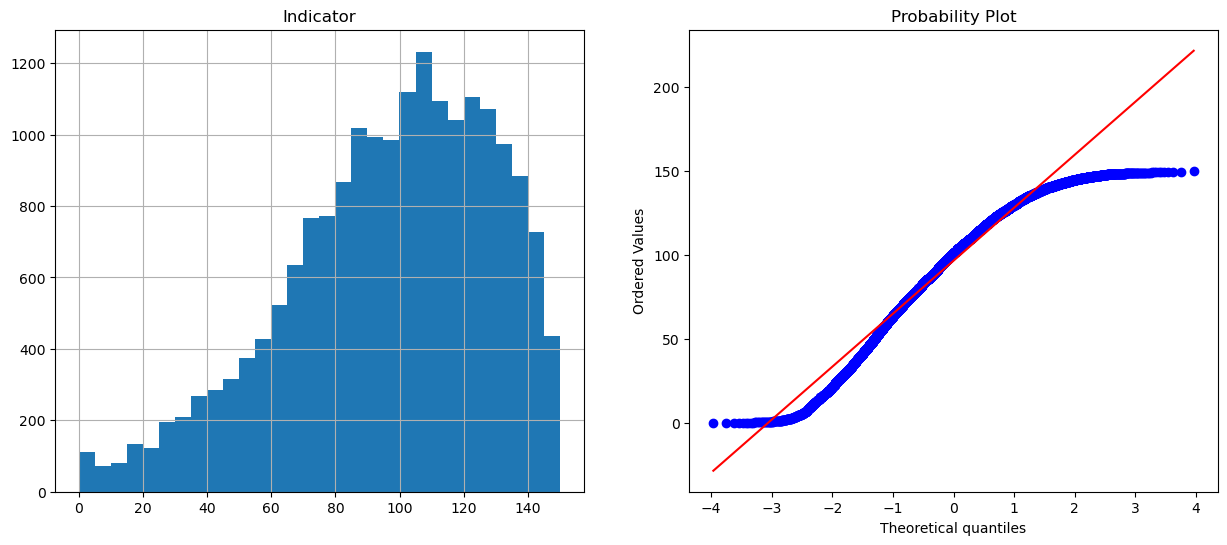

In [105]:
for num in num_cols:
    diagnostic_plots(song_data_transform1, num)

Some of this columns have already been transformed, such as 'Song_Duration_ms', 'Instrumentalness', 'Liveness', 'Speechiness', 'Decibel' and 'Acousticness'. The Logarithmic transformer is only used on 'Song_Duration_ms' to further improve the data to make it normal. As seen in the diagnostic plot for 'Song_Duration_ms', it is centralised and the plots are mostly following the line in the Q-Q plot. The data points not following the line in the Q-Q plot are generally outliers which will not have much of a significance in the prediction model. The Yeo Johnson transformer is used on the columns, 'Instrumentalness', 'Liveness', 'Speechiness', 'Decibel' and 'Acousticness' to further improve the data to make it normal. Some of the columns stated are normal, some of them are not normal and their histograms are skewed. Although, it might not be normal, the data is less prone to be affected by outliers and looks more general as compared to before transformation. With this, data in the numeric variables look more normal or at least more uniform and decent as compared to before transformation. With these changes made to the numeric variables stated, the data looks more suitable to be used in the prediction model after transformation.

Now, let's see if other transformers can improve the data. The diagnostic plots are created below:

c:\Users\louis\anaconda3\Lib\site-packages\feature_engine\transformation\power.py:147: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[512.18453706 465.76066815 481.38653907 ... 426.86180433 593.53180201
 439.92385705]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, self.variables_] = np.power(X.loc[:, self.variables_], self.exp)


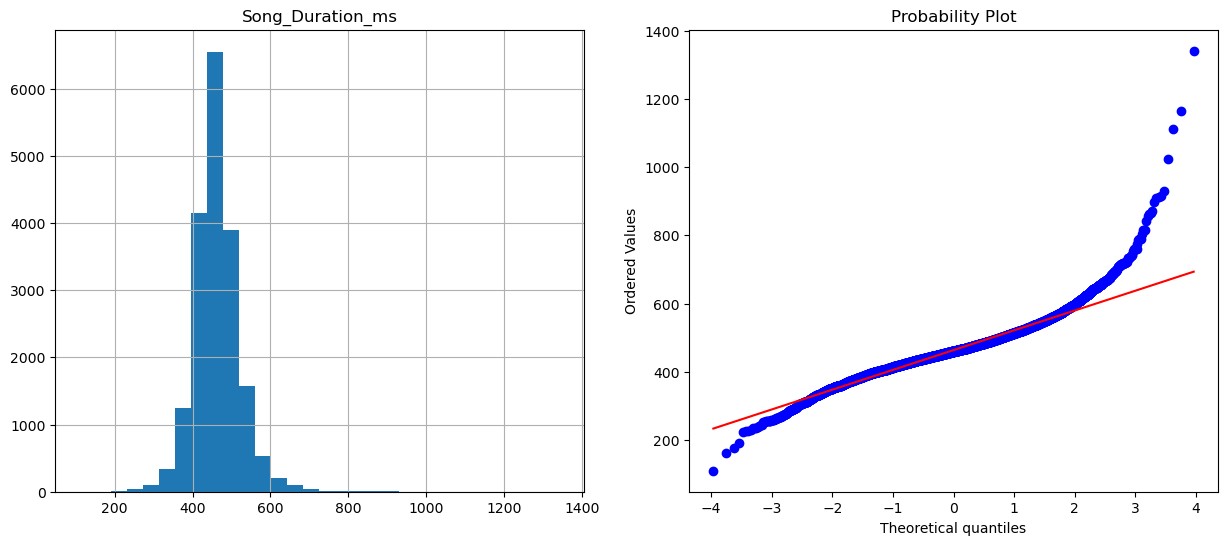

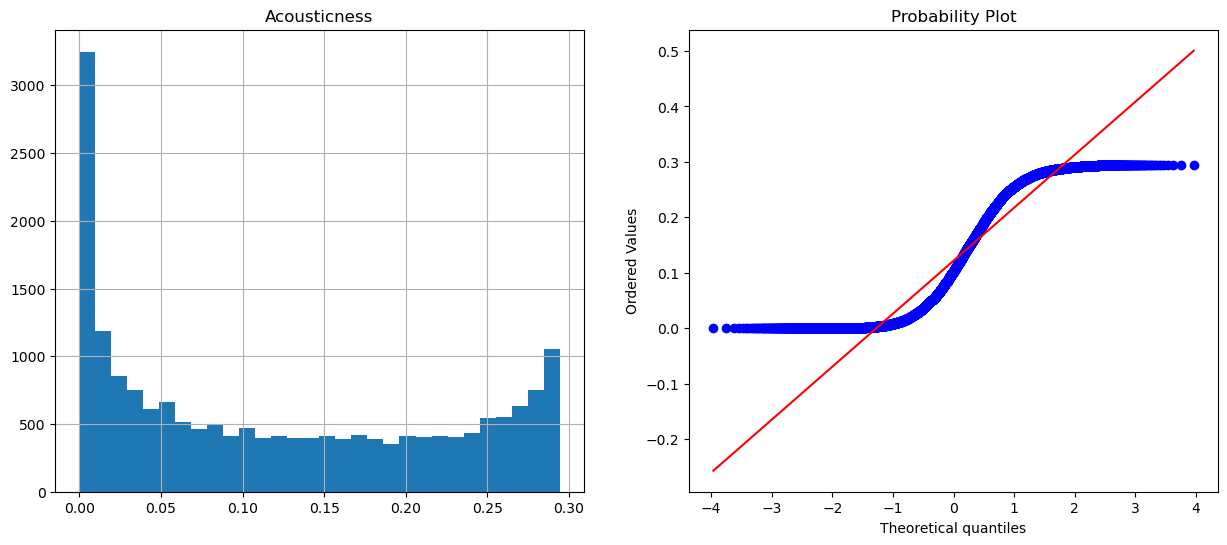

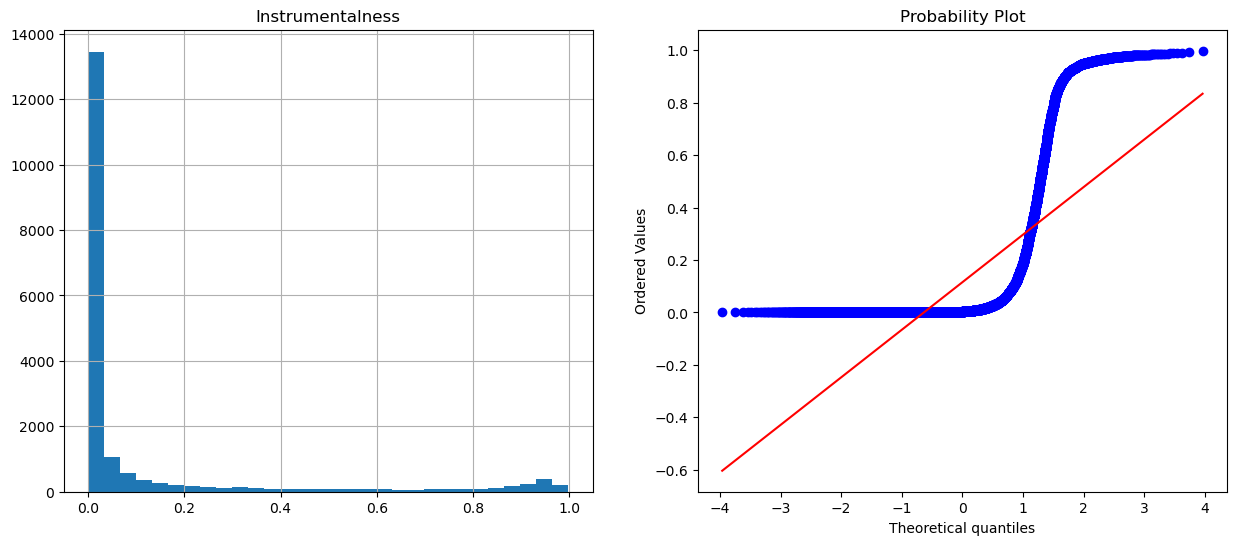

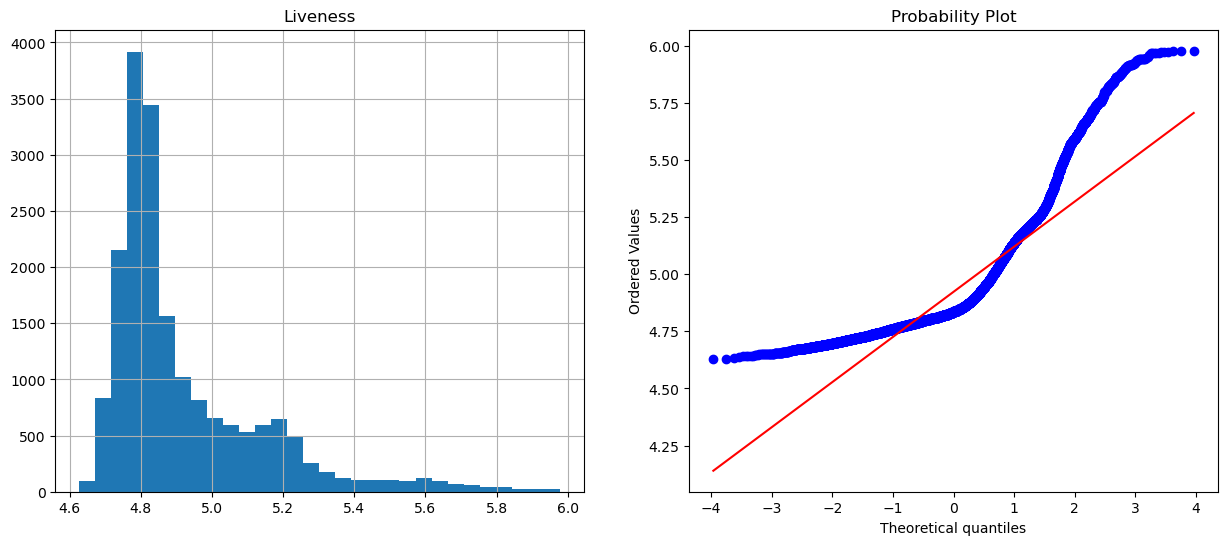

In [106]:
song_data_copy = new_song_data
t = PowerTransformer(variables = ['Song_Duration_ms'],exp=1/2)
t.fit(song_data_copy)
song_data_copy = t.transform(song_data_copy)
diagnostic_plots(song_data_copy, 'Song_Duration_ms')
t = LogTransformer(variables = ['Acousticness'])
t.fit(song_data_copy)
song_data_copy = lt.transform(song_data_copy)
diagnostic_plots(song_data_copy, 'Acousticness')
t = PowerTransformer(variables = ['Instrumentalness'],exp=1/2)
t.fit(song_data_copy)
song_data_copy = t.transform(song_data_copy)
diagnostic_plots(song_data_copy, 'Instrumentalness')
t = LogTransformer(variables = ['Liveness'])
t.fit(song_data_copy)
song_data_copy = t.transform(song_data_copy)
diagnostic_plots(song_data_copy, 'Liveness')

Comparing the plots created with the ones above, the data for the transformed columns are not normalised and skewed. Although, some might look normal in the Q-Q plot, they are skewed and vice versa. This might make the prediciton model more inaccurate and unreliable, making the evaluation metrics vary greatly.

#### 4.2 Categorical Data <a id = 'categoricaltransform'></a>

The categorical variables that can be transformed are 'Audio_mode', 'Dynamism' and 'Loudness'. For the 'Audio_mode' column, the data is already in the format as a categorical variable, so there is no need to be transformed. To transform the 'Dynamism' and 'Loudness' columns, we will conduct encoding using One Hot Encoding method and Rare Label Encoding method respectively. The 'Dynamism' column has three unique values, 'High', 'Medium' and 'Low'. Since there are too little values, we will use One Hot Encoding method to change the three unique values into numbers using new columns so that it can be read by the prediction model. After transformation, new columns are created with the names, 'Dynamism_High', 'Dynamism_Medium' and 'Dynamism_Low'. The columns will show the value 0 or 1 in the columns if the data was 'High', 'Medium' or 'Low' previously in the 'Dynamism' column before it was dropped. This way, it is easier to determine the dynamism of the song in the dataset instead of looking at 'High', 'Medium' or 'Low' and the data can also be read by the prediction model. The data overview for the 3 columns can be seen below:

In [107]:
print(X_train_transform2['Dynamism_High'].head())
print(X_train_transform2['Dynamism_Medium'].head())
print(X_train_transform2['Dynamism_Low'].head())

14638    0
18223    1
2945     1
18355    1
824      1
Name: Dynamism_High, dtype: int32
14638    1
18223    0
2945     0
18355    0
824      0
Name: Dynamism_Medium, dtype: int32
14638    0
18223    0
2945     0
18355    0
824      0
Name: Dynamism_Low, dtype: int32


The 'Loudness' column has many unique values. Since there are too many values, we will use Rare Label Encoding method to change the unique values into numbers using new columns so that it can be read by the prediction model. Rare Label Encoding method takes the top number of unique values that have the most number of occurences. The top number in this case was 6, so 6 categories are created using the top 6 values that have the most occurences since the other values have lesser occurences as compared to the top 6. They might not have a significant impact on the prediction model even if they are not present in the dataset. After transformation, new columns are created with the names, 'Loudness_Rumble', 'Loudness_Blare', 'Loudness_Clang', 'Loudness_Roar', 'Loudness_Boom' and 'Loudness_Babble'. The columns will show the value 0 or 1 in the respective columns if the data has the value 'Rumble', 'Blare', 'Clang', 'Roar', 'Boom' or 'Babble' in the previously in the 'Loudness' column before it was dropped after encoding. If the data previously, does not fall in any of the new columns, they are represented as 0 in all the new columns. The data overview for the 3 columns can be seen below:

In [108]:
print(X_train_transform2['Loudness_Rumble'].head())
print(X_train_transform2['Loudness_Blare'].head())
print(X_train_transform2['Loudness_Clang'].head())
print(X_train_transform2['Loudness_Roar'].head())
print(X_train_transform2['Loudness_Boom'].head())
print(X_train_transform2['Loudness_Babble'].head())

14638    1
18223    0
2945     0
18355    0
824      0
Name: Loudness_Rumble, dtype: int32
14638    0
18223    1
2945     0
18355    0
824      1
Name: Loudness_Blare, dtype: int32
14638    0
18223    0
2945     1
18355    0
824      0
Name: Loudness_Clang, dtype: int32
14638    0
18223    0
2945     0
18355    1
824      0
Name: Loudness_Roar, dtype: int32
14638    0
18223    0
2945     0
18355    0
824      0
Name: Loudness_Boom, dtype: int32
14638    0
18223    0
2945     0
18355    0
824      0
Name: Loudness_Babble, dtype: int32


With this, transformation has been completed. Numeric data looks more uniform and decent as compared to before and categorical data is more readable and understandable. The data is transformed and encoded to be more suitable to be used in the prediction model.

## 5. Feature Engineering <a id = "featureengineering"></a>
[Back to top](#top)

Feature Engineering is used to further improve the data by scaling, creating new features or by dropping features that might not have a significant impact on the data. In the data, we have conducted scaling only as all columns in the data is already sufficient and there is no need to add any features that is not useful to the prediction model. The purpose of scaling is to ensure that the data is smooth and can be optimized easily. Without scaling, features with different scales might cause numerical instabilities and pose difficulties when they are optimized in the process. Features that have larger scales might dominate the learning process and make the other features with smaller scales less significant. Overall, scaling can make intepreting model coefficients more straightforward, ensuring that the coefficients show the importance of features based on their contributions to the prediction model.

For the dataset, we have decided to use the Min-Max Scaler to scale the data to make it more suitable for the prediction model to optimize and learn. So, conducting the Min-Max Scaling allows the features in the data to scale to a specific range, which is usually between 0 and 1. Overall, this can ensure that the relationships between the data points are not changed but still manage to keep the values within the range defined by the scaler. All the features the dataset has been scaled as shown below:

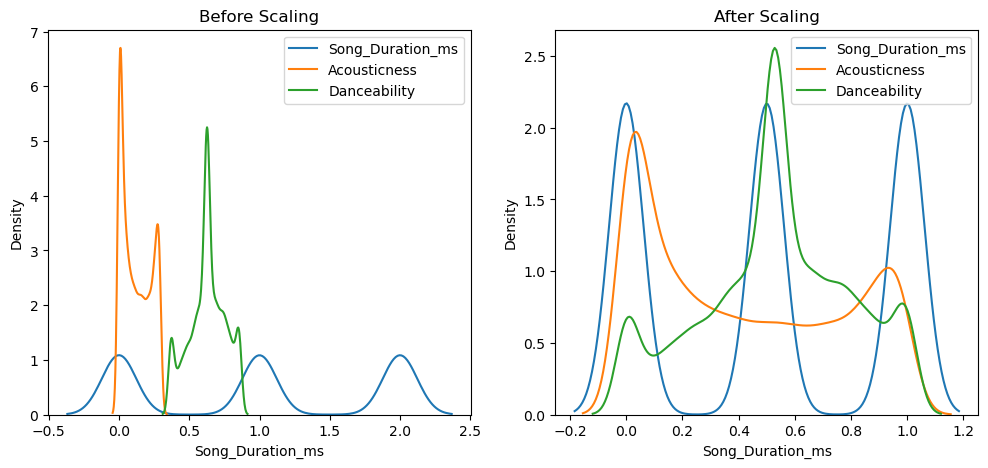

In [109]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(X_train_transform2['Song_Duration_ms'], ax=axes[0], label='Song_Duration_ms')
sns.kdeplot(X_train_transform2['Acousticness'], ax=axes[0], label='Acousticness')
sns.kdeplot(X_train_transform2['Danceability'], ax=axes[0], label='Danceability')
axes[0].legend()

# After scaling
axes[1].set_title('After Scaling')
sns.kdeplot(scaled_X_train['Song_Duration_ms'], ax=axes[1], label='Song_Duration_ms')
sns.kdeplot(scaled_X_train['Acousticness'], ax=axes[1], label='Acousticness')
sns.kdeplot(scaled_X_train['Danceability'], ax=axes[1], label='Danceability')
axes[1].legend()

plt.show()

As shown, the columns, 'Song_Duration_ms', 'Acousticness' and 'Danceability' have been scaled to a range of -0.2 and 1.2, where the data fits into the range.

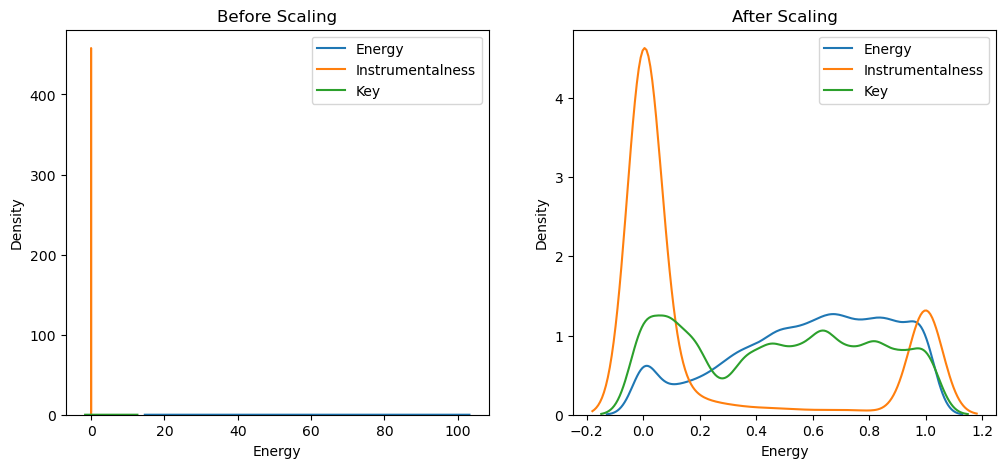

In [110]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(X_train_transform2['Energy'], ax=axes[0], label='Energy')
sns.kdeplot(X_train_transform2['Instrumentalness'], ax=axes[0], label='Instrumentalness')
sns.kdeplot(X_train_transform2['Key'], ax=axes[0], label='Key')
axes[0].legend()

# After scaling
axes[1].set_title('After Scaling')
sns.kdeplot(scaled_X_train['Energy'], ax=axes[1], label='Energy')
sns.kdeplot(scaled_X_train['Instrumentalness'], ax=axes[1], label='Instrumentalness')
sns.kdeplot(scaled_X_train['Key'], ax=axes[1], label='Key')
axes[1].legend()

plt.show()

As shown, the columns, 'Energy', 'Instrumentalness' and 'Key' have been scaled to a range of -0.2 and 1.2, where the data fits into the range as compared to before scaling.

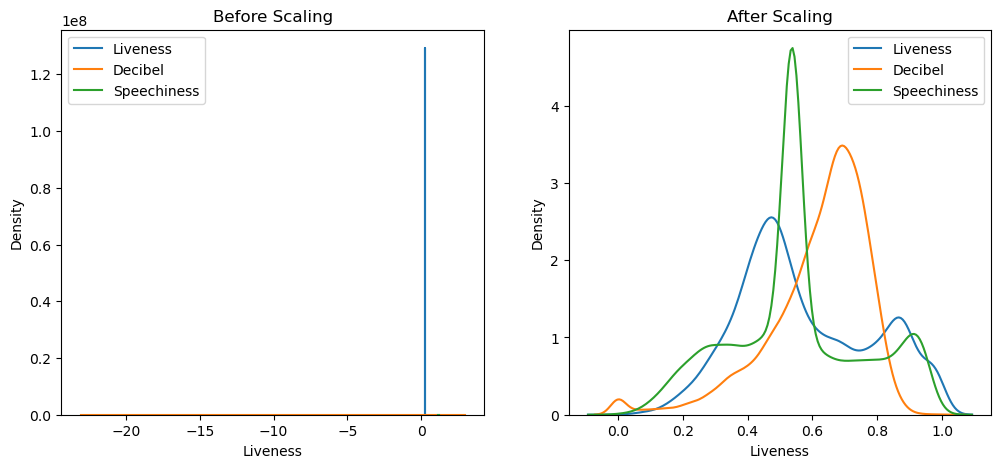

In [111]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(X_train_transform2['Liveness'], ax=axes[0], label='Liveness')
sns.kdeplot(X_train_transform2['Decibel'], ax=axes[0], label='Decibel')
sns.kdeplot(X_train_transform2['Speechiness'], ax=axes[0], label='Speechiness')
axes[0].legend()

# After scaling
axes[1].set_title('After Scaling')
sns.kdeplot(scaled_X_train['Liveness'], ax=axes[1], label='Liveness')
sns.kdeplot(scaled_X_train['Decibel'], ax=axes[1], label='Decibel')
sns.kdeplot(scaled_X_train['Speechiness'], ax=axes[1], label='Speechiness')
axes[1].legend()

plt.show()

As shown, the columns, 'Liveness', 'Decibel' and 'Speechiness' have been scaled to a range of -0.2 and 1.2, where the data fits into the range as compared to before scaling.

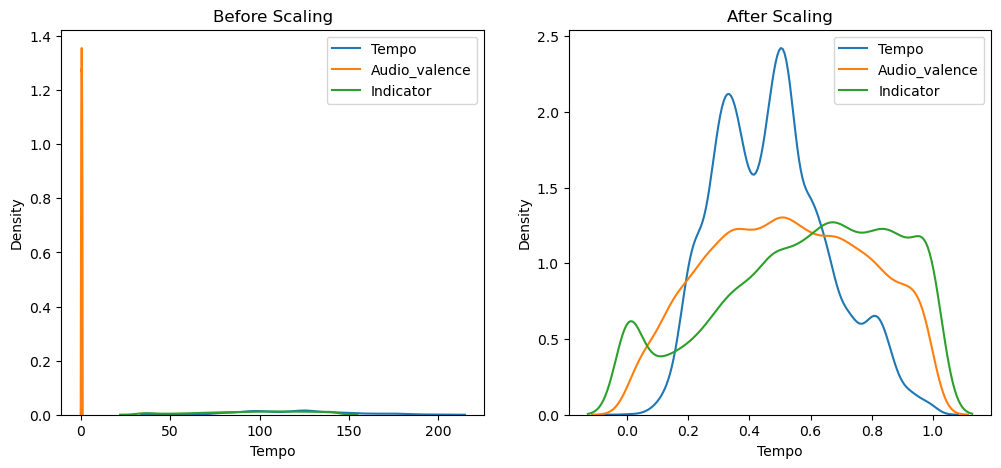

In [112]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

# Before scaling
axes[0].set_title('Before Scaling')
sns.kdeplot(X_train_transform2['Tempo'], ax=axes[0], label='Tempo')
sns.kdeplot(X_train_transform2['Audio_valence'], ax=axes[0], label='Audio_valence')
sns.kdeplot(X_train_transform2['Indicator'], ax=axes[0], label='Indicator')
axes[0].legend()

# After scaling
axes[1].set_title('After Scaling')
sns.kdeplot(scaled_X_train['Tempo'], ax=axes[1], label='Tempo')
sns.kdeplot(scaled_X_train['Audio_valence'], ax=axes[1], label='Audio_valence')
sns.kdeplot(scaled_X_train['Indicator'], ax=axes[1], label='Indicator')
axes[1].legend()

plt.show()

As shown, the columns, 'Tempo', 'Audio_valence' and 'Indicator' have been scaled to a range of -0.2 and 1.2, where the data fits into the range as compared to before scaling.

Some of the features of the dataset are dropped near the start of the report. The features or columns are 'Code' and 'Song_Name' have been dropped as they are proven not useful to be present in the dataset as majority of its values are unique. The values cannot be encoded due to no similarities in the features unlike 'Dynamism' and 'Loudness' which have repeated values in the features itself. These features that do not exhibit any commonality are generally not categorical variables and therefore are dropped to prevent any problems or errors during the optimizing and learning process of the prediction model. Overall, the dataset has been scaled so that all the features in the data fits into the same range of -0.2 and 1.2. This can enhance the learning and optimising process of the prediction model and none of the features can dominate each other with the same range.

## 6. Linear Regression Model <a id = 'model'></a>
[Back to top](#top)

We will build the prediction model using the Linear Regression. Linear Regression is used to model a relationship or a best fit line between a target variable and one or many predictor variables. In this case, the target variable is 'Song_Popularity' and the predictor variables are the other features of the dataset. Since there are more than one predictor variable, multiple linear regression is used. 

#### 6.1 Building and Evaluating the Model <a id = 'building'></a>
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

After inputting the data into the model and functions required to evaluate the model, the following score is provided below:

- train_mse: 117.83551070606578 
 - test_mse: 118.11282931623649
- train_r-sq: 0.39724889405836117 
 - test_r-sq: 0.38702640660741916

 This means that the model is generally able to predict the results but with quite a number of errors. The variance of the residuals is 117.836 (3d.p.) for the train data and 118.113 (3d.p.) for the test data. The percentage of the response variable variation that is explained by a linear model is 0.397 (3d.p.) for the train data and 0.387 (3d.p.) for the test data. Generally, lower values of MSE and higher values of R-Square would be better. So, the data can be overall improved to improve the evaluation scores of the linear regression prediction model.

#### 6.2 Model Coefficients and Correlation Analysis <a id = 'coefficients'></a>

Model Coefficients show the quantitive relationship between the 'Song_Popularity' and the independent or predictor variables. They represent the magnitude of the change in the target variable when the value of the predictor variable changes by one-unit. A positive coefficient would indicate a positive relationship between that predictor variable and the target variable. A negative coefficient would indicate a negative relationship between that predictor variable and the target variable. A larger coefficient value would indicate a stronger relationship between the predictor variable and the target variable while a smaller coefficient value would indicate a stronger relationship between that predictor variable and the target variable.

In [113]:
coefficients = pd.Series(model.coef_, index=X_train_transform2.columns) 
coefficients.sort_values(ascending=False, inplace=True) 
print(coefficients)

Decibel                          46.071245
Audio_valence                    13.499544
Danceability                      3.783185
Dynamism_Low                      2.275079
Tempo_Category_(150.0, inf]       1.936228
Song_Duration_ms                  1.798084
Audio_Valence_Category_Low        1.711991
Tempo_Category_(90.0, 150.0]      0.581651
Audio_mode                        0.067267
Key                              -0.295534
Acousticness                     -0.325291
Speechiness                      -0.586280
Dynamism_High                    -0.862878
Audio_Valence_Category_Medium    -1.072843
Dynamism_Medium                  -1.412202
Indicator                        -1.482557
Energy                           -1.482557
Liveness                         -1.714370
Tempo                            -2.794616
Instrumentalness                 -3.343807
Loudness_Boom                    -6.201063
Loudness_Babble                  -9.973770
Loudness_Blare                  -10.117223
Loudness_Ru

Generally, it can be seen that 'Decibel' tend to have the highest value of model coefficients. The other features have a small value of model coefficients. This means 'Decibel' has the largest effect on the 'Song_Popularity' as compared to the other features, with the target variable changing with a magnitude of 44.3 (3sf) when 'Decibel' changes by one unit.

## 7. Summary and Further Improvements <a id = 'end'></a>
[Back to top](#top)

#### 7.1 Summary <a id = 'summary'></a>

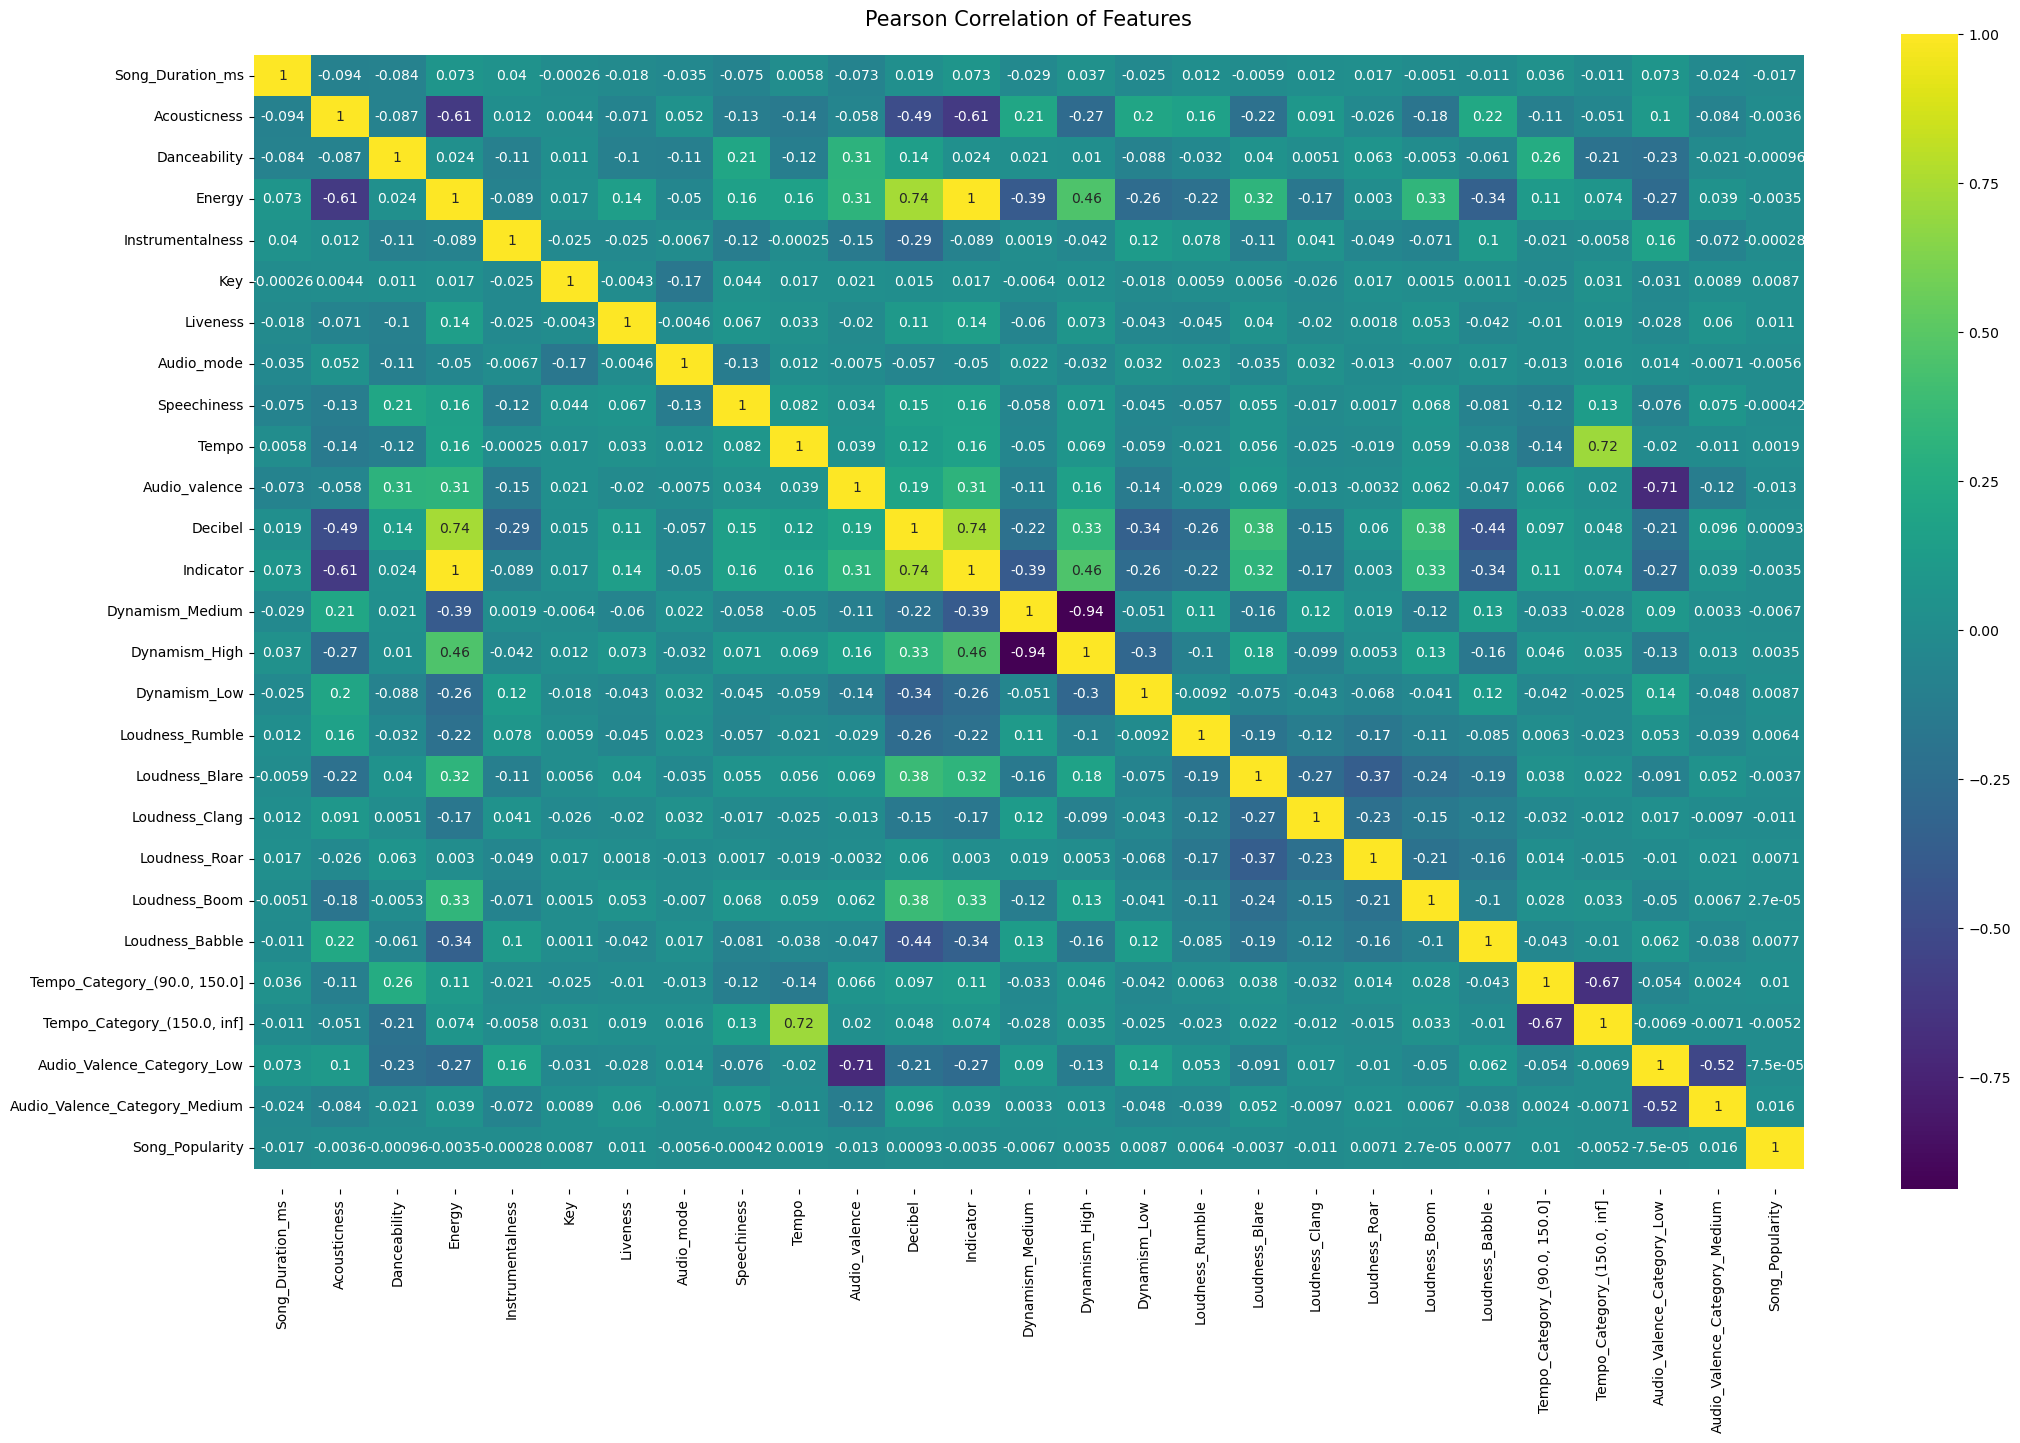

In [114]:
merged = pd.concat([scaled_X_train,y_train],axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(25,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(merged.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The heatmap shown above shows the correlation between the different features in the dataset. In the heatmap, yellow means highly correlated and green means weakly correlated. It can be seen that the variable, 'Decibel', is highly correlated with the variables, 'Indicator' and 'Energy' as shown by the light green color. It can also be seen that the variable, 'Indicator', is highly correlated with the 'Energy' variable as shown by the light yellow color.

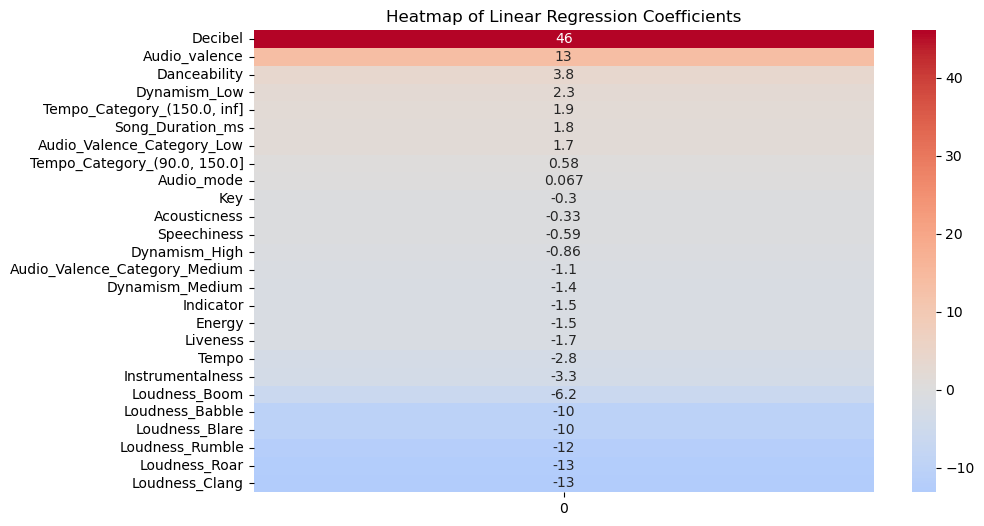

In [115]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(coefficients), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Linear Regression Coefficients')
plt.show()

The heatmap above shows the coefficients of the linear regression model. It can be seen that 'Decibel' has the highest value of model coefficients, meaning the higher the value of sound by decibels or the louder the sound, the more popular the song. The other features have smaller coefficients showing that they are not the main contributors towards the change in song popularity. As when these features increase by a unit, the song_popularity increases or decreases marginally. The columns derived from the 'Loudness' feature generally have a high negative model coefficient, so it means that loudness has a string inverse relationship with the popularity of the song.

In summary, different characteristics of a song can have different effects on the popularity of the song, with some having a significant impact while others not are not so significant. In this case, the charactieristic of 'Decibel' or loudness of the song have the most significant impact on the popularity of the song. The louder the sound in decibels, the more popular the song gets. Overall, all the data achieved are important to the stakeholders that are involved in the music industry. With the purpose of producing a song that is popular among its consumers and listeners, the stakeholders or target audience can use the information provided in this report and the linear regression model to determine the characteristics that can heavily affect the popularity of a song. This way, stakeholders can identify what is needed for a song to gain popularity and bring in more profits to their businesses.

#### 7.2 Further Improvements <a id = 'improvements'></a>

Further improvements that can be made include trying and testing a wider range of methods so as to recieve a better model evaluation score. Firstly, more feature engineering can be done to make the dataset more suitable for the prediction model. For example, by creating new features from existing ones can capture more information about the dataset and might even have the chance to find new correlation relationships and find out if the new feature is the prime contributer to the popularity of the song. Secondly, data preprocessing can be improved to make values in the features more uniform and more suitable to fit into the prediction model. For example, using standardization to have zero mean and unit variance are important for features on different scales. Missing values can also be imputed using other methods and outliers in the numeric variables can be removed using other methods to reduce the number of irrelevant data that can cause a significant impact on the linear regression model. 

By trying and putting together different methods during the transformation of the data, we can also incoporate domain knowledge to have a more in depth overview on what transformation methods to use and which ones to avoid. Overall, these are all ways to improve the performance of the linear regression prediction model.

## 8. References <a id = 'references'></a>
[Back to top](#top)

- [ChatGPT. - OpenAI (n.d.).] (https://chatgpt.com/c/03f8f1bb-4a32-4f3f-9175-7c2198ebc453)
- [Gemini – chat to supercharge your ideas. (n.d.).] (https://gemini.google.com/app)